In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1Mr_42LL7uikdXZskQAUcZkzNRmZmWDLa
!gdown 1vZ14P6HjWSvJ0pIamm5vLQFN9108vNWg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1Mr_42LL7uikdXZskQAUcZkzNRmZmWDLa
To: /content/Litecoin.csv
100% 88.4k/88.4k [00:00<00:00, 102MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vZ14P6HjWSvJ0pIamm5vLQFN9108vNWg
To: /content/Monero.csv
100% 127k/127k [00:00<00:00, 104MB/s]


# 1&2.Data Processing

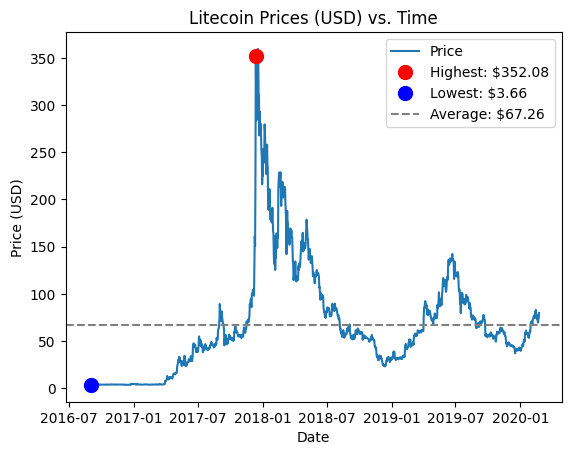

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('/content/Litecoin.csv')

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plot prices vs. time
plt.plot(data['Date'], data['Price'], label='Price')

# Highlight highest and lowest prices with red and blue points
highest_price = data.loc[data['High'].idxmax(), 'Price']
lowest_price = data.loc[data['Low'].idxmin(), 'Price']
plt.plot(data.loc[data['High'].idxmax(), 'Date'], highest_price, 'ro', markersize=10, label='Highest: $' + str(highest_price))
plt.plot(data.loc[data['Low'].idxmin(), 'Date'], lowest_price, 'bo', markersize=10, label='Lowest: $' + str(lowest_price))

# Plot average with dash-line
average_price = data['Price'].mean()
plt.axhline(average_price, linestyle='--', color='gray', label='Average: $' + str(round(average_price, 2)))

# Format plot
plt.title('Litecoin Prices (USD) vs. Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

# Save plot as PDF
plt.savefig('Litecoin Prices.pdf')


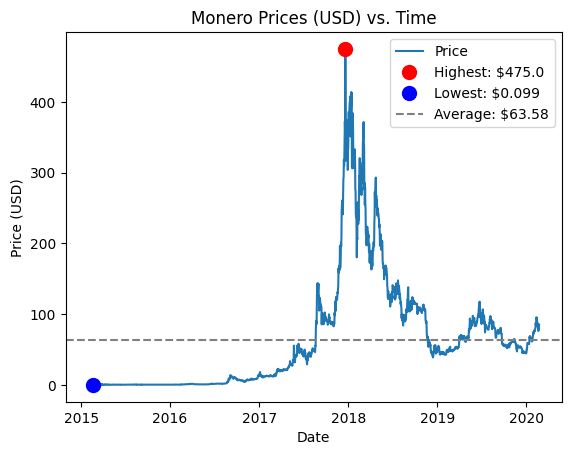

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('/content/Monero.csv')

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plot prices vs. time
plt.plot(data['Date'], data['Price'], label='Price')

# Highlight highest and lowest prices with red and blue points
highest_price = data.loc[data['High'].idxmax(), 'Price']
lowest_price = data.loc[data['Low'].idxmin(), 'Price']
plt.plot(data.loc[data['High'].idxmax(), 'Date'], highest_price, 'ro', markersize=10, label='Highest: $' + str(highest_price))
plt.plot(data.loc[data['Low'].idxmin(), 'Date'], lowest_price, 'bo', markersize=10, label='Lowest: $' + str(lowest_price))

# Plot average with dash-line
average_price = data['Price'].mean()
plt.axhline(average_price, linestyle='--', color='gray', label='Average: $' + str(round(average_price, 2)))

# Format plot
plt.title('Monero Prices (USD) vs. Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

# Save plot as PDF
plt.savefig('Monero Prices.pdf')


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load data from CSV file
data = pd.read_csv('/content/Litecoin.csv')

# Convert string values to numeric values in the 'Vol.' column.
def convert_vol(vol):
    if vol.endswith('M'):
        return int(float(vol[:-1]) * 1000000)
    elif vol.endswith('K'):
        return int(float(vol[:-1]) * 1000)
    else:
        return int(vol)

data['Vol.'] = data['Vol.'].apply(convert_vol)
data['Change %'] = data['Change %'].str.replace('%', '').astype(float)

# Select the primary feature for training
training_data = data['Price'].values.reshape(-1, 1)

# Normalize the training data to scale values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
training_data_normalized = scaler.fit_transform(training_data)

# Define the input window length (number of past days to use for prediction)
input_window_length = 30

# Use the PROCESS_DATA algorithm to create input/output samples
def process_data(data, input_window_length):
    Dx = []
    Dy = []
    n = len(data)
    for i in range(n):
        end_index = i + input_window_length
        if end_index > n-1:
            break
        temp_X = data[i:end_index, :]
        temp_Y = data[end_index, :]
        Dx.append(temp_X)
        Dy.append(temp_Y)
    return (Dx, Dy)

# Create input/output samples using the training data
train_X, train_Y = process_data(training_data_normalized, input_window_length)

# Split the data into training and testing sets (use 80/20 split)
split_index = int(len(train_X)*0.8)
train_X, test_X = train_X[:split_index], train_X[split_index:]
train_Y, test_Y = train_Y[:split_index], train_Y[split_index:]

In [ ]:
import pandas as pd

# Load the data from the csv file
df = pd.read_csv('/content/Litecoin.csv')

# Print the first two rows
print('A:')
print(df.head(5))

def convert_vol(vol):
    if vol.endswith('M'):
        return int(float(vol[:-1]) * 1000000)
    elif vol.endswith('K'):
        return int(float(vol[:-1]) * 1000)
    else:
        return int(vol)

df['Vol.'] = df['Vol.'].apply(convert_vol)
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)
print('B:')
print(df.head(5))

A:
           Date   Price    Open    High     Low    Vol. Change %
0  Feb 23, 2020  79.706  74.817  79.920  74.722  11.93M    6.53%
1  Feb 22, 2020  74.818  73.288  76.642  72.422  11.56M    2.08%
2  Feb 21, 2020  73.291  69.455  75.161  68.633  12.13M    5.52%
3  Feb 20, 2020  69.455  70.782  72.339  66.495  12.45M   -1.87%
4  Feb 19, 2020  70.782  77.173  79.041  68.264  12.10M   -8.28%
B:
           Date   Price    Open    High     Low      Vol.  Change %
0  Feb 23, 2020  79.706  74.817  79.920  74.722  11930000      6.53
1  Feb 22, 2020  74.818  73.288  76.642  72.422  11560000      2.08
2  Feb 21, 2020  73.291  69.455  75.161  68.633  12130000      5.52
3  Feb 20, 2020  69.455  70.782  72.339  66.495  12450000     -1.87
4  Feb 19, 2020  70.782  77.173  79.041  68.264  12100000     -8.28


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D , Dropout , Flatten , BatchNormalization,LSTM
from tensorflow.keras.optimizers import SGD,Adam
from sklearn.metrics import confusion_matrix
import pandas as pd 
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard,EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Load the data from the csv file
df = pd.read_csv('/content/Litecoin.csv')

# Print the first two rows
print('A:')
print(df.head(5))

def convert_vol(vol):
    if vol.endswith('M'):
        return int(float(vol[:-1]) * 1000000)
    elif vol.endswith('K'):
        return int(float(vol[:-1]) * 1000)
    else:
        return int(vol)

df['Vol.'] = df['Vol.'].apply(convert_vol)
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)
print('B:')
print(df.head(5))

A:
           Date   Price    Open    High     Low    Vol. Change %
0  Feb 23, 2020  79.706  74.817  79.920  74.722  11.93M    6.53%
1  Feb 22, 2020  74.818  73.288  76.642  72.422  11.56M    2.08%
2  Feb 21, 2020  73.291  69.455  75.161  68.633  12.13M    5.52%
3  Feb 20, 2020  69.455  70.782  72.339  66.495  12.45M   -1.87%
4  Feb 19, 2020  70.782  77.173  79.041  68.264  12.10M   -8.28%
B:
           Date   Price    Open    High     Low      Vol.  Change %
0  Feb 23, 2020  79.706  74.817  79.920  74.722  11930000      6.53
1  Feb 22, 2020  74.818  73.288  76.642  72.422  11560000      2.08
2  Feb 21, 2020  73.291  69.455  75.161  68.633  12130000      5.52
3  Feb 20, 2020  69.455  70.782  72.339  66.495  12450000     -1.87
4  Feb 19, 2020  70.782  77.173  79.041  68.264  12100000     -8.28


In [ ]:
#  Read dataset
df=df[['Price','Open','High','Low','Vol.','Change %']]
df.shape
df.head()

Price    Open    High     Low      Vol.  Change %
0  79.706  74.817  79.920  74.722  11930000      6.53
1  74.818  73.288  76.642  72.422  11560000      2.08
2  73.291  69.455  75.161  68.633  12130000      5.52
3  69.455  70.782  72.339  66.495  12450000     -1.87
4  70.782  77.173  79.041  68.264  12100000     -8.28

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

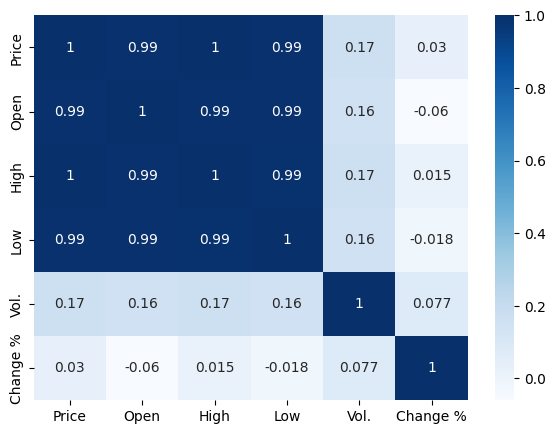

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.Blues)

plt.savefig('heatmap.pdf', format='pdf', bbox_inches='tight')
files.download('heatmap.pdf')

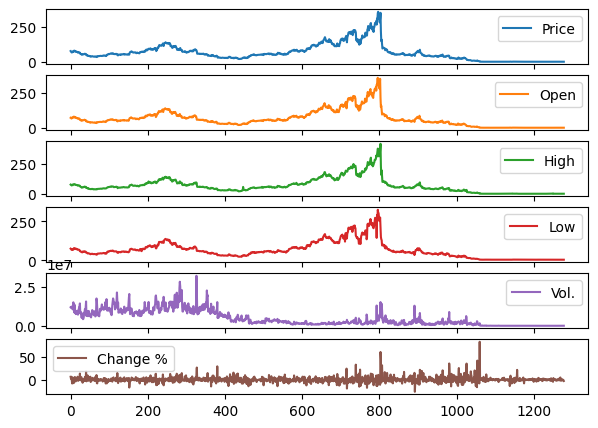

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,5))
df[['Price','Open','High','Low','Vol.','Change %']].plot(ax=ax, subplots=True)
plt.savefig('plot.pdf', format='pdf', dpi=300, bbox_inches='tight')


In [ ]:
df=df[['Price']]
df.shape
df.head()

Price
0  79.706
1  74.818
2  73.291
3  69.455
4  70.782

In [ ]:
# Scale the data using MinMaxScaler with range (0,1)
scaler = MinMaxScaler(feature_range=(0,1))
df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

def fun(data, lag):
    """
    A function that takes in data and a lag value and returns two arrays: x and y.
    x is an array of shape (k, lag, n), where k is the number of samples and n is the number of features.
    y is an array of shape (k, 1), where k is the number of samples.
    Each sample in x is a sequence of lag consecutive observations from data, and the corresponding value in y is the next observation.
    """
    k = len(data) - lag
    x = []
    y = []
    for i in range(k):
        x.append(data[i:i+lag])
        y.append(data[i+lag,:1])
    x = np.array(x)
    y = np.array(y)
    return x, y

# Reverse the order of the data array
data = np.array(df.iloc[::-1])

# Split the data into train and test sets
test = data[-31:]
train = data[:-30]

# Set the lag value
lag = 30

# Use the function fun to create x_train, y_train, x_test, and y_test arrays
x_train, y_train = fun(train, lag)
x_test, y_test = fun(test, lag)


In [ ]:
# print x_test and y_test data
print("x_test data:\n", x_test)
print("y_test data:\n", y_test)

# print x_test and y_test shape
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_test data:
 [[[54.39 ]
  [53.272]
  [56.255]
  [58.574]
  [60.549]
  [59.817]
  [67.969]
  [68.044]
  [70.751]
  [69.953]
  [69.705]
  [68.063]
  [72.563]
  [73.594]
  [74.338]
  [76.613]
  [77.023]
  [74.1  ]
  [76.524]
  [81.19 ]
  [80.601]
  [82.965]
  [76.741]
  [74.866]
  [73.341]
  [77.173]
  [70.782]
  [69.455]
  [73.291]
  [74.818]]]
y_test data:
 [[79.706]]
x_test shape: (1, 30, 1)
y_test shape: (1, 1)


In [ ]:
# print x_test and y_test data
print("x_test data:\n", x_test)
print("y_test data:\n", y_test)

# print x_test and y_test shape
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_test data:
 [[[0.1429896 ]
  [0.13984827]
  [0.14822984]
  [0.15474572]
  [0.16029503]
  [0.15823827]
  [0.18114358]
  [0.18135431]
  [0.18896038]
  [0.18671818]
  [0.18602135]
  [0.1814077 ]
  [0.1940517 ]
  [0.19694858]
  [0.19903906]
  [0.2054313 ]
  [0.20658331]
  [0.19837033]
  [0.20518123]
  [0.21829165]
  [0.2166367 ]
  [0.22327901]
  [0.20579095]
  [0.20052262]
  [0.19623771]
  [0.20700478]
  [0.18904749]
  [0.18531891]
  [0.19609722]
  [0.20038775]]]
y_test data:
 [[0.21412194]]
x_test shape: (1, 30, 1)
y_test shape: (1, 1)


# 3. Train Model

## Approach 1

### HYBRID

Epoch 1/100
25/25 [==============================] - 7s 99ms/step - loss: 0.0472 - mae: 0.1575 - mse: 0.0472 - val_loss: 0.0210 - val_mae: 0.1424 - val_mse: 0.0210
Epoch 2/100
25/25 [==============================] - 1s 40ms/step - loss: 0.0114 - mae: 0.0818 - mse: 0.0114 - val_loss: 0.0038 - val_mae: 0.0577 - val_mse: 0.0038
Epoch 3/100
25/25 [==============================] - 1s 37ms/step - loss: 0.0056 - mae: 0.0482 - mse: 0.0056 - val_loss: 7.0584e-04 - val_mae: 0.0222 - val_mse: 7.0584e-04
Epoch 4/100
25/25 [==============================] - 1s 39ms/step - loss: 0.0041 - mae: 0.0377 - mse: 0.0041 - val_loss: 7.5316e-04 - val_mae: 0.0240 - val_mse: 7.5316e-04
Epoch 5/100
25/25 [==============================] - 1s 38ms/step - loss: 0.0035 - mae: 0.0319 - mse: 0.0035 - val_loss: 3.2364e-04 - val_mae: 0.0135 - val_mse: 3.2364e-04
Epoch 6/100
25/25 [==============================] - 1s 39ms/step - loss: 0.0028 - mae: 0.0327 - mse: 0.0028 - val_loss: 7.4962e-04 - val_mae: 0.0238 - val_

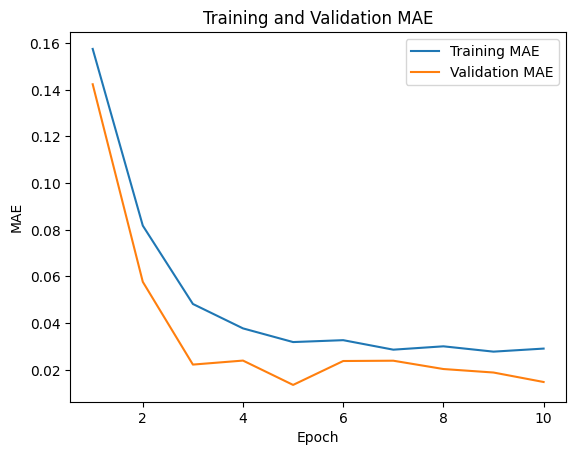

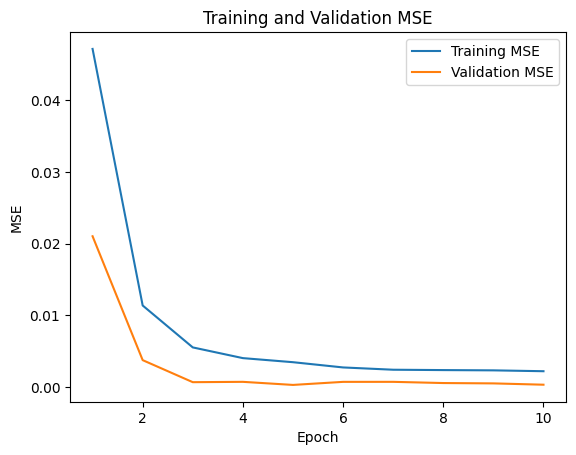

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, GRU, LSTM, Dense, Dropout, concatenate
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, GRU, Dropout, Dense, concatenate
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('/content/Litecoin.csv')

# Convert string values to numeric values in the 'Vol.' column.
def convert_vol(vol):
    if vol.endswith('M'):
        return int(float(vol[:-1]) * 1000000)
    elif vol.endswith('K'):
        return int(float(vol[:-1]) * 1000)
    else:
        return int(vol)

data['Vol.'] = data['Vol.'].apply(convert_vol)
data['Change %'] = data['Change %'].str.replace('%', '').astype(float)

# Select the primary feature for training
training_data = data['Price'].values.reshape(-1, 1)

# Normalize the training data to scale values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
training_data_normalized = scaler.fit_transform(training_data)

# Define the input window length (number of past days to use for prediction)
input_window_length = 30

# Use the PROCESS_DATA algorithm to create input/output samples
def process_data(data, input_window_length):
    Dx = []
    Dy = []
    n = len(data)
    for i in range(n):
        end_index = i + input_window_length
        if end_index > n-1:
            break
        temp_X = data[i:end_index, :]
        temp_Y = data[end_index, 0]
        Dx.append(temp_X)
        Dy.append(temp_Y)
    Dx = np.array(Dx)
    Dy = np.array(Dy)
    return (Dx, Dy)

# Create input/output samples using the training data
train_X, train_Y = process_data(training_data_normalized, input_window_length)

# Split the data into training and testing sets (use 80/20 split)
split_index = int(len(train_X)*0.8)
train_X, test_X = train_X[:split_index], train_X[split_index:]
train_Y, test_Y = train_Y[:split_index], train_Y[split_index:]

# Define the model
inputs = Input(shape=(input_window_length, 1))

# GRU Network
gru = GRU(30, activation='relu', return_sequences=False)(inputs)
gru = Dropout(0.2)(gru)
gru = Dense(32, activation='relu')(gru)

# LSTM Network
lstm = LSTM(30, activation='relu', return_sequences=True)(inputs)
lstm = Dropout(0.2)(lstm)
lstm = LSTM(50, activation='relu')(lstm)
lstm = Dense(32, activation='relu')(lstm)

# Combine GRU and LSTM networks
combined = concatenate([gru, lstm])
outputs = Dense(1)(combined)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae','mse'])

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_X, train_Y, epochs=100, validation_split=0.2, batch_size=32, callbacks=[early_stop])

# Plot MAE over epochs
mae_history = history.history['mae']
val_mae_history = history.history['val_mae']
plt.plot(range(1, len(mae_history)+1), mae_history, label='Training MAE')
plt.plot(range(1, len(val_mae_history)+1), val_mae_history, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.savefig('maeplot.pdf')
plt.show()

# Plot MSE over epochs
mse_history = history.history['loss']
val_mse_history = history.history['val_loss']
plt.plot(range(1, len(mse_history)+1), mse_history, label='Training MSE')
plt.plot(range(1, len(val_mse_history)+1), val_mse_history, label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.savefig('mseplot.pdf')
plt.show()


Epoch 1/100
37/37 [==============================] - 7s 71ms/step - loss: 0.0330 - mae: 0.1268 - mse: 0.0330 - val_loss: 0.0103 - val_mae: 0.1016 - val_mse: 0.0103
Epoch 2/100
37/37 [==============================] - 2s 52ms/step - loss: 0.0037 - mae: 0.0392 - mse: 0.0037 - val_loss: 9.3031e-04 - val_mae: 0.0300 - val_mse: 9.3031e-04
Epoch 3/100
37/37 [==============================] - 1s 39ms/step - loss: 0.0022 - mae: 0.0284 - mse: 0.0022 - val_loss: 1.4086e-04 - val_mae: 0.0109 - val_mse: 1.4086e-04
Epoch 4/100
37/37 [==============================] - 1s 38ms/step - loss: 0.0017 - mae: 0.0250 - mse: 0.0017 - val_loss: 1.2566e-04 - val_mae: 0.0104 - val_mse: 1.2566e-04
Epoch 5/100
37/37 [==============================] - 1s 39ms/step - loss: 0.0016 - mae: 0.0244 - mse: 0.0016 - val_loss: 1.4729e-04 - val_mae: 0.0113 - val_mse: 1.4729e-04
Epoch 6/100
37/37 [==============================] - 2s 58ms/step - loss: 0.0017 - mae: 0.0248 - mse: 0.0017 - val_loss: 3.0569e-04 - val_mae: 0.016

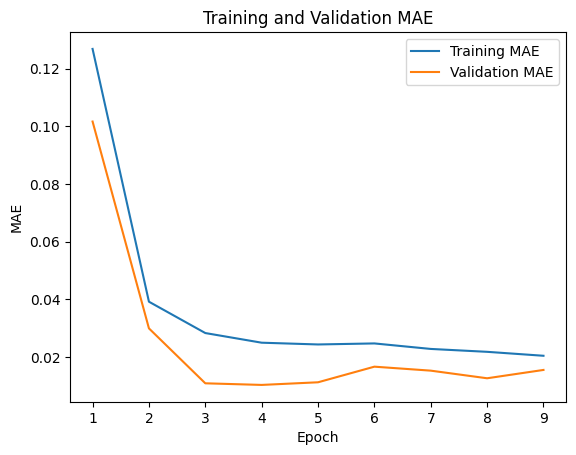

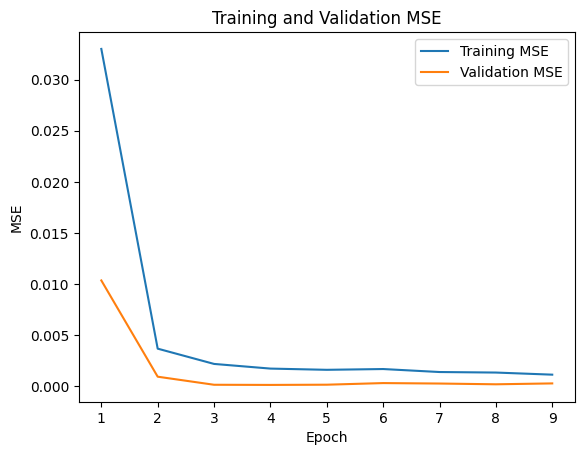

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, GRU, LSTM, Dense, Dropout, concatenate
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, GRU, Dropout, Dense, concatenate
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('/content/Monero.csv')

# Select the primary feature for training
training_data = data['Price'].values.reshape(-1, 1)

# Normalize the training data to scale values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
training_data_normalized = scaler.fit_transform(training_data)

# Define the input window length (number of past days to use for prediction)
input_window_length = 30

# Use the PROCESS_DATA algorithm to create input/output samples
def process_data(data, input_window_length):
    Dx = []
    Dy = []
    n = len(data)
    for i in range(n):
        end_index = i + input_window_length
        if end_index > n-1:
            break
        temp_X = data[i:end_index, :]
        temp_Y = data[end_index, 0]
        Dx.append(temp_X)
        Dy.append(temp_Y)
    Dx = np.array(Dx)
    Dy = np.array(Dy)
    return (Dx, Dy)

# Create input/output samples using the training data
train_X, train_Y = process_data(training_data_normalized, input_window_length)

# Split the data into training and testing sets (use 80/20 split)
split_index = int(len(train_X)*0.8)
train_X, test_X = train_X[:split_index], train_X[split_index:]
train_Y, test_Y = train_Y[:split_index], train_Y[split_index:]

# Define the model
inputs = Input(shape=(input_window_length, 1))

# GRU Network
gru = GRU(30, activation='relu', return_sequences=False)(inputs)
gru = Dropout(0.2)(gru)
gru = Dense(32, activation='relu')(gru)

# LSTM Network
lstm = LSTM(30, activation='relu', return_sequences=True)(inputs)
lstm = Dropout(0.2)(lstm)
lstm = LSTM(50, activation='relu')(lstm)
lstm = Dense(32, activation='relu')(lstm)

# Combine GRU and LSTM networks
combined = concatenate([gru, lstm])
outputs = Dense(1)(combined)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae','mse'])

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_X, train_Y, epochs=100, validation_split=0.2, batch_size=32, callbacks=[early_stop])

# Plot MAE over epochs
mae_history = history.history['mae']
val_mae_history = history.history['val_mae']
plt.plot(range(1, len(mae_history)+1), mae_history, label='Training MAE')
plt.plot(range(1, len(val_mae_history)+1), val_mae_history, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.savefig('mmaeplot.pdf')
plt.show()

# Plot MSE over epochs
mse_history = history.history['loss']
val_mse_history = history.history['val_loss']
plt.plot(range(1, len(mse_history)+1), mse_history, label='Training MSE')
plt.plot(range(1, len(val_mse_history)+1), val_mse_history, label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.savefig('mmseplot.pdf')
plt.show()


Epoch 1/100
25/25 [==============================] - 18s 202ms/step - loss: 0.0274 - mae: 0.1237 - mse: 0.0274 - val_loss: 0.0116 - val_mae: 0.1048 - val_mse: 0.0116
Epoch 2/100
25/25 [==============================] - 3s 104ms/step - loss: 0.0070 - mae: 0.0597 - mse: 0.0070 - val_loss: 0.0020 - val_mae: 0.0418 - val_mse: 0.0020
Epoch 3/100
25/25 [==============================] - 2s 90ms/step - loss: 0.0034 - mae: 0.0346 - mse: 0.0034 - val_loss: 3.8659e-04 - val_mae: 0.0162 - val_mse: 3.8659e-04
Epoch 4/100
25/25 [==============================] - 2s 90ms/step - loss: 0.0027 - mae: 0.0307 - mse: 0.0027 - val_loss: 2.4304e-04 - val_mae: 0.0118 - val_mse: 2.4304e-04
Epoch 5/100
25/25 [==============================] - 3s 118ms/step - loss: 0.0026 - mae: 0.0279 - mse: 0.0026 - val_loss: 2.2087e-04 - val_mae: 0.0110 - val_mse: 2.2087e-04
Epoch 6/100
25/25 [==============================] - 2s 80ms/step - loss: 0.0024 - mae: 0.0282 - mse: 0.0024 - val_loss: 2.8808e-04 - val_mae: 0.0128 - 

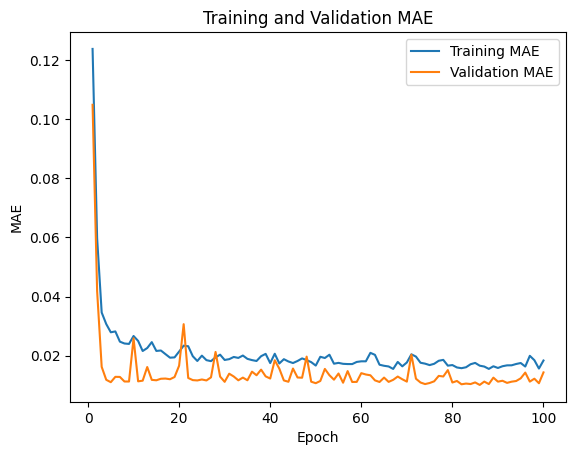

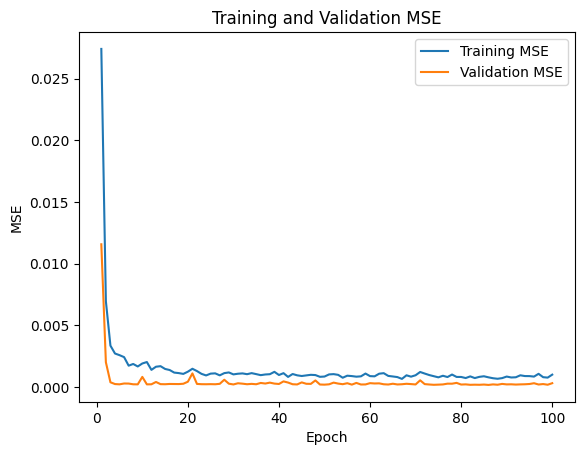

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, GRU, LSTM, Dense, Dropout, concatenate
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, GRU, Dropout, Dense, concatenate
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('/content/Litecoin.csv')

# Convert string values to numeric values in the 'Vol.' column.
def convert_vol(vol):
    if vol.endswith('M'):
        return int(float(vol[:-1]) * 1000000)
    elif vol.endswith('K'):
        return int(float(vol[:-1]) * 1000)
    else:
        return int(vol)

data['Vol.'] = data['Vol.'].apply(convert_vol)
data['Change %'] = data['Change %'].str.replace('%', '').astype(float)

# Select the primary feature for training
training_data = data['Price'].values.reshape(-1, 1)

# Normalize the training data to scale values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
training_data_normalized = scaler.fit_transform(training_data)

# Define the input window length (number of past days to use for prediction)
input_window_length = 30

# Use the PROCESS_DATA algorithm to create input/output samples
def process_data(data, input_window_length):
    Dx = []
    Dy = []
    n = len(data)
    for i in range(n):
        end_index = i + input_window_length
        if end_index > n-1:
            break
        temp_X = data[i:end_index, :]
        temp_Y = data[end_index, 0]
        Dx.append(temp_X)
        Dy.append(temp_Y)
    Dx = np.array(Dx)
    Dy = np.array(Dy)
    return (Dx, Dy)

# Create input/output samples using the training data
train_X, train_Y = process_data(training_data_normalized, input_window_length)

# Split the data into training and testing sets (use 80/20 split)
split_index = int(len(train_X)*0.8)
train_X, test_X = train_X[:split_index], train_X[split_index:]
train_Y, test_Y = train_Y[:split_index], train_Y[split_index:]

# Define the model
inputs = Input(shape=(input_window_length, 1))

# GRU Network
gru = GRU(30, activation='relu', return_sequences=False)(inputs)
gru = Dropout(0.2)(gru)
gru = Dense(32, activation='relu')(gru)

# LSTM Network
lstm = LSTM(30, activation='relu', return_sequences=True)(inputs)
lstm = Dropout(0.2)(lstm)
lstm = LSTM(50, activation='relu')(lstm)
lstm = Dense(32, activation='relu')(lstm)

# Combine GRU and LSTM networks
combined = concatenate([gru, lstm])
outputs = Dense(1)(combined)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae','mse'])

# Train the model
history = model.fit(train_X, train_Y, epochs=100, validation_split=0.2, batch_size=32)

# Plot MAE over epochs
mae_history = history.history['mae']
val_mae_history = history.history['val_mae']
plt.plot(range(1, len(mae_history)+1), mae_history, label='Training MAE')
plt.plot(range(1, len(val_mae_history)+1), val_mae_history, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.savefig('maeplot2.pdf')
plt.show()

# Plot MSE over epochs
mse_history = history.history['loss']
val_mse_history = history.history['val_loss']
plt.plot(range(1, len(mse_history)+1), mse_history, label='Training MSE')
plt.plot(range(1, len(val_mse_history)+1), val_mse_history, label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.savefig('mseplot2.pdf')
plt.show()


Epoch 1/100
37/37 [==============================] - 8s 60ms/step - loss: 0.0225 - mae: 0.1012 - mse: 0.0225 - val_loss: 0.0058 - val_mae: 0.0759 - val_mse: 0.0058
Epoch 2/100
37/37 [==============================] - 2s 44ms/step - loss: 0.0023 - mae: 0.0312 - mse: 0.0023 - val_loss: 6.7407e-04 - val_mae: 0.0254 - val_mse: 6.7407e-04
Epoch 3/100
37/37 [==============================] - 2s 42ms/step - loss: 0.0015 - mae: 0.0233 - mse: 0.0015 - val_loss: 1.7779e-04 - val_mae: 0.0125 - val_mse: 1.7779e-04
Epoch 4/100
37/37 [==============================] - 2s 43ms/step - loss: 0.0013 - mae: 0.0213 - mse: 0.0013 - val_loss: 3.4254e-04 - val_mae: 0.0182 - val_mse: 3.4254e-04
Epoch 5/100
37/37 [==============================] - 2s 44ms/step - loss: 0.0013 - mae: 0.0221 - mse: 0.0013 - val_loss: 9.4281e-05 - val_mae: 0.0089 - val_mse: 9.4281e-05
Epoch 6/100
37/37 [==============================] - 2s 51ms/step - loss: 0.0012 - mae: 0.0206 - mse: 0.0012 - val_loss: 4.8096e-04 - val_mae: 0.021

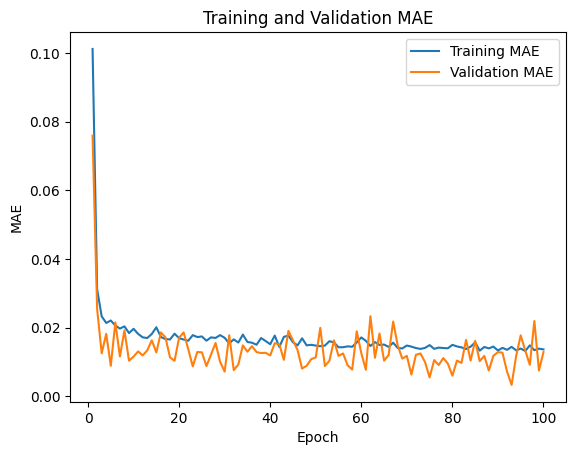

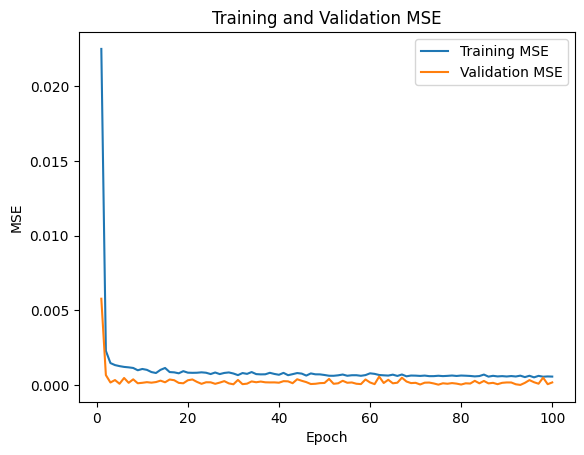

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, GRU, LSTM, Dense, Dropout, concatenate
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, GRU, Dropout, Dense, concatenate
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('/content/Monero.csv')

# Select the primary feature for training
training_data = data['Price'].values.reshape(-1, 1)

# Normalize the training data to scale values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
training_data_normalized = scaler.fit_transform(training_data)

# Define the input window length (number of past days to use for prediction)
input_window_length = 30

# Use the PROCESS_DATA algorithm to create input/output samples
def process_data(data, input_window_length):
    Dx = []
    Dy = []
    n = len(data)
    for i in range(n):
        end_index = i + input_window_length
        if end_index > n-1:
            break
        temp_X = data[i:end_index, :]
        temp_Y = data[end_index, 0]
        Dx.append(temp_X)
        Dy.append(temp_Y)
    Dx = np.array(Dx)
    Dy = np.array(Dy)
    return (Dx, Dy)

# Create input/output samples using the training data
train_X, train_Y = process_data(training_data_normalized, input_window_length)

# Split the data into training and testing sets (use 80/20 split)
split_index = int(len(train_X)*0.8)
train_X, test_X = train_X[:split_index], train_X[split_index:]
train_Y, test_Y = train_Y[:split_index], train_Y[split_index:]

# Define the model
inputs = Input(shape=(input_window_length, 1))

# GRU Network
gru = GRU(30, activation='relu', return_sequences=False)(inputs)
gru = Dropout(0.2)(gru)
gru = Dense(32, activation='relu')(gru)

# LSTM Network
lstm = LSTM(30, activation='relu', return_sequences=True)(inputs)
lstm = Dropout(0.2)(lstm)
lstm = LSTM(50, activation='relu')(lstm)
lstm = Dense(32, activation='relu')(lstm)

# Combine GRU and LSTM networks
combined = concatenate([gru, lstm])
outputs = Dense(1)(combined)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae','mse'])

# Train the model
history = model.fit(train_X, train_Y, epochs=100, validation_split=0.2, batch_size=32)

# Plot MAE over epochs
mae_history = history.history['mae']
val_mae_history = history.history['val_mae']
plt.plot(range(1, len(mae_history)+1), mae_history, label='Training MAE')
plt.plot(range(1, len(val_mae_history)+1), val_mae_history, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.savefig('mmaeplot2.pdf')
plt.show()

# Plot MSE over epochs
mse_history = history.history['loss']
val_mse_history = history.history['val_loss']
plt.plot(range(1, len(mse_history)+1), mse_history, label='Training MSE')
plt.plot(range(1, len(val_mse_history)+1), val_mse_history, label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.savefig('mmseplot2.pdf')
plt.show()


### LSTM

Epoch 1/100
25/25 [==============================] - 4s 25ms/step - loss: 0.0563 - mae: 0.1734 - mse: 0.0563 - val_loss: 0.0061 - val_mae: 0.0696 - val_mse: 0.0061
Epoch 2/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0339 - mae: 0.1338 - mse: 0.0339 - val_loss: 0.0105 - val_mae: 0.0928 - val_mse: 0.0105
Epoch 3/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0311 - mae: 0.1294 - mse: 0.0311 - val_loss: 0.0140 - val_mae: 0.1080 - val_mse: 0.0140
Epoch 4/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0301 - mae: 0.1281 - mse: 0.0301 - val_loss: 0.0121 - val_mae: 0.1006 - val_mse: 0.0121
Epoch 5/100
25/25 [==============================] - 0s 13ms/step - loss: 0.0296 - mae: 0.1267 - mse: 0.0296 - val_loss: 0.0130 - val_mae: 0.1050 - val_mse: 0.0130
Epoch 6/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0291 - mae: 0.1266 - mse: 0.0291 - val_loss: 0.0148 - val_mae: 0.1128 - val_mse: 0.0148


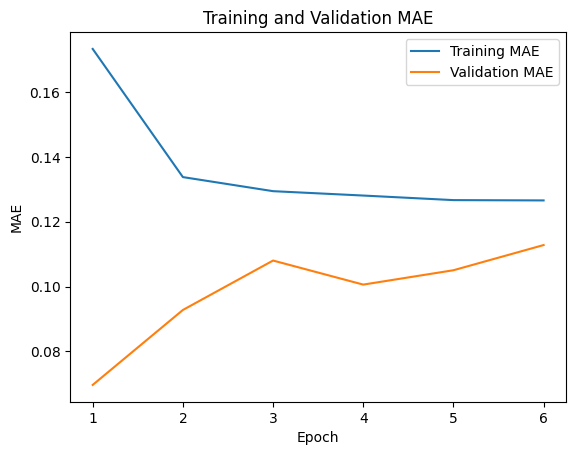

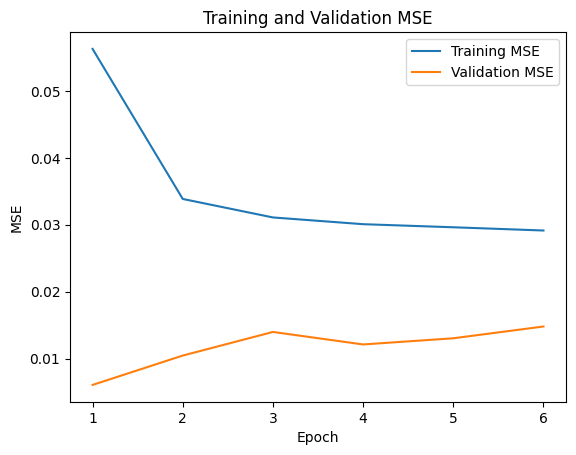

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, GRU, LSTM, Dense, Dropout, concatenate
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, GRU, Dropout, Dense, concatenate
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('/content/Litecoin.csv')

# Convert string values to numeric values in the 'Vol.' column.
def convert_vol(vol):
    if vol.endswith('M'):
        return int(float(vol[:-1]) * 1000000)
    elif vol.endswith('K'):
        return int(float(vol[:-1]) * 1000)
    else:
        return int(vol)

data['Vol.'] = data['Vol.'].apply(convert_vol)
data['Change %'] = data['Change %'].str.replace('%', '').astype(float)

# Select the primary feature for training
training_data = data['Price'].values.reshape(-1, 1)

# Normalize the training data to scale values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
training_data_normalized = scaler.fit_transform(training_data)

# Define the input window length (number of past days to use for prediction)
input_window_length = 30

# Use the PROCESS_DATA algorithm to create input/output samples
def process_data(data, input_window_length):
    Dx = []
    Dy = []
    n = len(data)
    for i in range(n):
        end_index = i + input_window_length
        if end_index > n-1:
            break
        temp_X = data[i:end_index, :]
        temp_Y = data[end_index, 0]
        Dx.append(temp_X)
        Dy.append(temp_Y)
    Dx = np.array(Dx)
    Dy = np.array(Dy)
    return (Dx, Dy)

# Create input/output samples using the training data
train_X, train_Y = process_data(training_data_normalized, input_window_length)

# Split the data into training and testing sets (use 80/20 split)
split_index = int(len(train_X)*0.8)
train_X, test_X = train_X[:split_index], train_X[split_index:]
train_Y, test_Y = train_Y[:split_index], train_Y[split_index:]

# Define the model
inputs = Input(shape=(input_window_length, 1))

# LSTM Network
lstm = LSTM(50, activation='relu', return_sequences=True)(inputs)
outputs = Dense(1)(lstm)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae','mse'])

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_X, train_Y, epochs=100, validation_split=0.2, batch_size=32, callbacks=[early_stop])

# Plot MAE over epochs
mae_history = history.history['mae']
val_mae_history = history.history['val_mae']
plt.plot(range(1, len(mae_history)+1), mae_history, label='Training MAE')
plt.plot(range(1, len(val_mae_history)+1), val_mae_history, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.savefig('maeplot.pdf')
plt.show()

# Plot MSE over epochs
mse_history = history.history['loss']
val_mse_history = history.history['val_loss']
plt.plot(range(1, len(mse_history)+1), mse_history, label='Training MSE')
plt.plot(range(1, len(val_mse_history)+1), val_mse_history, label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.savefig('mseplot.pdf')
plt.show()


Epoch 1/100
37/37 [==============================] - 4s 44ms/step - loss: 0.0472 - mae: 0.1512 - mse: 0.0472 - val_loss: 0.0193 - val_mae: 0.1356 - val_mse: 0.0193
Epoch 2/100
37/37 [==============================] - 1s 19ms/step - loss: 0.0336 - mae: 0.1278 - mse: 0.0336 - val_loss: 0.0299 - val_mae: 0.1698 - val_mse: 0.0299
Epoch 3/100
37/37 [==============================] - 1s 14ms/step - loss: 0.0327 - mae: 0.1283 - mse: 0.0327 - val_loss: 0.0314 - val_mae: 0.1747 - val_mse: 0.0314
Epoch 4/100
37/37 [==============================] - 1s 14ms/step - loss: 0.0324 - mae: 0.1276 - mse: 0.0324 - val_loss: 0.0370 - val_mae: 0.1901 - val_mse: 0.0370
Epoch 5/100
37/37 [==============================] - 1s 16ms/step - loss: 0.0326 - mae: 0.1282 - mse: 0.0326 - val_loss: 0.0317 - val_mae: 0.1764 - val_mse: 0.0317
Epoch 6/100
37/37 [==============================] - 1s 18ms/step - loss: 0.0322 - mae: 0.1279 - mse: 0.0322 - val_loss: 0.0318 - val_mae: 0.1769 - val_mse: 0.0318


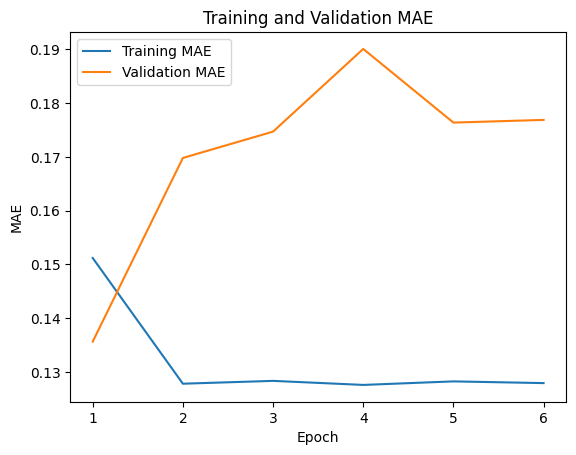

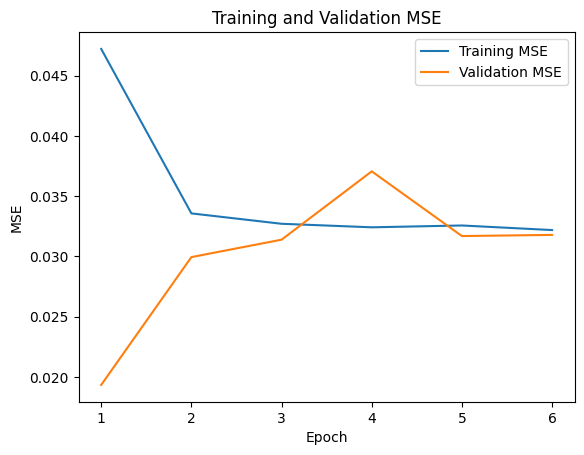

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, GRU, LSTM, Dense, Dropout, concatenate
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, GRU, Dropout, Dense, concatenate
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('/content/Monero.csv')

# Select the primary feature for training
training_data = data['Price'].values.reshape(-1, 1)

# Normalize the training data to scale values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
training_data_normalized = scaler.fit_transform(training_data)

# Define the input window length (number of past days to use for prediction)
input_window_length = 30

# Use the PROCESS_DATA algorithm to create input/output samples
def process_data(data, input_window_length):
    Dx = []
    Dy = []
    n = len(data)
    for i in range(n):
        end_index = i + input_window_length
        if end_index > n-1:
            break
        temp_X = data[i:end_index, :]
        temp_Y = data[end_index, 0]
        Dx.append(temp_X)
        Dy.append(temp_Y)
    Dx = np.array(Dx)
    Dy = np.array(Dy)
    return (Dx, Dy)

# Create input/output samples using the training data
train_X, train_Y = process_data(training_data_normalized, input_window_length)

# Split the data into training and testing sets (use 80/20 split)
split_index = int(len(train_X)*0.8)
train_X, test_X = train_X[:split_index], train_X[split_index:]
train_Y, test_Y = train_Y[:split_index], train_Y[split_index:]

# Define the model
inputs = Input(shape=(input_window_length, 1))

# LSTM Network
lstm = LSTM(50, activation='relu', return_sequences=True)(inputs)
outputs = Dense(1)(lstm)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae','mse'])

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_X, train_Y, epochs=100, validation_split=0.2, batch_size=32, callbacks=[early_stop])

# Plot MAE over epochs
mae_history = history.history['mae']
val_mae_history = history.history['val_mae']
plt.plot(range(1, len(mae_history)+1), mae_history, label='Training MAE')
plt.plot(range(1, len(val_mae_history)+1), val_mae_history, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.savefig('mmaeplot.pdf')
plt.show()

# Plot MSE over epochs
mse_history = history.history['loss']
val_mse_history = history.history['val_loss']
plt.plot(range(1, len(mse_history)+1), mse_history, label='Training MSE')
plt.plot(range(1, len(val_mse_history)+1), val_mse_history, label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.savefig('mmseplot.pdf')
plt.show()


Epoch 1/100
25/25 [==============================] - 2s 24ms/step - loss: 0.0529 - mae: 0.1671 - mse: 0.0529 - val_loss: 0.0053 - val_mae: 0.0651 - val_mse: 0.0053
Epoch 2/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0348 - mae: 0.1331 - mse: 0.0348 - val_loss: 0.0051 - val_mae: 0.0645 - val_mse: 0.0051
Epoch 3/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0316 - mae: 0.1283 - mse: 0.0316 - val_loss: 0.0096 - val_mae: 0.0898 - val_mse: 0.0096
Epoch 4/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0296 - mae: 0.1258 - mse: 0.0296 - val_loss: 0.0139 - val_mae: 0.1092 - val_mse: 0.0139
Epoch 5/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0290 - mae: 0.1256 - mse: 0.0290 - val_loss: 0.0151 - val_mae: 0.1144 - val_mse: 0.0151
Epoch 6/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0288 - mae: 0.1270 - mse: 0.0288 - val_loss: 0.0144 - val_mae: 0.1120 - val_mse: 0.0144
Epoch 7/100
25/2

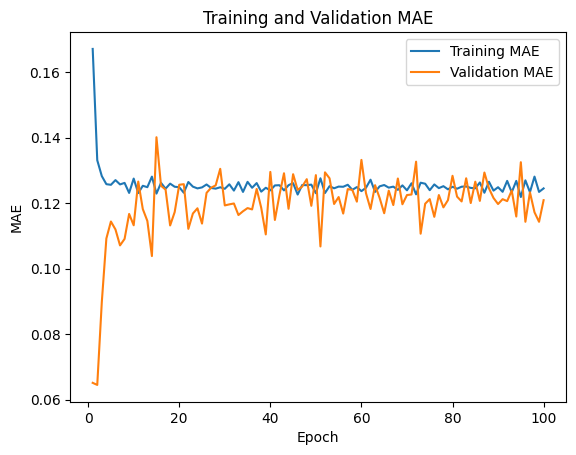

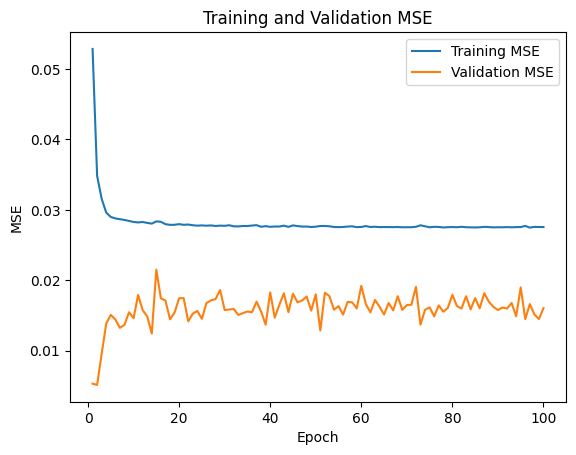

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, GRU, LSTM, Dense, Dropout, concatenate
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, GRU, Dropout, Dense, concatenate
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('/content/Litecoin.csv')

# Convert string values to numeric values in the 'Vol.' column.
def convert_vol(vol):
    if vol.endswith('M'):
        return int(float(vol[:-1]) * 1000000)
    elif vol.endswith('K'):
        return int(float(vol[:-1]) * 1000)
    else:
        return int(vol)

data['Vol.'] = data['Vol.'].apply(convert_vol)
data['Change %'] = data['Change %'].str.replace('%', '').astype(float)

# Select the primary feature for training
training_data = data['Price'].values.reshape(-1, 1)

# Normalize the training data to scale values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
training_data_normalized = scaler.fit_transform(training_data)

# Define the input window length (number of past days to use for prediction)
input_window_length = 30

# Use the PROCESS_DATA algorithm to create input/output samples
def process_data(data, input_window_length):
    Dx = []
    Dy = []
    n = len(data)
    for i in range(n):
        end_index = i + input_window_length
        if end_index > n-1:
            break
        temp_X = data[i:end_index, :]
        temp_Y = data[end_index, 0]
        Dx.append(temp_X)
        Dy.append(temp_Y)
    Dx = np.array(Dx)
    Dy = np.array(Dy)
    return (Dx, Dy)

# Create input/output samples using the training data
train_X, train_Y = process_data(training_data_normalized, input_window_length)

# Split the data into training and testing sets (use 80/20 split)
split_index = int(len(train_X)*0.8)
train_X, test_X = train_X[:split_index], train_X[split_index:]
train_Y, test_Y = train_Y[:split_index], train_Y[split_index:]

# Define the model
inputs = Input(shape=(input_window_length, 1))

# LSTM Network
lstm = LSTM(50, activation='relu', return_sequences=True)(inputs)
outputs = Dense(1)(lstm)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae','mse'])

# Train the model
history = model.fit(train_X, train_Y, epochs=100, validation_split=0.2, batch_size=32)

# Plot MAE over epochs
mae_history = history.history['mae']
val_mae_history = history.history['val_mae']
plt.plot(range(1, len(mae_history)+1), mae_history, label='Training MAE')
plt.plot(range(1, len(val_mae_history)+1), val_mae_history, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.savefig('maeplot2.pdf')
plt.show()

# Plot MSE over epochs
mse_history = history.history['loss']
val_mse_history = history.history['val_loss']
plt.plot(range(1, len(mse_history)+1), mse_history, label='Training MSE')
plt.plot(range(1, len(val_mse_history)+1), val_mse_history, label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.savefig('mseplot2.pdf')
plt.show()


Epoch 1/100
37/37 [==============================] - 2s 19ms/step - loss: 0.0402 - mae: 0.1394 - mse: 0.0402 - val_loss: 0.0214 - val_mae: 0.1431 - val_mse: 0.0214
Epoch 2/100
37/37 [==============================] - 1s 14ms/step - loss: 0.0330 - mae: 0.1290 - mse: 0.0330 - val_loss: 0.0305 - val_mae: 0.1718 - val_mse: 0.0305
Epoch 3/100
37/37 [==============================] - 1s 14ms/step - loss: 0.0325 - mae: 0.1278 - mse: 0.0325 - val_loss: 0.0348 - val_mae: 0.1842 - val_mse: 0.0348
Epoch 4/100
37/37 [==============================] - 1s 14ms/step - loss: 0.0323 - mae: 0.1275 - mse: 0.0323 - val_loss: 0.0288 - val_mae: 0.1682 - val_mse: 0.0288
Epoch 5/100
37/37 [==============================] - 1s 14ms/step - loss: 0.0321 - mae: 0.1288 - mse: 0.0321 - val_loss: 0.0311 - val_mae: 0.1751 - val_mse: 0.0311
Epoch 6/100
37/37 [==============================] - 1s 15ms/step - loss: 0.0321 - mae: 0.1287 - mse: 0.0321 - val_loss: 0.0311 - val_mae: 0.1752 - val_mse: 0.0311
Epoch 7/100
37/3

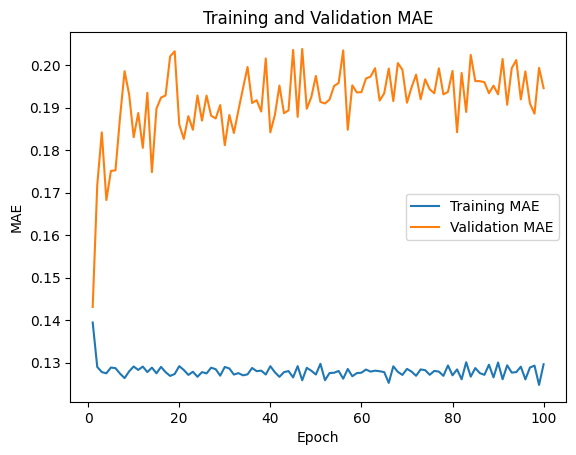

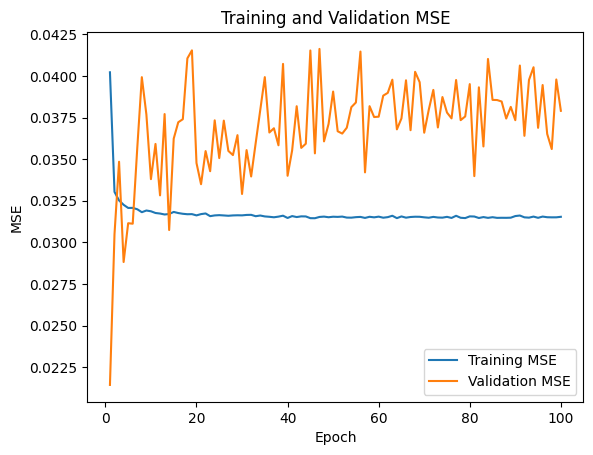

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, GRU, LSTM, Dense, Dropout, concatenate
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, GRU, Dropout, Dense, concatenate
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('/content/Monero.csv')

# Select the primary feature for training
training_data = data['Price'].values.reshape(-1, 1)

# Normalize the training data to scale values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
training_data_normalized = scaler.fit_transform(training_data)

# Define the input window length (number of past days to use for prediction)
input_window_length = 30

# Use the PROCESS_DATA algorithm to create input/output samples
def process_data(data, input_window_length):
    Dx = []
    Dy = []
    n = len(data)
    for i in range(n):
        end_index = i + input_window_length
        if end_index > n-1:
            break
        temp_X = data[i:end_index, :]
        temp_Y = data[end_index, 0]
        Dx.append(temp_X)
        Dy.append(temp_Y)
    Dx = np.array(Dx)
    Dy = np.array(Dy)
    return (Dx, Dy)

# Create input/output samples using the training data
train_X, train_Y = process_data(training_data_normalized, input_window_length)

# Split the data into training and testing sets (use 80/20 split)
split_index = int(len(train_X)*0.8)
train_X, test_X = train_X[:split_index], train_X[split_index:]
train_Y, test_Y = train_Y[:split_index], train_Y[split_index:]

# Define the model
inputs = Input(shape=(input_window_length, 1))

# LSTM Network
lstm = LSTM(50, activation='relu', return_sequences=True)(inputs)
outputs = Dense(1)(lstm)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae','mse'])

# Train the model
history = model.fit(train_X, train_Y, epochs=100, validation_split=0.2, batch_size=32)

# Plot MAE over epochs
mae_history = history.history['mae']
val_mae_history = history.history['val_mae']
plt.plot(range(1, len(mae_history)+1), mae_history, label='Training MAE')
plt.plot(range(1, len(val_mae_history)+1), val_mae_history, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.savefig('mmaeplot2.pdf')
plt.show()

# Plot MSE over epochs
mse_history = history.history['loss']
val_mse_history = history.history['val_loss']
plt.plot(range(1, len(mse_history)+1), mse_history, label='Training MSE')
plt.plot(range(1, len(val_mse_history)+1), val_mse_history, label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.savefig('mmseplot2.pdf')
plt.show()


# 4. Prediction

## Litecoin

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D , Dropout , Flatten , BatchNormalization,LSTM
from tensorflow.keras.optimizers import SGD,Adam
from sklearn.metrics import confusion_matrix
import pandas as pd 
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard,EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Load the data from the csv file
df = pd.read_csv('/content/Litecoin.csv')

# Print the first two rows
print('A:')
print(df.head(5))

def convert_vol(vol):
    if vol.endswith('M'):
        return int(float(vol[:-1]) * 1000000)
    elif vol.endswith('K'):
        return int(float(vol[:-1]) * 1000)
    else:
        return int(vol)

df['Vol.'] = df['Vol.'].apply(convert_vol)
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)
print('B:')
print(df.head(5))

A:
           Date   Price    Open    High     Low    Vol. Change %
0  Feb 23, 2020  79.706  74.817  79.920  74.722  11.93M    6.53%
1  Feb 22, 2020  74.818  73.288  76.642  72.422  11.56M    2.08%
2  Feb 21, 2020  73.291  69.455  75.161  68.633  12.13M    5.52%
3  Feb 20, 2020  69.455  70.782  72.339  66.495  12.45M   -1.87%
4  Feb 19, 2020  70.782  77.173  79.041  68.264  12.10M   -8.28%
B:
           Date   Price    Open    High     Low      Vol.  Change %
0  Feb 23, 2020  79.706  74.817  79.920  74.722  11930000      6.53
1  Feb 22, 2020  74.818  73.288  76.642  72.422  11560000      2.08
2  Feb 21, 2020  73.291  69.455  75.161  68.633  12130000      5.52
3  Feb 20, 2020  69.455  70.782  72.339  66.495  12450000     -1.87
4  Feb 19, 2020  70.782  77.173  79.041  68.264  12100000     -8.28


In [ ]:
df=df[['Price']]
df.shape
df.head()

Price
0  79.706
1  74.818
2  73.291
3  69.455
4  70.782

### 1-day prediction window (Hybrid)

In [ ]:
# Scale the data using MinMaxScaler with range (0,1)
scaler = MinMaxScaler(feature_range=(0,1))
df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

def fun(data, lag):
    """
    A function that takes in data and a lag value and returns two arrays: x and y.
    x is an array of shape (k, lag, n), where k is the number of samples and n is the number of features.
    y is an array of shape (k, 1), where k is the number of samples.
    Each sample in x is a sequence of lag consecutive observations from data, and the corresponding value in y is the next observation.
    """
    k = len(data) - lag
    x = []
    y = []
    for i in range(k):
        x.append(data[i:i+lag])
        y.append(data[i+lag,:1])
    x = np.array(x)
    y = np.array(y)
    return x, y

# Reverse the order of the data array
data = np.array(df.iloc[::-1])

# Set the number of data points to predict
prediction_window = 1

# Set the number of previous data points to use for prediction
lag = 30

# Split the data into train and test sets
test_start_index = len(data) - prediction_window - lag
test = data[test_start_index:]
train = data[:test_start_index]

# Use the function fun to create x_train, y_train, x_test, and y_test arrays
x_train, y_train = fun(train, lag)
x_test, y_test = fun(test, lag)


Epoch 1/100
39/39 [==============================] - 29s 281ms/step - loss: 0.0407 - mae: 0.1388 - mse: 0.0407 - val_loss: 0.0075 - val_mae: 0.0865 - val_mse: 0.0075
Epoch 2/100
39/39 [==============================] - 6s 161ms/step - loss: 0.0172 - mae: 0.0845 - mse: 0.0172 - val_loss: 3.6571e-04 - val_mae: 0.0191 - val_mse: 3.6571e-04
Epoch 3/100
39/39 [==============================] - 8s 200ms/step - loss: 0.0040 - mae: 0.0402 - mse: 0.0040 - val_loss: 2.0169e-05 - val_mae: 0.0045 - val_mse: 2.0169e-05
Epoch 4/100
39/39 [==============================] - 7s 170ms/step - loss: 0.0025 - mae: 0.0323 - mse: 0.0025 - val_loss: 1.7865e-04 - val_mae: 0.0134 - val_mse: 1.7865e-04
Epoch 5/100
39/39 [==============================] - 8s 199ms/step - loss: 0.0022 - mae: 0.0291 - mse: 0.0022 - val_loss: 3.3336e-04 - val_mae: 0.0183 - val_mse: 3.3336e-04
Epoch 6/100
39/39 [==============================] - 8s 199ms/step - loss: 0.0020 - mae: 0.0289 - mse: 0.0020 - val_loss: 4.7889e-04 - val_mae

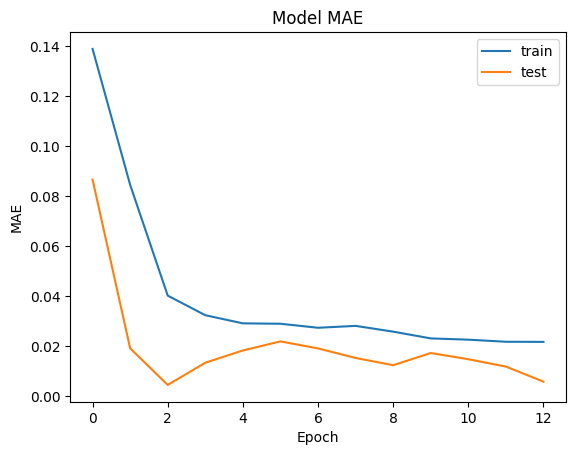

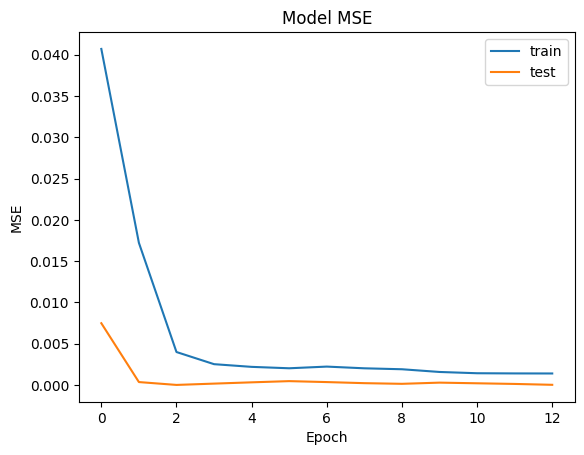

In [ ]:
from tensorflow.keras.layers import GRU, LSTM, Dropout, Dense, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Define the loss function
loss_fn = 'mse'

# Define the model
inputs = Input(shape=(30,1))
gru = GRU(30, activation='relu', return_sequences=False)(inputs)
gru = Dropout(0.25)(gru)
gru = Dense(1, activation='relu')(gru)
lstm = LSTM(30, activation='relu', return_sequences=True)(inputs)
lstm = Dropout(0.25)(lstm)
lstm = LSTM(50, activation='relu')(lstm)
lstm = Dense(1, activation='relu')(lstm)
combined = concatenate([gru, lstm])
outputs = Dense(1)(combined)
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with Adam optimizer and defined loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss=loss_fn, metrics=['mae','mse'])

# Fit the model with train data and validate with test data for 100 epochs
callback=EarlyStopping(min_delta=1e-5,patience=10)
history = model.fit(x_train, y_train, epochs=100, callbacks=[callback], validation_data=(x_test, y_test))

# Plot the MAE and MSE graphs
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmae.pdf')
plt.show()

plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmse.pdf')
plt.show()


1/1 [==============================] - 1s 1s/step
Unscaled Metrics
MSE :  4.252705140033529
RMSE :  2.0622088012695343
MAE :  2.0622088012695343
MAPE :  2.5872692159555544
R2 :  nan
Scaled Metrics
MSE :  3.3574526076436985e-05
RMSE :  0.005794352947175119
MAE :  0.005794352947175119
MAPE :  2.7060995379623973
R2 :  nan
y_test_unscaled:
[[79.706]]
y_pred_unscaled:
[[77.64379]]


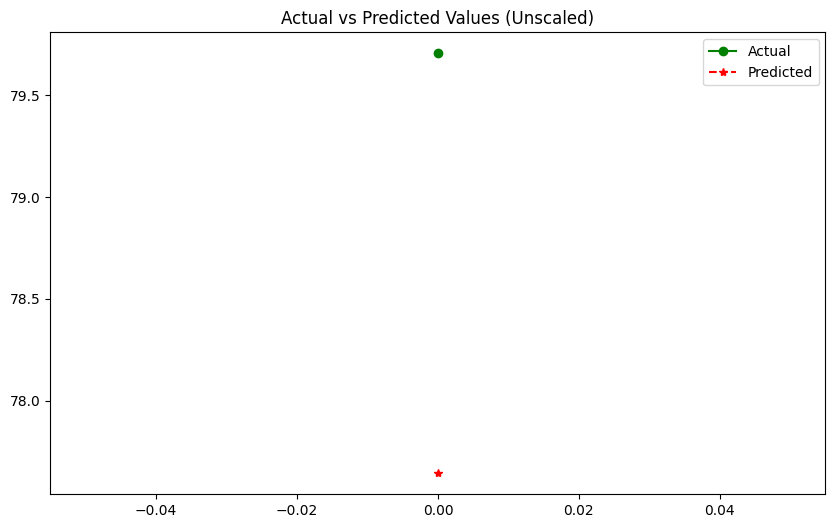

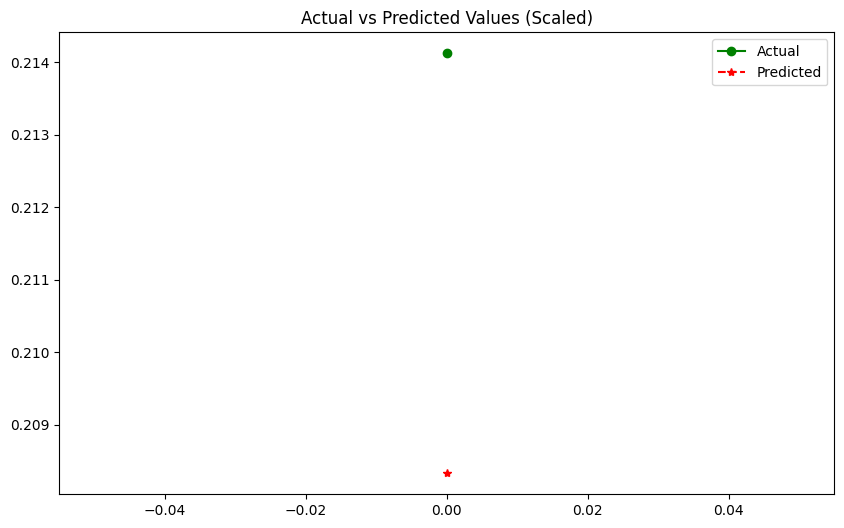

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define and fit the scaler object on the training data
# scaler = MinMaxScaler()
# scaler.fit(x_train)

# Predict on the test data and unscale the predicted and test data
y_pred_scaled = model.predict(x_test)
y_pred_unscaled = scaler.inverse_transform(y_pred_scaled[::-1])
y_test_unscaled = scaler.inverse_transform(y_test)

# Print the evaluation metrics for the unscaled predictions
MAE_unscaled = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
RMSE_unscaled = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
R2_unscaled = r2_score(y_test_unscaled, y_pred_unscaled)
MAPE_unscaled = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100
MSE_unscaled = mean_squared_error(y_test_unscaled, y_pred_unscaled)

print('Unscaled Metrics')
print('MSE : ', MSE_unscaled)
print('RMSE : ', RMSE_unscaled)
print('MAE : ', MAE_unscaled)
print('MAPE : ', MAPE_unscaled)
print('R2 : ', R2_unscaled)

# Print the evaluation metrics for the scaled predictions
y_pred_scaled = y_pred_scaled.flatten()[::-1]
y_test_scaled = y_test.flatten()
MAE_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
RMSE_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
R2_scaled = r2_score(y_test_scaled, y_pred_scaled)
MAPE_scaled = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)) * 100
MSE_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)

print('Scaled Metrics')
print('MSE : ', MSE_scaled)
print('RMSE : ', RMSE_scaled)
print('MAE : ', MAE_scaled)
print('MAPE : ', MAPE_scaled)
print('R2 : ', R2_scaled)

print('y_test_unscaled:')
print(y_test_unscaled)

print('y_pred_unscaled:')
print(y_pred_unscaled)

# Plot the actual vs predicted values for the unscaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, 'go-', label='Actual')
plt.plot(y_pred_unscaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Unscaled)')
plt.legend()
plt.savefig('ActualPredictedValuesUnscaled.pdf')
plt.show()

# Plot the actual vs predicted values for the scaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, 'go-', label='Actual')
plt.plot(y_pred_scaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Scaled)')
plt.legend()
plt.savefig('ActualPredictedValuesScaled.pdf')
plt.show()


### 1-day prediction window (LSTM)

In [ ]:
# Scale the data using MinMaxScaler with range (0,1)
scaler = MinMaxScaler(feature_range=(0,1))
df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

def fun(data, lag):
    """
    A function that takes in data and a lag value and returns two arrays: x and y.
    x is an array of shape (k, lag, n), where k is the number of samples and n is the number of features.
    y is an array of shape (k, 1), where k is the number of samples.
    Each sample in x is a sequence of lag consecutive observations from data, and the corresponding value in y is the next observation.
    """
    k = len(data) - lag
    x = []
    y = []
    for i in range(k):
        x.append(data[i:i+lag])
        y.append(data[i+lag,:1])
    x = np.array(x)
    y = np.array(y)
    return x, y

# Reverse the order of the data array
data = np.array(df.iloc[::-1])

# Set the number of data points to predict
prediction_window = 1

# Set the number of previous data points to use for prediction
lag = 30

# Split the data into train and test sets
test_start_index = len(data) - prediction_window - lag
test = data[test_start_index:]
train = data[:test_start_index]

# Use the function fun to create x_train, y_train, x_test, and y_test arrays
x_train, y_train = fun(train, lag)
x_test, y_test = fun(test, lag)


Epoch 1/100
39/39 [==============================] - 14s 142ms/step - loss: 0.0241 - mae: 0.0989 - mse: 0.0241 - val_loss: 3.7294e-04 - val_mae: 0.0193 - val_mse: 3.7294e-04
Epoch 2/100
39/39 [==============================] - 6s 161ms/step - loss: 0.0023 - mae: 0.0254 - mse: 0.0023 - val_loss: 4.1800e-04 - val_mae: 0.0204 - val_mse: 4.1800e-04
Epoch 3/100
39/39 [==============================] - 5s 125ms/step - loss: 0.0017 - mae: 0.0197 - mse: 0.0017 - val_loss: 3.0129e-04 - val_mae: 0.0174 - val_mse: 3.0129e-04
Epoch 4/100
39/39 [==============================] - 5s 128ms/step - loss: 0.0015 - mae: 0.0195 - mse: 0.0015 - val_loss: 5.5218e-05 - val_mae: 0.0074 - val_mse: 5.5218e-05
Epoch 5/100
39/39 [==============================] - 6s 145ms/step - loss: 0.0014 - mae: 0.0184 - mse: 0.0014 - val_loss: 2.4547e-04 - val_mae: 0.0157 - val_mse: 2.4547e-04
Epoch 6/100
39/39 [==============================] - 4s 108ms/step - loss: 0.0013 - mae: 0.0172 - mse: 0.0013 - val_loss: 1.6011e-04 -

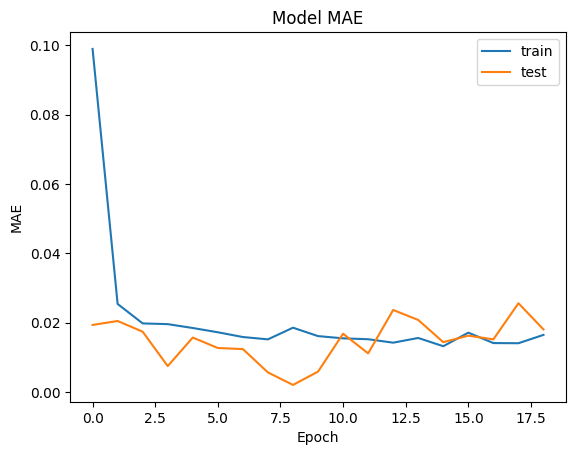

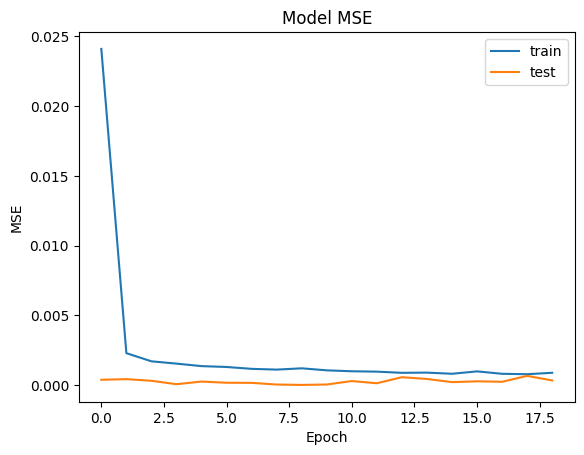

In [ ]:
from tensorflow.keras.layers import GRU, LSTM, Dropout, Dense, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Define the loss function
loss_fn = 'mse'

# Define the model
inputs = Input(shape=(30,1))

# LSTM Network
lstm = LSTM(50, activation='relu')(inputs)
outputs = Dense(1)(lstm)

model = Model(inputs=inputs, outputs=outputs)
# Compile the model with Adam optimizer and defined loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss=loss_fn, metrics=['mae','mse'])

# Fit the model with train data and validate with test data for 100 epochs
callback=EarlyStopping(min_delta=1e-5,patience=10)
history = model.fit(x_train, y_train, epochs=100, callbacks=[callback], validation_data=(x_test, y_test))

# Plot the MAE and MSE graphs
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmae.pdf')
plt.show()

plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmse.pdf')
plt.show()


1/1 [==============================] - 1s 517ms/step
Unscaled Metrics
MSE :  41.09732506486197
RMSE :  6.410719543457034
MAE :  6.410719543457034
MAPE :  8.042957297389199
R2 :  nan
Scaled Metrics
MSE :  0.0003244576883892743
RMSE :  0.018012709079682443
MAE :  0.018012709079682443
MAPE :  8.412360131038213
R2 :  nan
y_test_unscaled:
[[79.706]]
y_pred_unscaled:
[[73.29528]]


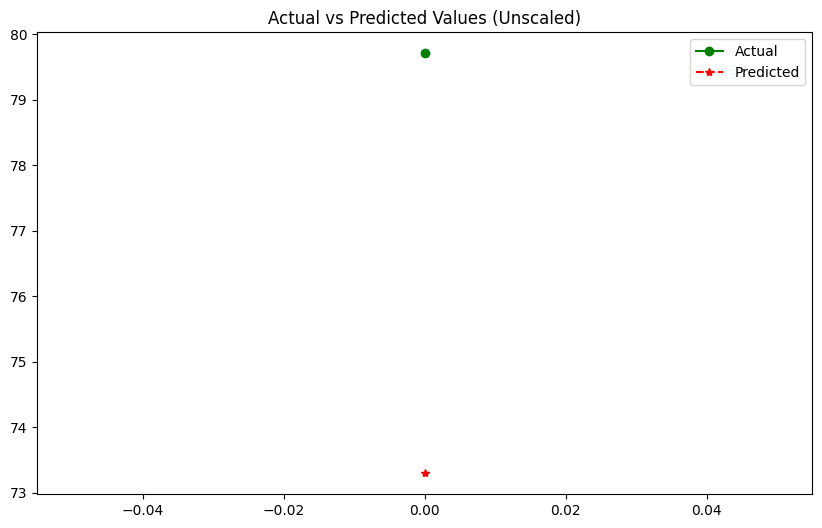

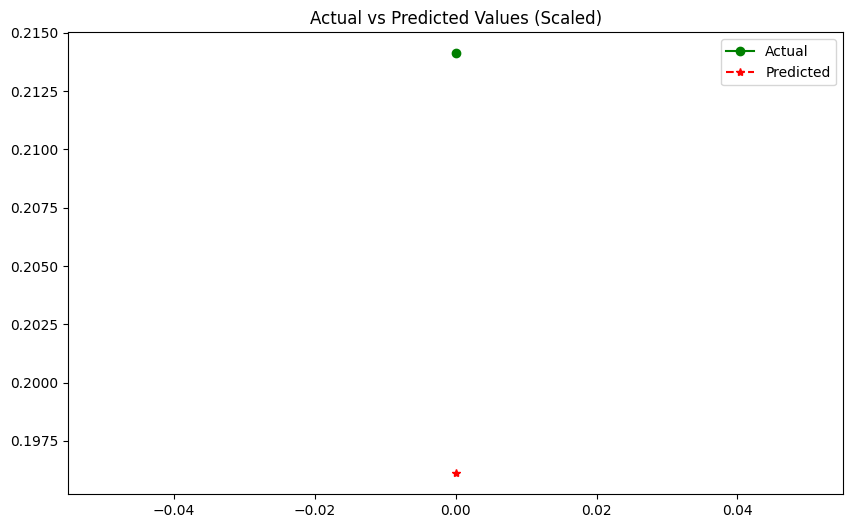

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define and fit the scaler object on the training data
# scaler = MinMaxScaler()
# scaler.fit(x_train)

# Predict on the test data and unscale the predicted and test data
y_pred_scaled = model.predict(x_test)
y_pred_unscaled = scaler.inverse_transform(y_pred_scaled[::-1])
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Print the evaluation metrics for the unscaled predictions
MAE_unscaled = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
RMSE_unscaled = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
R2_unscaled = r2_score(y_test_unscaled, y_pred_unscaled)
MAPE_unscaled = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100
MSE_unscaled = mean_squared_error(y_test_unscaled, y_pred_unscaled)

print('Unscaled Metrics')
print('MSE : ', MSE_unscaled)
print('RMSE : ', RMSE_unscaled)
print('MAE : ', MAE_unscaled)
print('MAPE : ', MAPE_unscaled)
print('R2 : ', R2_unscaled)

# Print the evaluation metrics for the scaled predictions
y_pred_scaled = y_pred_scaled.flatten()[::-1]
y_test_scaled = y_test.flatten()
MAE_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
RMSE_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
R2_scaled = r2_score(y_test_scaled, y_pred_scaled)
MAPE_scaled = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)) * 100
MSE_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)

print('Scaled Metrics')
print('MSE : ', MSE_scaled)
print('RMSE : ', RMSE_scaled)
print('MAE : ', MAE_scaled)
print('MAPE : ', MAPE_scaled)
print('R2 : ', R2_scaled)

print('y_test_unscaled:')
print(y_test_unscaled)

print('y_pred_unscaled:')
print(y_pred_unscaled)

# Plot the actual vs predicted values for the unscaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, 'go-', label='Actual')
plt.plot(y_pred_unscaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Unscaled)')
plt.legend()
plt.savefig('ActualPredictedValuesUnscaled.pdf')
plt.show()

# Plot the actual vs predicted values for the scaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, 'go-', label='Actual')
plt.plot(y_pred_scaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Scaled)')
plt.legend()
plt.savefig('ActualPredictedValuesScaled.pdf')
plt.show()


### 3-day prediction window (Hybrid)

In [ ]:
# Scale the data using MinMaxScaler with range (0,1)
scaler = MinMaxScaler(feature_range=(0,1))
df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

def fun(data, lag):
    """
    A function that takes in data and a lag value and returns two arrays: x and y.
    x is an array of shape (k, lag, n), where k is the number of samples and n is the number of features.
    y is an array of shape (k, 1), where k is the number of samples.
    Each sample in x is a sequence of lag consecutive observations from data, and the corresponding value in y is the next observation.
    """
    k = len(data) - lag
    x = []
    y = []
    for i in range(k):
        x.append(data[i:i+lag])
        y.append(data[i+lag,:1])
    x = np.array(x)
    y = np.array(y)
    return x, y

# Reverse the order of the data array
data = np.array(df.iloc[::-1])

# Set the number of data points to predict
prediction_window = 3

# Set the number of previous data points to use for prediction
lag = 30

# Split the data into train and test sets
test_start_index = len(data) - prediction_window - lag
test = data[test_start_index:]
train = data[:test_start_index]

# Use the function fun to create x_train, y_train, x_test, and y_test arrays
x_train, y_train = fun(train, lag)
x_test, y_test = fun(test, lag)


Epoch 1/100
38/38 [==============================] - 18s 159ms/step - loss: 0.0161 - mae: 0.0807 - mse: 0.0161 - val_loss: 5.6082e-04 - val_mae: 0.0227 - val_mse: 5.6082e-04
Epoch 2/100
38/38 [==============================] - 6s 146ms/step - loss: 0.0045 - mae: 0.0396 - mse: 0.0045 - val_loss: 5.1576e-05 - val_mae: 0.0054 - val_mse: 5.1576e-05
Epoch 3/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0030 - mae: 0.0311 - mse: 0.0030 - val_loss: 3.4105e-04 - val_mae: 0.0172 - val_mse: 3.4105e-04
Epoch 4/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0025 - mae: 0.0272 - mse: 0.0025 - val_loss: 4.8520e-05 - val_mae: 0.0064 - val_mse: 4.8520e-05
Epoch 5/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0022 - mae: 0.0262 - mse: 0.0022 - val_loss: 5.0722e-05 - val_mae: 0.0068 - val_mse: 5.0722e-05
Epoch 6/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0020 - mae: 0.0256 - mse: 0.0020 - val_loss: 1.6573e-04 - 

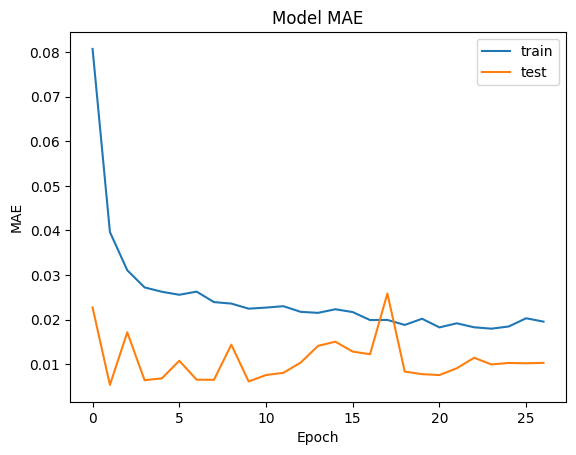

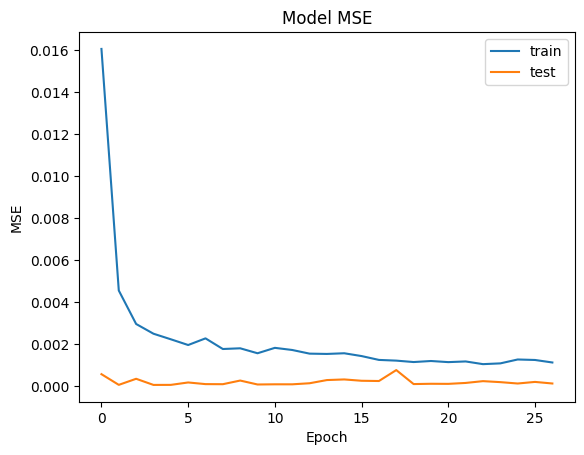

In [ ]:
from tensorflow.keras.layers import GRU, LSTM, Dropout, Dense, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Define the loss function
loss_fn = 'mse'

# Define the model
inputs = Input(shape=(30,1))
gru = GRU(30, activation='relu', return_sequences=False)(inputs)
gru = Dropout(0.25)(gru)
gru = Dense(1, activation='relu')(gru)
lstm = LSTM(30, activation='relu', return_sequences=True)(inputs)
lstm = Dropout(0.25)(lstm)
lstm = LSTM(50, activation='relu')(lstm)
lstm = Dense(1, activation='relu')(lstm)
combined = concatenate([gru, lstm])
outputs = Dense(1)(combined)
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with Adam optimizer and defined loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss=loss_fn, metrics=['mae','mse'])

# Fit the model with train data and validate with test data for 100 epochs
callback=EarlyStopping(min_delta=1e-5,patience=25)
history = model.fit(x_train, y_train, epochs=100, callbacks=[callback], validation_data=(x_test, y_test))

# Plot the MAE and MSE graphs
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmae.pdf')
plt.show()

plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmse.pdf')
plt.show()


1/1 [==============================] - 0s 392ms/step
Unscaled Metrics
MSE :  5.731486016081219
RMSE :  2.394052216657193
MAE :  2.2597401529947945
MAPE :  3.016276377807106
R2 :  0.2344010793684932
Scaled Metrics
MSE :  4.524923897099102e-05
RMSE :  0.006726755456458264
MAE :  0.006349368240990268
MAPE :  3.164235935206445
R2 :  0.23440104719977606
y_test_unscaled:
[[73.291]
 [74.818]
 [79.706]]
y_pred_unscaled:
[[76.39264]
 [77.29397]
 [78.50439]]


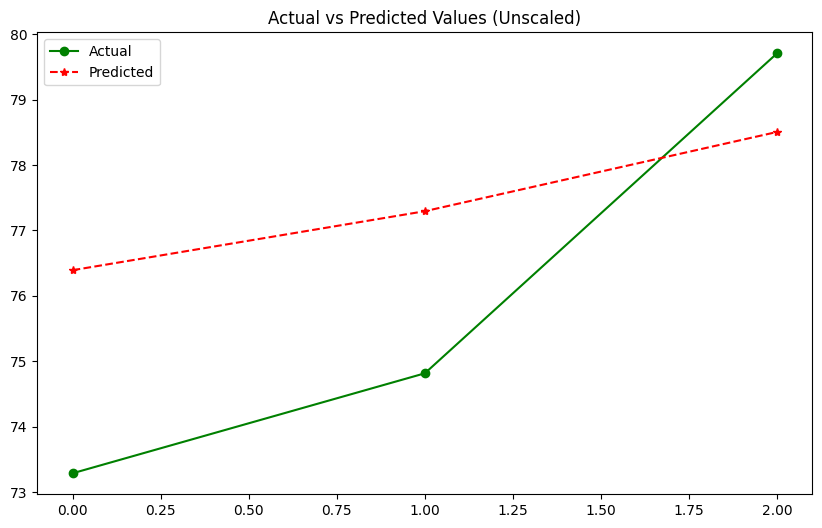

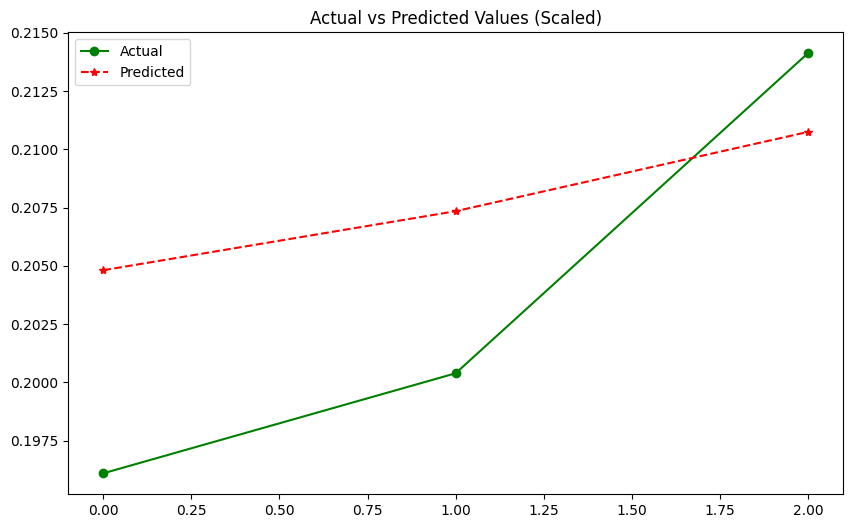

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define and fit the scaler object on the training data
# scaler = MinMaxScaler()
# scaler.fit(x_train)

# Predict on the test data and unscale the predicted and test data
y_pred_scaled = model.predict(x_test)
y_pred_unscaled = scaler.inverse_transform(y_pred_scaled[::-1])
y_test_unscaled = scaler.inverse_transform(y_test)

# Print the evaluation metrics for the unscaled predictions
MAE_unscaled = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
RMSE_unscaled = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
R2_unscaled = r2_score(y_test_unscaled, y_pred_unscaled)
MAPE_unscaled = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100
MSE_unscaled = mean_squared_error(y_test_unscaled, y_pred_unscaled)

print('Unscaled Metrics')
print('MSE : ', MSE_unscaled)
print('RMSE : ', RMSE_unscaled)
print('MAE : ', MAE_unscaled)
print('MAPE : ', MAPE_unscaled)
print('R2 : ', R2_unscaled)

# Print the evaluation metrics for the scaled predictions
y_pred_scaled = y_pred_scaled.flatten()[::-1]
y_test_scaled = y_test.flatten()
MAE_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
RMSE_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
R2_scaled = r2_score(y_test_scaled, y_pred_scaled)
MAPE_scaled = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)) * 100
MSE_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)

print('Scaled Metrics')
print('MSE : ', MSE_scaled)
print('RMSE : ', RMSE_scaled)
print('MAE : ', MAE_scaled)
print('MAPE : ', MAPE_scaled)
print('R2 : ', R2_scaled)

print('y_test_unscaled:')
print(y_test_unscaled)

print('y_pred_unscaled:')
print(y_pred_unscaled)

# Plot the actual vs predicted values for the unscaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, 'go-', label='Actual')
plt.plot(y_pred_unscaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Unscaled)')
plt.legend()
plt.savefig('ActualPredictedValuesUnscaled.pdf')
plt.show()

# Plot the actual vs predicted values for the scaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, 'go-', label='Actual')
plt.plot(y_pred_scaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Scaled)')
plt.legend()
plt.savefig('ActualPredictedValuesScaled.pdf')
plt.show()


### 3-day prediction window (LSTM)

In [ ]:
# Scale the data using MinMaxScaler with range (0,1)
scaler = MinMaxScaler(feature_range=(0,1))
df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

def fun(data, lag):
    """
    A function that takes in data and a lag value and returns two arrays: x and y.
    x is an array of shape (k, lag, n), where k is the number of samples and n is the number of features.
    y is an array of shape (k, 1), where k is the number of samples.
    Each sample in x is a sequence of lag consecutive observations from data, and the corresponding value in y is the next observation.
    """
    k = len(data) - lag
    x = []
    y = []
    for i in range(k):
        x.append(data[i:i+lag])
        y.append(data[i+lag,:1])
    x = np.array(x)
    y = np.array(y)
    return x, y

# Reverse the order of the data array
data = np.array(df.iloc[::-1])

# Set the number of data points to predict
prediction_window = 3

# Set the number of previous data points to use for prediction
lag = 30

# Split the data into train and test sets
test_start_index = len(data) - prediction_window - lag
test = data[test_start_index:]
train = data[:test_start_index]

# Use the function fun to create x_train, y_train, x_test, and y_test arrays
x_train, y_train = fun(train, lag)
x_test, y_test = fun(test, lag)


Epoch 1/100
38/38 [==============================] - 11s 45ms/step - loss: 0.0133 - mae: 0.0749 - mse: 0.0133 - val_loss: 4.1274e-04 - val_mae: 0.0188 - val_mse: 4.1274e-04
Epoch 2/100
38/38 [==============================] - 1s 34ms/step - loss: 0.0026 - mae: 0.0284 - mse: 0.0026 - val_loss: 2.4884e-04 - val_mae: 0.0137 - val_mse: 2.4884e-04
Epoch 3/100
38/38 [==============================] - 1s 33ms/step - loss: 0.0021 - mae: 0.0244 - mse: 0.0021 - val_loss: 4.3062e-04 - val_mae: 0.0192 - val_mse: 4.3062e-04
Epoch 4/100
38/38 [==============================] - 1s 30ms/step - loss: 0.0018 - mae: 0.0222 - mse: 0.0018 - val_loss: 6.8858e-05 - val_mae: 0.0080 - val_mse: 6.8858e-05
Epoch 5/100
38/38 [==============================] - 1s 36ms/step - loss: 0.0015 - mae: 0.0188 - mse: 0.0015 - val_loss: 6.7269e-05 - val_mae: 0.0078 - val_mse: 6.7269e-05
Epoch 6/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0013 - mae: 0.0170 - mse: 0.0013 - val_loss: 6.5916e-05 - val_m

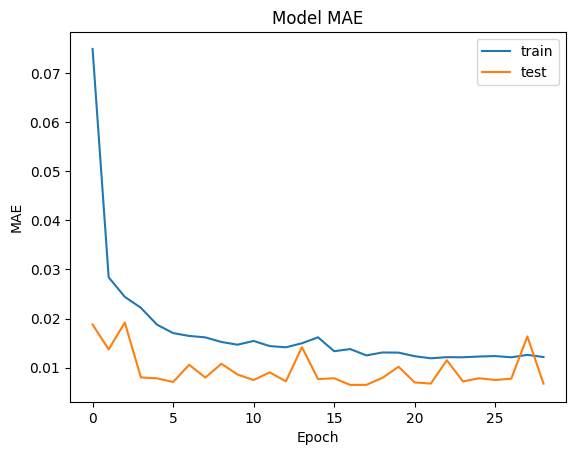

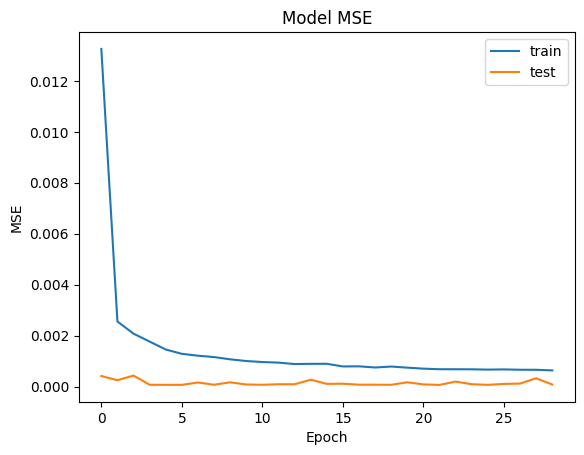

In [ ]:
from tensorflow.keras.layers import GRU, LSTM, Dropout, Dense, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Define the loss function
loss_fn = 'mse'

# Define the model
inputs = Input(shape=(30,1))

# LSTM Network
lstm = LSTM(50, activation='relu')(inputs)
outputs = Dense(1)(lstm)

model = Model(inputs=inputs, outputs=outputs)
# Compile the model with Adam optimizer and defined loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss=loss_fn, metrics=['mae','mse'])

# Fit the model with train data and validate with test data for 100 epochs
callback=EarlyStopping(min_delta=1e-5,patience=25)
history = model.fit(x_train, y_train, epochs=100, callbacks=[callback], validation_data=(x_test, y_test))

# Plot the MAE and MSE graphs
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmae.pdf')
plt.show()

plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmse.pdf')
plt.show()


1/1 [==============================] - 1s 528ms/step
Unscaled Metrics
MSE :  10.332578876395438
RMSE :  3.2144329012121933
MAE :  2.4414387410481786
MAPE :  3.1258436259589053
R2 :  -0.3802024837734779
Scaled Metrics
MSE :  8.157429347034417e-05
RMSE :  0.009031848840096038
MAE :  0.006859904073134822
MAPE :  3.272676784802407
R2 :  -0.38020428799591444
y_test_unscaled:
[[73.291]
 [74.818]
 [79.706]]
y_pred_unscaled:
[[74.37685]
 [73.97466]
 [74.31087]]


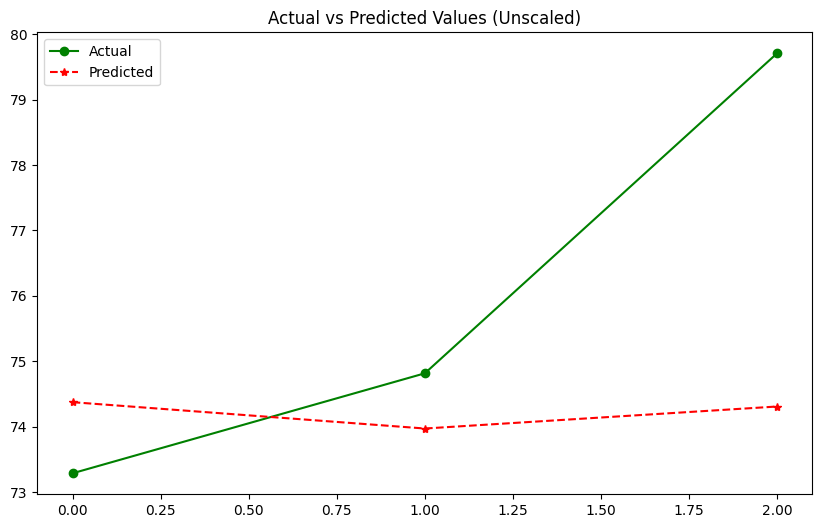

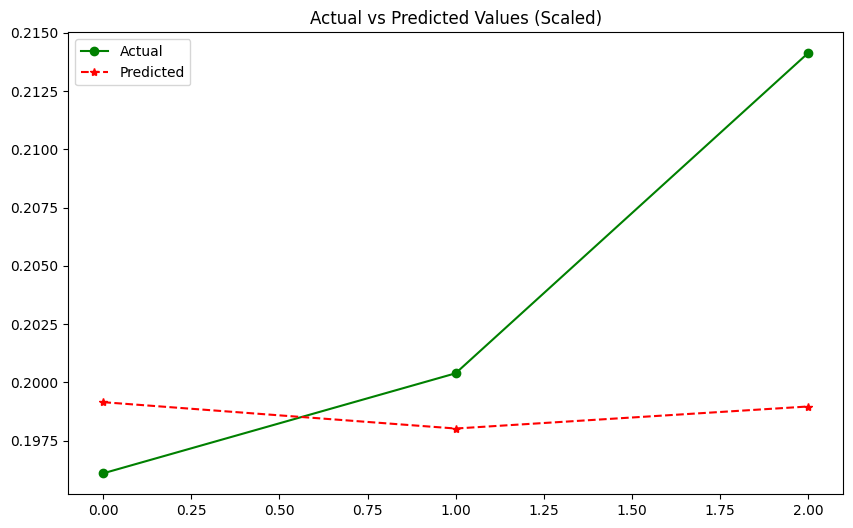

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define and fit the scaler object on the training data
# scaler = MinMaxScaler()
# scaler.fit(x_train)

# Predict on the test data and unscale the predicted and test data
y_pred_scaled = model.predict(x_test)
y_pred_unscaled = scaler.inverse_transform(y_pred_scaled[::-1])
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Print the evaluation metrics for the unscaled predictions
MAE_unscaled = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
RMSE_unscaled = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
R2_unscaled = r2_score(y_test_unscaled, y_pred_unscaled)
MAPE_unscaled = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100
MSE_unscaled = mean_squared_error(y_test_unscaled, y_pred_unscaled)

print('Unscaled Metrics')
print('MSE : ', MSE_unscaled)
print('RMSE : ', RMSE_unscaled)
print('MAE : ', MAE_unscaled)
print('MAPE : ', MAPE_unscaled)
print('R2 : ', R2_unscaled)

# Print the evaluation metrics for the scaled predictions
y_pred_scaled = y_pred_scaled.flatten()[::-1]
y_test_scaled = y_test.flatten()
MAE_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
RMSE_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
R2_scaled = r2_score(y_test_scaled, y_pred_scaled)
MAPE_scaled = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)) * 100
MSE_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)

print('Scaled Metrics')
print('MSE : ', MSE_scaled)
print('RMSE : ', RMSE_scaled)
print('MAE : ', MAE_scaled)
print('MAPE : ', MAPE_scaled)
print('R2 : ', R2_scaled)

print('y_test_unscaled:')
print(y_test_unscaled)

print('y_pred_unscaled:')
print(y_pred_unscaled)

# Plot the actual vs predicted values for the unscaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, 'go-', label='Actual')
plt.plot(y_pred_unscaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Unscaled)')
plt.legend()
plt.savefig('ActualPredictedValuesUnscaled.pdf')
plt.show()

# Plot the actual vs predicted values for the scaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, 'go-', label='Actual')
plt.plot(y_pred_scaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Scaled)')
plt.legend()
plt.savefig('ActualPredictedValuesScaled.pdf')
plt.show()


### 7-day prediction window (Hybrid)

In [ ]:
# Scale the data using MinMaxScaler with range (0,1)
scaler = MinMaxScaler(feature_range=(0,1))
df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

def fun(data, lag):
    """
    A function that takes in data and a lag value and returns two arrays: x and y.
    x is an array of shape (k, lag, n), where k is the number of samples and n is the number of features.
    y is an array of shape (k, 1), where k is the number of samples.
    Each sample in x is a sequence of lag consecutive observations from data, and the corresponding value in y is the next observation.
    """
    k = len(data) - lag
    x = []
    y = []
    for i in range(k):
        x.append(data[i:i+lag])
        y.append(data[i+lag,:1])
    x = np.array(x)
    y = np.array(y)
    return x, y

# Reverse the order of the data array
data = np.array(df.iloc[::-1])

# Set the number of data points to predict
prediction_window = 7

# Set the number of previous data points to use for prediction
lag = 30

# Split the data into train and test sets
test_start_index = len(data) - prediction_window - lag
test = data[test_start_index:]
train = data[:test_start_index]

# Use the function fun to create x_train, y_train, x_test, and y_test arrays
x_train, y_train = fun(train, lag)
x_test, y_test = fun(test, lag)


Epoch 1/100
38/38 [==============================] - 25s 386ms/step - loss: 0.0354 - mae: 0.1269 - mse: 0.0354 - val_loss: 0.0020 - val_mae: 0.0437 - val_mse: 0.0020
Epoch 2/100
38/38 [==============================] - 14s 362ms/step - loss: 0.0119 - mae: 0.0686 - mse: 0.0119 - val_loss: 1.2707e-04 - val_mae: 0.0100 - val_mse: 1.2707e-04
Epoch 3/100
38/38 [==============================] - 13s 335ms/step - loss: 0.0058 - mae: 0.0524 - mse: 0.0058 - val_loss: 0.0012 - val_mae: 0.0321 - val_mse: 0.0012
Epoch 4/100
38/38 [==============================] - 11s 302ms/step - loss: 0.0051 - mae: 0.0510 - mse: 0.0051 - val_loss: 2.5830e-04 - val_mae: 0.0122 - val_mse: 2.5830e-04
Epoch 5/100
38/38 [==============================] - 12s 317ms/step - loss: 0.0042 - mae: 0.0468 - mse: 0.0042 - val_loss: 1.7459e-04 - val_mae: 0.0113 - val_mse: 1.7459e-04
Epoch 6/100
38/38 [==============================] - 12s 308ms/step - loss: 0.0039 - mae: 0.0427 - mse: 0.0039 - val_loss: 1.6600e-04 - val_mae: 0

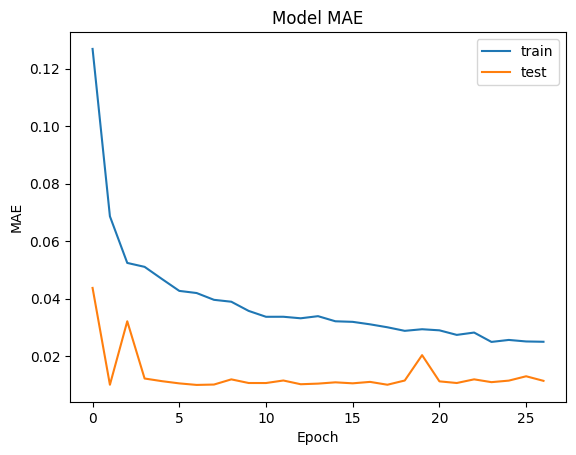

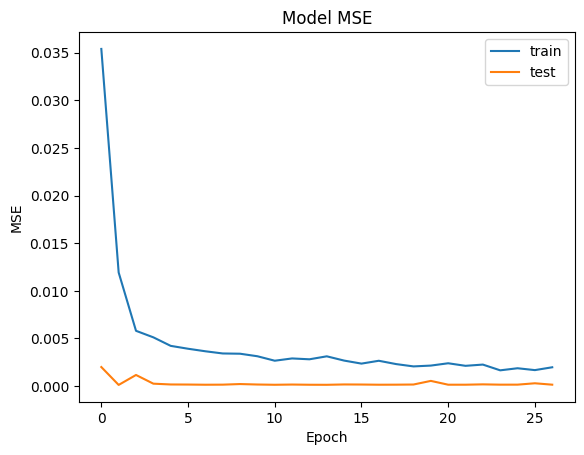

In [ ]:
from tensorflow.keras.layers import GRU, LSTM, Dropout, Dense, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Define the loss function
loss_fn = 'mse'

# Define the model
inputs = Input(shape=(30,1))
gru = GRU(30, activation='relu', return_sequences=False)(inputs)
gru = Dropout(0.25)(gru)
gru = Dense(1, activation='relu')(gru)
lstm = LSTM(30, activation='relu', return_sequences=True)(inputs)
lstm = Dropout(0.25)(lstm)
lstm = LSTM(50, activation='relu')(lstm)
lstm = Dense(1, activation='relu')(lstm)
combined = concatenate([gru, lstm])
outputs = Dense(1)(combined)
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with Adam optimizer and defined loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss=loss_fn, metrics=['mae','mse'])

# Fit the model with train data and validate with test data for 100 epochs
callback=EarlyStopping(min_delta=1e-5,patience=25)
history = model.fit(x_train, y_train, epochs=100, callbacks=[callback], validation_data=(x_test, y_test))

# Plot the MAE and MSE graphs
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmae.pdf')
plt.show()

plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmse.pdf')
plt.show()


1/1 [==============================] - 0s 392ms/step
Unscaled Metrics
MSE :  9.132851994957381
RMSE :  3.0220608853822553
MAE :  2.24225674874442
MAPE :  2.9934795703364814
R2 :  0.14985885047699865
Scaled Metrics
MSE :  7.210259074311401e-05
RMSE :  0.008491324439868848
MAE :  0.006300245308222414
MAPE :  3.1405910798078494
R2 :  0.1498580162372818
y_test_unscaled:
[[73.341]
 [77.173]
 [70.782]
 [69.455]
 [73.291]
 [74.818]
 [79.706]]
y_pred_unscaled:
[[71.79662 ]
 [70.68884 ]
 [70.55443 ]
 [72.73663 ]
 [74.89954 ]
 [74.90065 ]
 [77.239136]]


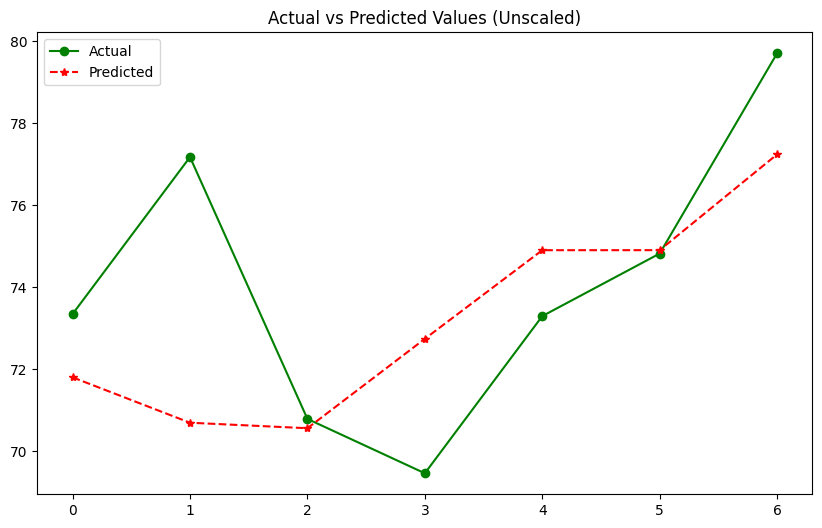

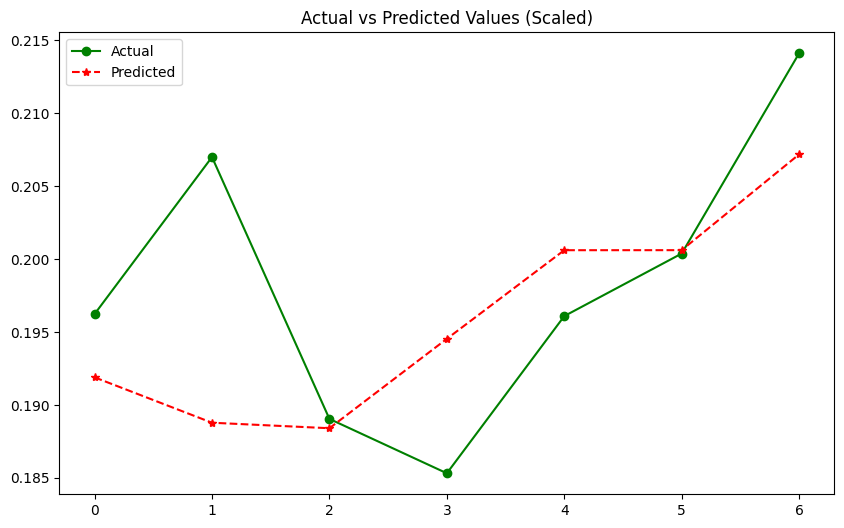

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define and fit the scaler object on the training data
# scaler = MinMaxScaler()
# scaler.fit(x_train)

# Predict on the test data and unscale the predicted and test data
y_pred_scaled = model.predict(x_test)
y_pred_unscaled = scaler.inverse_transform(y_pred_scaled[::-1])
y_test_unscaled = scaler.inverse_transform(y_test)

# Print the evaluation metrics for the unscaled predictions
MAE_unscaled = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
RMSE_unscaled = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
R2_unscaled = r2_score(y_test_unscaled, y_pred_unscaled)
MAPE_unscaled = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100
MSE_unscaled = mean_squared_error(y_test_unscaled, y_pred_unscaled)

print('Unscaled Metrics')
print('MSE : ', MSE_unscaled)
print('RMSE : ', RMSE_unscaled)
print('MAE : ', MAE_unscaled)
print('MAPE : ', MAPE_unscaled)
print('R2 : ', R2_unscaled)

# Print the evaluation metrics for the scaled predictions
y_pred_scaled = y_pred_scaled.flatten()[::-1]
y_test_scaled = y_test.flatten()
MAE_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
RMSE_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
R2_scaled = r2_score(y_test_scaled, y_pred_scaled)
MAPE_scaled = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)) * 100
MSE_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)

print('Scaled Metrics')
print('MSE : ', MSE_scaled)
print('RMSE : ', RMSE_scaled)
print('MAE : ', MAE_scaled)
print('MAPE : ', MAPE_scaled)
print('R2 : ', R2_scaled)

print('y_test_unscaled:')
print(y_test_unscaled)

print('y_pred_unscaled:')
print(y_pred_unscaled)

# Plot the actual vs predicted values for the unscaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, 'go-', label='Actual')
plt.plot(y_pred_unscaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Unscaled)')
plt.legend()
plt.savefig('ActualPredictedValuesUnscaled.pdf')
plt.show()

# Plot the actual vs predicted values for the scaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, 'go-', label='Actual')
plt.plot(y_pred_scaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Scaled)')
plt.legend()
plt.savefig('ActualPredictedValuesScaled.pdf')
plt.show()


### 7-day prediction window (LSTM)

In [ ]:
# Scale the data using MinMaxScaler with range (0,1)
scaler = MinMaxScaler(feature_range=(0,1))
df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

def fun(data, lag):
    """
    A function that takes in data and a lag value and returns two arrays: x and y.
    x is an array of shape (k, lag, n), where k is the number of samples and n is the number of features.
    y is an array of shape (k, 1), where k is the number of samples.
    Each sample in x is a sequence of lag consecutive observations from data, and the corresponding value in y is the next observation.
    """
    k = len(data) - lag
    x = []
    y = []
    for i in range(k):
        x.append(data[i:i+lag])
        y.append(data[i+lag,:1])
    x = np.array(x)
    y = np.array(y)
    return x, y

# Reverse the order of the data array
data = np.array(df.iloc[::-1])

# Set the number of data points to predict
prediction_window = 7

# Set the number of previous data points to use for prediction
lag = 30

# Split the data into train and test sets
test_start_index = len(data) - prediction_window - lag
test = data[test_start_index:]
train = data[:test_start_index]

# Use the function fun to create x_train, y_train, x_test, and y_test arrays
x_train, y_train = fun(train, lag)
x_test, y_test = fun(test, lag)


Epoch 1/100
38/38 [==============================] - 13s 151ms/step - loss: 0.0109 - mae: 0.0586 - mse: 0.0109 - val_loss: 1.2386e-04 - val_mae: 0.0094 - val_mse: 1.2386e-04
Epoch 2/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0016 - mae: 0.0205 - mse: 0.0016 - val_loss: 1.2523e-04 - val_mae: 0.0094 - val_mse: 1.2523e-04
Epoch 3/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0013 - mae: 0.0166 - mse: 0.0013 - val_loss: 3.3131e-04 - val_mae: 0.0161 - val_mse: 3.3131e-04


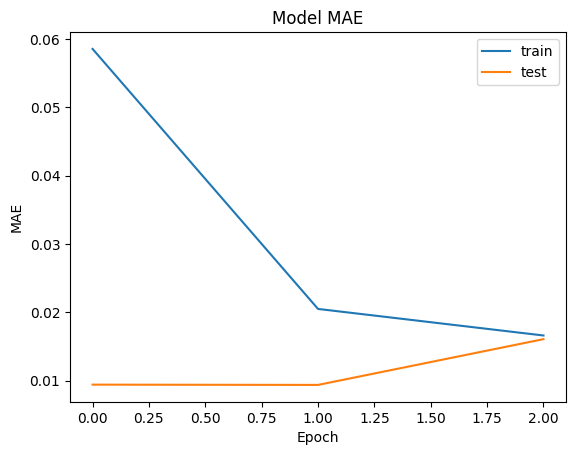

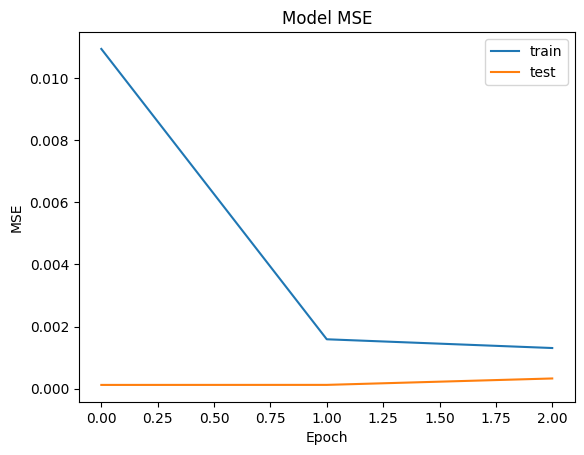

In [ ]:
from tensorflow.keras.layers import GRU, LSTM, Dropout, Dense, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Define the loss function
loss_fn = 'mse'

# Define the model
inputs = Input(shape=(30,1))

# LSTM Network
lstm = LSTM(50, activation='relu')(inputs)
outputs = Dense(1)(lstm)

model = Model(inputs=inputs, outputs=outputs)
# Compile the model with Adam optimizer and defined loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss=loss_fn, metrics=['mae','mse'])

# Fit the model with train data and validate with test data for 100 epochs
callback=EarlyStopping(min_delta=1e-5,patience=2)
history = model.fit(x_train, y_train, epochs=100, callbacks=[callback], validation_data=(x_test, y_test))

# Plot the MAE and MSE graphs
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmae.pdf')
plt.show()

plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmse.pdf')
plt.show()


1/1 [==============================] - 0s 403ms/step
Unscaled Metrics
MSE :  35.58034417988589
RMSE :  5.964926167178089
MAE :  5.092109950474332
MAPE :  7.054673348129628
R2 :  -2.312033822316791
Scaled Metrics
MSE :  0.0002809013389721021
RMSE :  0.0167601115441426
MAE :  0.014307688990480658
MAPE :  7.414639768785601
R2 :  -2.3120310809102684
y_test_unscaled:
[[73.341]
 [77.173]
 [70.782]
 [69.455]
 [73.291]
 [74.818]
 [79.706]]
y_pred_unscaled:
[[77.514435]
 [77.57821 ]
 [77.97194 ]
 [79.25338 ]
 [80.435776]
 [80.36969 ]
 [81.08734 ]]


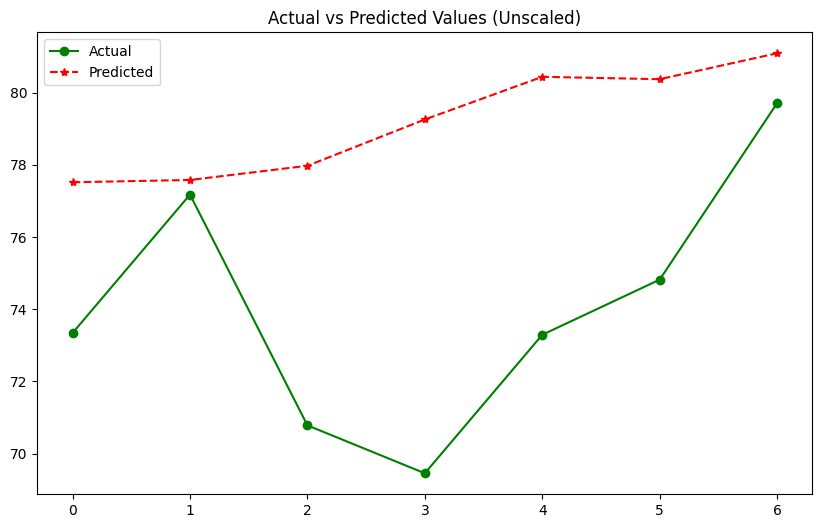

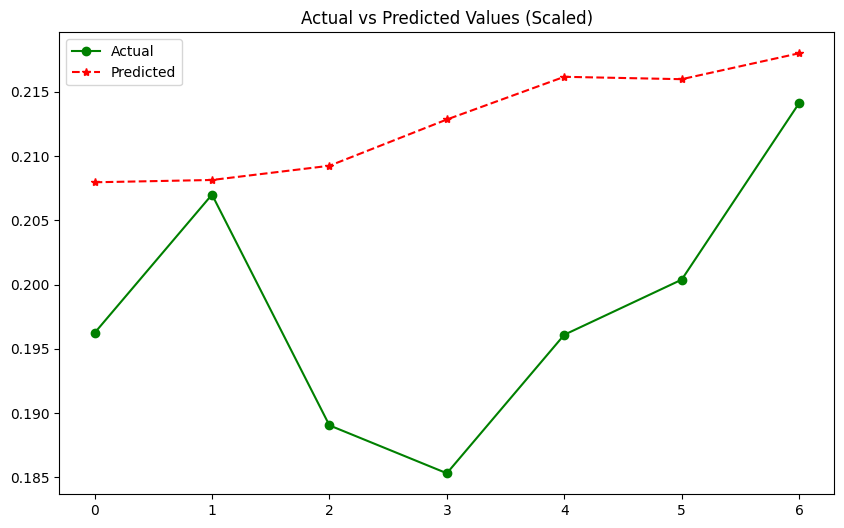

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define and fit the scaler object on the training data
# scaler = MinMaxScaler()
# scaler.fit(x_train)

# Predict on the test data and unscale the predicted and test data
y_pred_scaled = model.predict(x_test)
y_pred_unscaled = scaler.inverse_transform(y_pred_scaled[::-1])
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Print the evaluation metrics for the unscaled predictions
MAE_unscaled = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
RMSE_unscaled = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
R2_unscaled = r2_score(y_test_unscaled, y_pred_unscaled)
MAPE_unscaled = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100
MSE_unscaled = mean_squared_error(y_test_unscaled, y_pred_unscaled)

print('Unscaled Metrics')
print('MSE : ', MSE_unscaled)
print('RMSE : ', RMSE_unscaled)
print('MAE : ', MAE_unscaled)
print('MAPE : ', MAPE_unscaled)
print('R2 : ', R2_unscaled)

# Print the evaluation metrics for the scaled predictions
y_pred_scaled = y_pred_scaled.flatten()[::-1]
y_test_scaled = y_test.flatten()
MAE_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
RMSE_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
R2_scaled = r2_score(y_test_scaled, y_pred_scaled)
MAPE_scaled = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)) * 100
MSE_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)

print('Scaled Metrics')
print('MSE : ', MSE_scaled)
print('RMSE : ', RMSE_scaled)
print('MAE : ', MAE_scaled)
print('MAPE : ', MAPE_scaled)
print('R2 : ', R2_scaled)

print('y_test_unscaled:')
print(y_test_unscaled)

print('y_pred_unscaled:')
print(y_pred_unscaled)

# Plot the actual vs predicted values for the unscaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, 'go-', label='Actual')
plt.plot(y_pred_unscaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Unscaled)')
plt.legend()
plt.savefig('ActualPredictedValuesUnscaled.pdf')
plt.show()

# Plot the actual vs predicted values for the scaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, 'go-', label='Actual')
plt.plot(y_pred_scaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Scaled)')
plt.legend()
plt.savefig('ActualPredictedValuesScaled.pdf')
plt.show()


## Monero

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D , Dropout , Flatten , BatchNormalization,LSTM
from tensorflow.keras.optimizers import SGD,Adam
from sklearn.metrics import confusion_matrix
import pandas as pd 
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard,EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Load the data from the csv file
df = pd.read_csv('/content/Monero.csv')

# Print the first two rows
print('A:')
print(df.head(5))

A:
           Date   Price    Open    High     Low     Vol. Change %
0  Feb 23, 2020  85.329  79.024  85.541  78.818  271.00K    7.97%
1  Feb 22, 2020  79.027  80.308  82.896  78.169  277.07K   -1.60%
2  Feb 21, 2020  80.313  76.355  82.285  75.886  290.15K    5.18%
3  Feb 20, 2020  76.355  77.843  78.903  75.102  384.42K   -1.91%
4  Feb 19, 2020  77.843  86.158  86.914  76.718  304.86K   -9.65%


In [ ]:
df=df[['Price']]
df.shape
df.head()

Price
0  85.329
1  79.027
2  80.313
3  76.355
4  77.843

### 1-day prediction window (Hybrid)

In [ ]:
# Scale the data using MinMaxScaler with range (0,1)
scaler = MinMaxScaler(feature_range=(0,1))
df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

def fun(data, lag):
    """
    A function that takes in data and a lag value and returns two arrays: x and y.
    x is an array of shape (k, lag, n), where k is the number of samples and n is the number of features.
    y is an array of shape (k, 1), where k is the number of samples.
    Each sample in x is a sequence of lag consecutive observations from data, and the corresponding value in y is the next observation.
    """
    k = len(data) - lag
    x = []
    y = []
    for i in range(k):
        x.append(data[i:i+lag])
        y.append(data[i+lag,:1])
    x = np.array(x)
    y = np.array(y)
    return x, y

# Reverse the order of the data array
data = np.array(df.iloc[::-1])

# Set the number of data points to predict
prediction_window = 1

# Set the number of previous data points to use for prediction
lag = 30

# Split the data into train and test sets
test_start_index = len(data) - prediction_window - lag
test = data[test_start_index:]
train = data[:test_start_index]

# Use the function fun to create x_train, y_train, x_test, and y_test arrays
x_train, y_train = fun(train, lag)
x_test, y_test = fun(test, lag)


Epoch 1/100
56/56 [==============================] - 38s 357ms/step - loss: 0.0171 - mae: 0.0785 - mse: 0.0171 - val_loss: 6.0390e-04 - val_mae: 0.0246 - val_mse: 6.0390e-04
Epoch 2/100
56/56 [==============================] - 16s 291ms/step - loss: 0.0022 - mae: 0.0277 - mse: 0.0022 - val_loss: 3.9105e-06 - val_mae: 0.0020 - val_mse: 3.9105e-06
Epoch 3/100
56/56 [==============================] - 18s 315ms/step - loss: 0.0017 - mae: 0.0226 - mse: 0.0017 - val_loss: 5.5510e-05 - val_mae: 0.0075 - val_mse: 5.5510e-05
Epoch 4/100
56/56 [==============================] - 16s 295ms/step - loss: 0.0015 - mae: 0.0215 - mse: 0.0015 - val_loss: 1.1616e-04 - val_mae: 0.0108 - val_mse: 1.1616e-04
Epoch 5/100
56/56 [==============================] - 17s 313ms/step - loss: 0.0014 - mae: 0.0204 - mse: 0.0014 - val_loss: 1.0208e-04 - val_mae: 0.0101 - val_mse: 1.0208e-04
Epoch 6/100
56/56 [==============================] - 18s 325ms/step - loss: 0.0012 - mae: 0.0191 - mse: 0.0012 - val_loss: 4.3106e

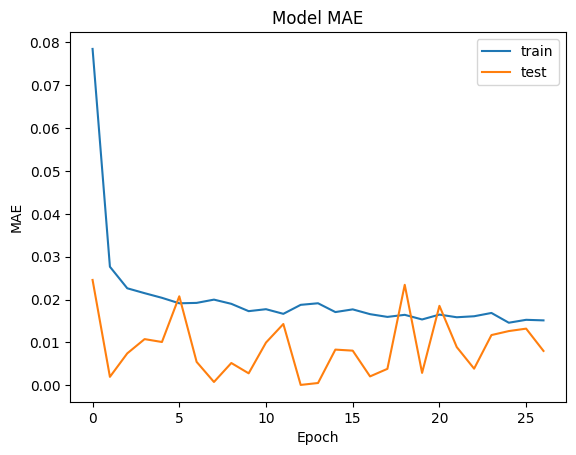

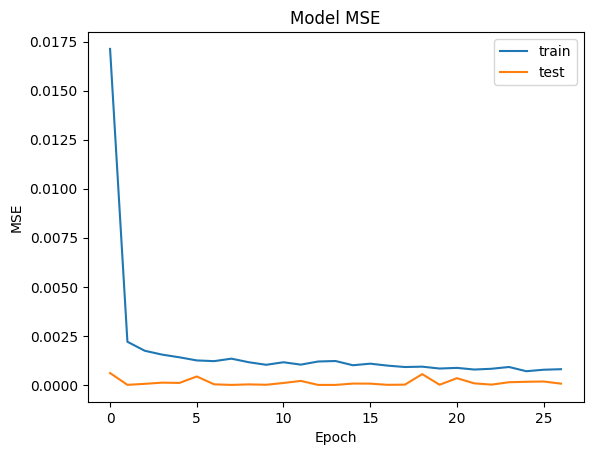

In [ ]:
from tensorflow.keras.layers import GRU, LSTM, Dropout, Dense, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Define the loss function
loss_fn = 'mse'

# Define the model
inputs = Input(shape=(30,1))
gru = GRU(30, activation='relu', return_sequences=False)(inputs)
gru = Dropout(0.25)(gru)
gru = Dense(1, activation='relu')(gru)
lstm = LSTM(30, activation='relu', return_sequences=True)(inputs)
lstm = Dropout(0.25)(lstm)
lstm = LSTM(50, activation='relu')(lstm)
lstm = Dense(1, activation='relu')(lstm)
combined = concatenate([gru, lstm])
outputs = Dense(1)(combined)
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with Adam optimizer and defined loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss=loss_fn, metrics=['mae','mse'])

# Fit the model with train data and validate with test data for 100 epochs
callback=EarlyStopping(min_delta=1e-5,patience=25)
history = model.fit(x_train, y_train, epochs=100, callbacks=[callback], validation_data=(x_test, y_test))

# Plot the MAE and MSE graphs
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmaeM.pdf')
plt.show()

plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmseM.pdf')
plt.show()


1/1 [==============================] - 1s 602ms/step
Unscaled Metrics
MSE :  14.50542633536228
RMSE :  3.808598999023431
MAE :  3.808598999023431
MAPE :  4.4634286104647085
R2 :  nan
Scaled Metrics
MSE :  6.43167083169571e-05
RMSE :  0.008019769841894286
MAE :  0.008019769841894286
MAPE :  4.4686104865486795
R2 :  nan
y_test_unscaled:
[[85.329]]
y_pred_unscaled:
[[81.5204]]


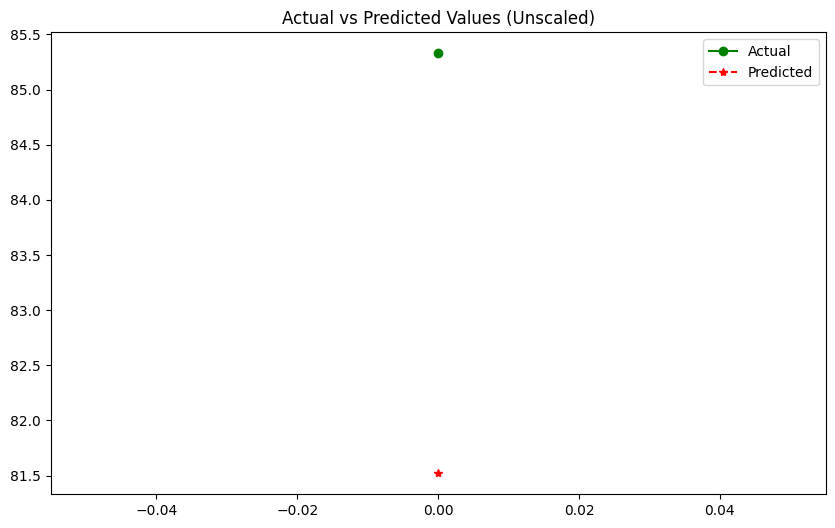

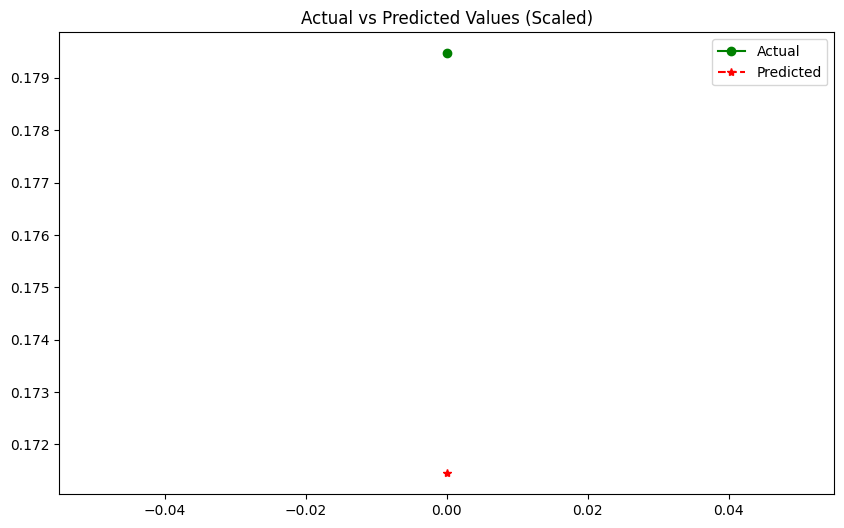

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define and fit the scaler object on the training data
# scaler = MinMaxScaler()
# scaler.fit(x_train)

# Predict on the test data and unscale the predicted and test data
y_pred_scaled = model.predict(x_test)
y_pred_unscaled = scaler.inverse_transform(y_pred_scaled[::-1])
y_test_unscaled = scaler.inverse_transform(y_test)

# Print the evaluation metrics for the unscaled predictions
MAE_unscaled = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
RMSE_unscaled = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
R2_unscaled = r2_score(y_test_unscaled, y_pred_unscaled)
MAPE_unscaled = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100
MSE_unscaled = mean_squared_error(y_test_unscaled, y_pred_unscaled)

print('Unscaled Metrics')
print('MSE : ', MSE_unscaled)
print('RMSE : ', RMSE_unscaled)
print('MAE : ', MAE_unscaled)
print('MAPE : ', MAPE_unscaled)
print('R2 : ', R2_unscaled)

# Print the evaluation metrics for the scaled predictions
y_pred_scaled = y_pred_scaled.flatten()[::-1]
y_test_scaled = y_test.flatten()
MAE_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
RMSE_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
R2_scaled = r2_score(y_test_scaled, y_pred_scaled)
MAPE_scaled = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)) * 100
MSE_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)

print('Scaled Metrics')
print('MSE : ', MSE_scaled)
print('RMSE : ', RMSE_scaled)
print('MAE : ', MAE_scaled)
print('MAPE : ', MAPE_scaled)
print('R2 : ', R2_scaled)

print('y_test_unscaled:')
print(y_test_unscaled)

print('y_pred_unscaled:')
print(y_pred_unscaled)


# Plot the actual vs predicted values for the unscaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, 'go-', label='Actual')
plt.plot(y_pred_unscaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Unscaled)')
plt.legend()
plt.savefig('ActualPredictedValuesUnscaledM.pdf')
plt.show()

# Plot the actual vs predicted values for the scaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, 'go-', label='Actual')
plt.plot(y_pred_scaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Scaled)')
plt.legend()
plt.savefig('ActualPredictedValuesScaledM.pdf')
plt.show()


### 1-day prediction window (LSTM)

In [ ]:
# Scale the data using MinMaxScaler with range (0,1)
scaler = MinMaxScaler(feature_range=(0,1))
df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

def fun(data, lag):
    """
    A function that takes in data and a lag value and returns two arrays: x and y.
    x is an array of shape (k, lag, n), where k is the number of samples and n is the number of features.
    y is an array of shape (k, 1), where k is the number of samples.
    Each sample in x is a sequence of lag consecutive observations from data, and the corresponding value in y is the next observation.
    """
    k = len(data) - lag
    x = []
    y = []
    for i in range(k):
        x.append(data[i:i+lag])
        y.append(data[i+lag,:1])
    x = np.array(x)
    y = np.array(y)
    return x, y

# Reverse the order of the data array
data = np.array(df.iloc[::-1])

# Set the number of data points to predict
prediction_window = 1

# Set the number of previous data points to use for prediction
lag = 30

# Split the data into train and test sets
test_start_index = len(data) - prediction_window - lag
test = data[test_start_index:]
train = data[:test_start_index]

# Use the function fun to create x_train, y_train, x_test, and y_test arrays
x_train, y_train = fun(train, lag)
x_test, y_test = fun(test, lag)


56/56 [==============================] - 15s 142ms/step - loss: 0.0096 - mae: 0.0576 - mse: 0.0096 - val_loss: 0.0010 - val_mae: 0.0318 - val_mse: 0.0010


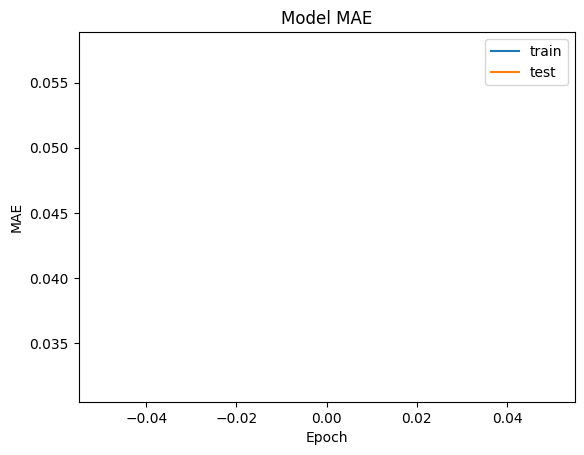

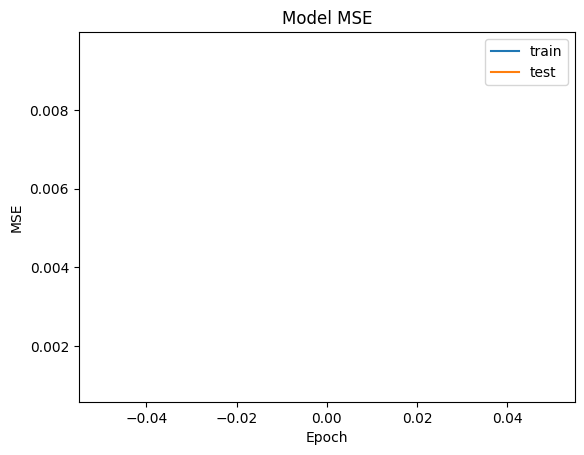

In [ ]:
from tensorflow.keras.layers import GRU, LSTM, Dropout, Dense, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Define the loss function
loss_fn = 'mse'

# Define the model
inputs = Input(shape=(30,1))

# LSTM Network
lstm = LSTM(50, activation='relu')(inputs)
outputs = Dense(1)(lstm)

model = Model(inputs=inputs, outputs=outputs)
# Compile the model with Adam optimizer and defined loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss=loss_fn, metrics=['mae','mse'])

# Fit the model with train data and validate with test data for 100 epochs
callback=EarlyStopping(min_delta=1e-5,patience=2)
history = model.fit(x_train, y_train, epochs=1, callbacks=[callback], validation_data=(x_test, y_test))

# Plot the MAE and MSE graphs
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmaeM.pdf')
plt.show()

plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmseM.pdf')
plt.show()


1/1 [==============================] - 1s 1s/step
Unscaled Metrics
MSE :  227.64322056934552
RMSE :  15.087850097656244
MAE :  15.087850097656244
MAPE :  17.681972245844022
R2 :  nan
Scaled Metrics
MSE :  0.00100936607148911
RMSE :  0.03177052205251135
MAE :  0.03177052205251135
MAPE :  17.702514012976298
R2 :  nan
y_test_unscaled:
[[85.329]]
y_pred_unscaled:
[[70.24115]]


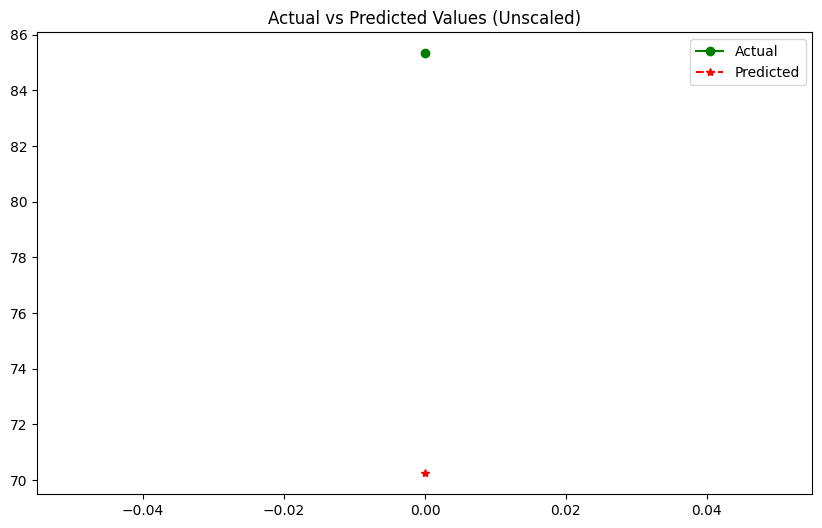

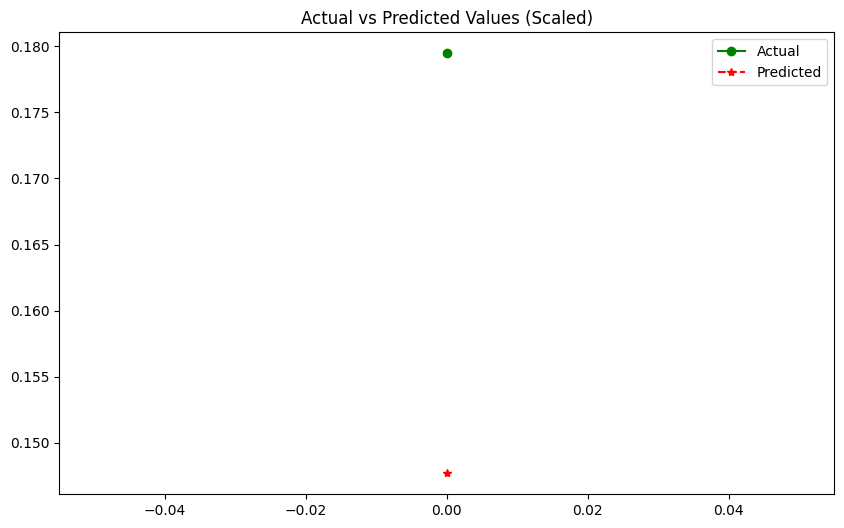

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define and fit the scaler object on the training data
# scaler = MinMaxScaler()
# scaler.fit(x_train)

# Predict on the test data and unscale the predicted and test data
y_pred_scaled = model.predict(x_test)
y_pred_unscaled = scaler.inverse_transform(y_pred_scaled[::-1])
y_test_unscaled = scaler.inverse_transform(y_test)

# Print the evaluation metrics for the unscaled predictions
MAE_unscaled = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
RMSE_unscaled = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
R2_unscaled = r2_score(y_test_unscaled, y_pred_unscaled)
MAPE_unscaled = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100
MSE_unscaled = mean_squared_error(y_test_unscaled, y_pred_unscaled)

print('Unscaled Metrics')
print('MSE : ', MSE_unscaled)
print('RMSE : ', RMSE_unscaled)
print('MAE : ', MAE_unscaled)
print('MAPE : ', MAPE_unscaled)
print('R2 : ', R2_unscaled)

# Print the evaluation metrics for the scaled predictions
y_pred_scaled = y_pred_scaled.flatten()[::-1]
y_test_scaled = y_test.flatten()
MAE_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
RMSE_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
R2_scaled = r2_score(y_test_scaled, y_pred_scaled)
MAPE_scaled = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)) * 100
MSE_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)

print('Scaled Metrics')
print('MSE : ', MSE_scaled)
print('RMSE : ', RMSE_scaled)
print('MAE : ', MAE_scaled)
print('MAPE : ', MAPE_scaled)
print('R2 : ', R2_scaled)

print('y_test_unscaled:')
print(y_test_unscaled)

print('y_pred_unscaled:')
print(y_pred_unscaled)


# Plot the actual vs predicted values for the unscaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, 'go-', label='Actual')
plt.plot(y_pred_unscaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Unscaled)')
plt.legend()
plt.savefig('ActualPredictedValuesUnscaledM.pdf')
plt.show()

# Plot the actual vs predicted values for the scaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, 'go-', label='Actual')
plt.plot(y_pred_scaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Scaled)')
plt.legend()
plt.savefig('ActualPredictedValuesScaledM.pdf')
plt.show()


1/1 [==============================] - 0s 166ms/step
Unscaled Metrics
MSE :  0.11985013789505587
RMSE :  0.34619378662110023
MAE :  0.34619378662110023
MAPE :  0.4057164464848999
R2 :  nan
Scaled Metrics
MSE :  5.314191551218146e-07
RMSE :  0.0007289850170763557
MAE :  0.0007289850170763557
MAPE :  0.4061899725385175
R2 :  nan
y_test_unscaled:
[[85.329]]
y_pred_unscaled:
[[85.67519]]


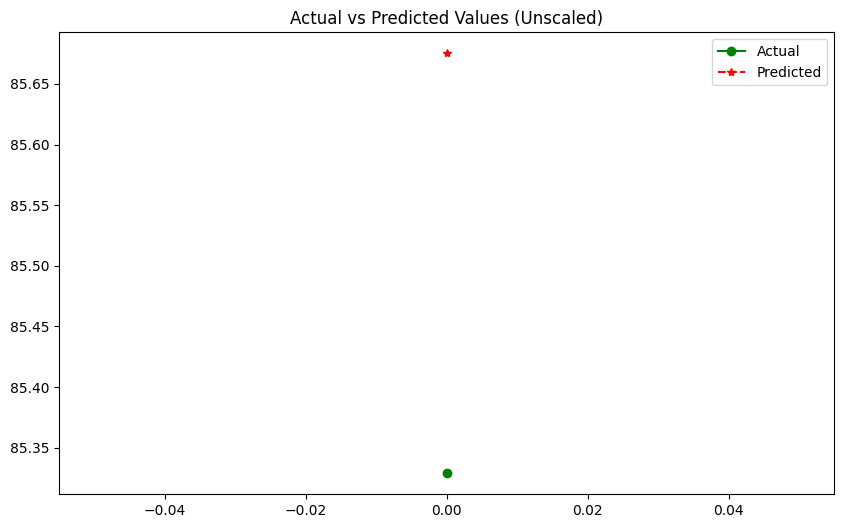

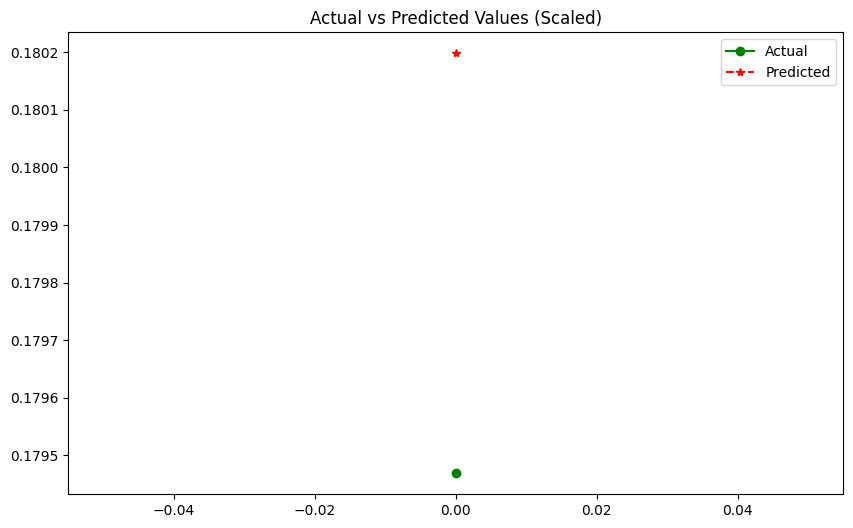

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define and fit the scaler object on the training data
# scaler = MinMaxScaler()
# scaler.fit(x_train)

# Predict on the test data and unscale the predicted and test data
y_pred_scaled = model.predict(x_test)
y_pred_unscaled = scaler.inverse_transform(y_pred_scaled[::-1])
y_test_unscaled = scaler.inverse_transform(y_test)

# Print the evaluation metrics for the unscaled predictions
MAE_unscaled = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
RMSE_unscaled = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
R2_unscaled = r2_score(y_test_unscaled, y_pred_unscaled)
MAPE_unscaled = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100
MSE_unscaled = mean_squared_error(y_test_unscaled, y_pred_unscaled)

print('Unscaled Metrics')
print('MSE : ', MSE_unscaled)
print('RMSE : ', RMSE_unscaled)
print('MAE : ', MAE_unscaled)
print('MAPE : ', MAPE_unscaled)
print('R2 : ', R2_unscaled)

# Print the evaluation metrics for the scaled predictions
y_pred_scaled = y_pred_scaled.flatten()[::-1]
y_test_scaled = y_test.flatten()
MAE_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
RMSE_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
R2_scaled = r2_score(y_test_scaled, y_pred_scaled)
MAPE_scaled = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)) * 100
MSE_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)

print('Scaled Metrics')
print('MSE : ', MSE_scaled)
print('RMSE : ', RMSE_scaled)
print('MAE : ', MAE_scaled)
print('MAPE : ', MAPE_scaled)
print('R2 : ', R2_scaled)

print('y_test_unscaled:')
print(y_test_unscaled)

print('y_pred_unscaled:')
print(y_pred_unscaled)


# Plot the actual vs predicted values for the unscaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, 'go-', label='Actual')
plt.plot(y_pred_unscaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Unscaled)')
plt.legend()
plt.savefig('ActualPredictedValuesUnscaledM.pdf')
plt.show()

# Plot the actual vs predicted values for the scaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, 'go-', label='Actual')
plt.plot(y_pred_scaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Scaled)')
plt.legend()
plt.savefig('ActualPredictedValuesScaledM.pdf')
plt.show()


### 3-day prediction window (Hybrid)

In [ ]:
# Scale the data using MinMaxScaler with range (0,1)
scaler = MinMaxScaler(feature_range=(0,1))
df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

def fun(data, lag):
    """
    A function that takes in data and a lag value and returns two arrays: x and y.
    x is an array of shape (k, lag, n), where k is the number of samples and n is the number of features.
    y is an array of shape (k, 1), where k is the number of samples.
    Each sample in x is a sequence of lag consecutive observations from data, and the corresponding value in y is the next observation.
    """
    k = len(data) - lag
    x = []
    y = []
    for i in range(k):
        x.append(data[i:i+lag])
        y.append(data[i+lag,:1])
    x = np.array(x)
    y = np.array(y)
    return x, y

# Reverse the order of the data array
data = np.array(df.iloc[::-1])

# Set the number of data points to predict
prediction_window = 3

# Set the number of previous data points to use for prediction
lag = 30

# Split the data into train and test sets
test_start_index = len(data) - prediction_window - lag
test = data[test_start_index:]
train = data[:test_start_index]

# Use the function fun to create x_train, y_train, x_test, and y_test arrays
x_train, y_train = fun(train, lag)
x_test, y_test = fun(test, lag)


Epoch 1/100
56/56 [==============================] - 38s 349ms/step - loss: 0.0061 - mae: 0.0477 - mse: 0.0061 - val_loss: 1.0369e-04 - val_mae: 0.0081 - val_mse: 1.0369e-04
Epoch 2/100
56/56 [==============================] - 18s 321ms/step - loss: 0.0015 - mae: 0.0207 - mse: 0.0015 - val_loss: 3.5777e-04 - val_mae: 0.0178 - val_mse: 3.5777e-04
Epoch 3/100
56/56 [==============================] - 16s 294ms/step - loss: 0.0013 - mae: 0.0188 - mse: 0.0013 - val_loss: 4.4838e-05 - val_mae: 0.0065 - val_mse: 4.4838e-05
Epoch 4/100
56/56 [==============================] - 17s 305ms/step - loss: 0.0012 - mae: 0.0178 - mse: 0.0012 - val_loss: 1.5624e-04 - val_mae: 0.0106 - val_mse: 1.5624e-04
Epoch 5/100
56/56 [==============================] - 18s 310ms/step - loss: 8.7523e-04 - mae: 0.0155 - mse: 8.7523e-04 - val_loss: 8.7014e-05 - val_mae: 0.0062 - val_mse: 8.7014e-05
Epoch 6/100
56/56 [==============================] - 11s 196ms/step - loss: 9.0728e-04 - mae: 0.0157 - mse: 9.0728e-04 - v

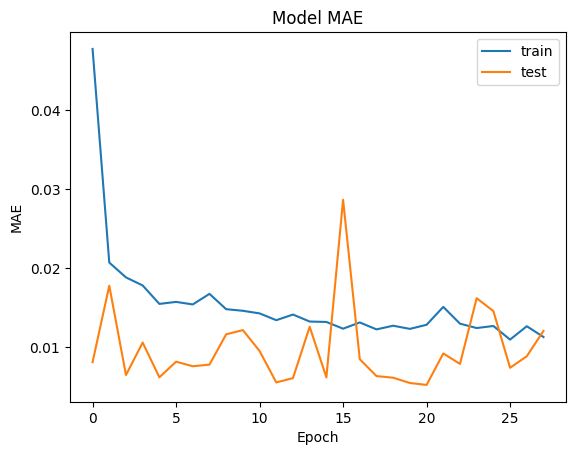

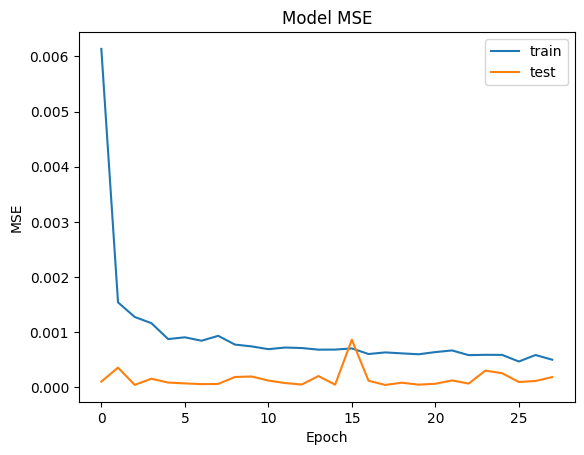

In [ ]:
from tensorflow.keras.layers import GRU, LSTM, Dropout, Dense, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Define the loss function
loss_fn = 'mse'

# Define the model
inputs = Input(shape=(30,1))
gru = GRU(30, activation='relu', return_sequences=False)(inputs)
gru = Dropout(0.25)(gru)
gru = Dense(1, activation='relu')(gru)
lstm = LSTM(30, activation='relu', return_sequences=True)(inputs)
lstm = Dropout(0.25)(lstm)
lstm = LSTM(50, activation='relu')(lstm)
lstm = Dense(1, activation='relu')(lstm)
combined = concatenate([gru, lstm])
outputs = Dense(1)(combined)
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with Adam optimizer and defined loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss=loss_fn, metrics=['mae','mse'])

# Fit the model with train data and validate with test data for 100 epochs
callback=EarlyStopping(min_delta=1e-5,patience=25)
history = model.fit(x_train, y_train, epochs=100, callbacks=[callback], validation_data=(x_test, y_test))

# Plot the MAE and MSE graphs
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmaeM.pdf')
plt.show()

plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmseM.pdf')
plt.show()


1/1 [==============================] - 0s 291ms/step
Unscaled Metrics
MSE :  21.54480317897527
RMSE :  4.64163798448083
MAE :  3.91127225748698
MAPE :  4.9009958143100825
R2 :  -1.9145557949840581
Scaled Metrics
MSE :  9.552920707319254e-05
RMSE :  0.009773904392472464
MAE :  0.008235971313961874
MAPE :  4.907083152928877
R2 :  -1.9145545208293266
y_test_unscaled:
[[80.313]
 [79.027]
 [85.329]]
y_pred_unscaled:
[[85.03579]
 [85.51181]
 [85.85522]]


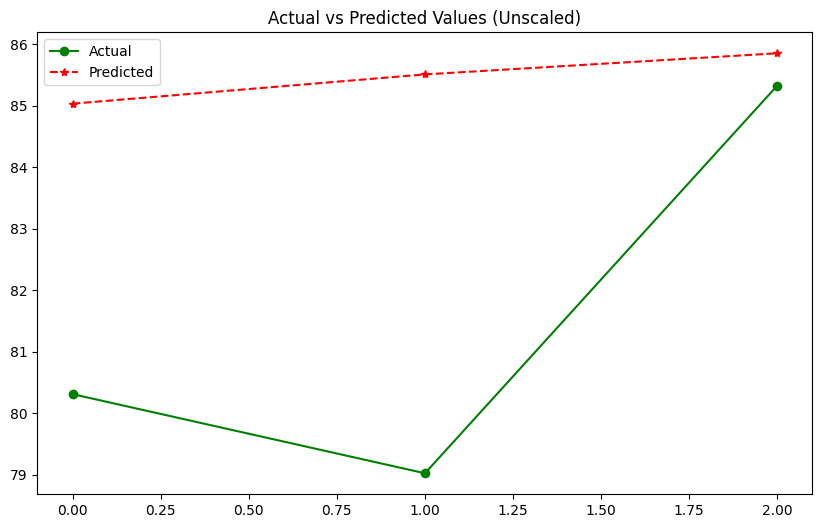

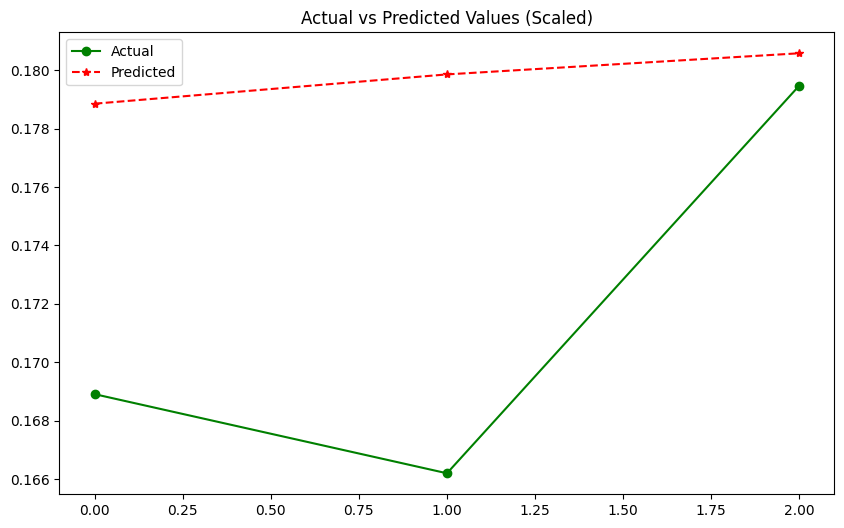

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define and fit the scaler object on the training data
# scaler = MinMaxScaler()
# scaler.fit(x_train)

# Predict on the test data and unscale the predicted and test data
y_pred_scaled = model.predict(x_test)
y_pred_unscaled = scaler.inverse_transform(y_pred_scaled[::-1])
y_test_unscaled = scaler.inverse_transform(y_test)

# Print the evaluation metrics for the unscaled predictions
MAE_unscaled = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
RMSE_unscaled = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
R2_unscaled = r2_score(y_test_unscaled, y_pred_unscaled)
MAPE_unscaled = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100
MSE_unscaled = mean_squared_error(y_test_unscaled, y_pred_unscaled)

print('Unscaled Metrics')
print('MSE : ', MSE_unscaled)
print('RMSE : ', RMSE_unscaled)
print('MAE : ', MAE_unscaled)
print('MAPE : ', MAPE_unscaled)
print('R2 : ', R2_unscaled)

# Print the evaluation metrics for the scaled predictions
y_pred_scaled = y_pred_scaled.flatten()[::-1]
y_test_scaled = y_test.flatten()
MAE_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
RMSE_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
R2_scaled = r2_score(y_test_scaled, y_pred_scaled)
MAPE_scaled = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)) * 100
MSE_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)

print('Scaled Metrics')
print('MSE : ', MSE_scaled)
print('RMSE : ', RMSE_scaled)
print('MAE : ', MAE_scaled)
print('MAPE : ', MAPE_scaled)
print('R2 : ', R2_scaled)

print('y_test_unscaled:')
print(y_test_unscaled)

print('y_pred_unscaled:')
print(y_pred_unscaled)


# Plot the actual vs predicted values for the unscaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, 'go-', label='Actual')
plt.plot(y_pred_unscaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Unscaled)')
plt.legend()
plt.savefig('ActualPredictedValuesUnscaledM.pdf')
plt.show()

# Plot the actual vs predicted values for the scaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, 'go-', label='Actual')
plt.plot(y_pred_scaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Scaled)')
plt.legend()
plt.savefig('ActualPredictedValuesScaledM.pdf')
plt.show()


### 3-day prediction window (LSTM)

In [ ]:
# Scale the data using MinMaxScaler with range (0,1)
scaler = MinMaxScaler(feature_range=(0,1))
df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

def fun(data, lag):
    """
    A function that takes in data and a lag value and returns two arrays: x and y.
    x is an array of shape (k, lag, n), where k is the number of samples and n is the number of features.
    y is an array of shape (k, 1), where k is the number of samples.
    Each sample in x is a sequence of lag consecutive observations from data, and the corresponding value in y is the next observation.
    """
    k = len(data) - lag
    x = []
    y = []
    for i in range(k):
        x.append(data[i:i+lag])
        y.append(data[i+lag,:1])
    x = np.array(x)
    y = np.array(y)
    return x, y

# Reverse the order of the data array
data = np.array(df.iloc[::-1])

# Set the number of data points to predict
prediction_window = 3

# Set the number of previous data points to use for prediction
lag = 30

# Split the data into train and test sets
test_start_index = len(data) - prediction_window - lag
test = data[test_start_index:]
train = data[:test_start_index]

# Use the function fun to create x_train, y_train, x_test, and y_test arrays
x_train, y_train = fun(train, lag)
x_test, y_test = fun(test, lag)


Epoch 1/2
56/56 [==============================] - 20s 141ms/step - loss: 0.0080 - mae: 0.0487 - mse: 0.0080 - val_loss: 8.0259e-05 - val_mae: 0.0066 - val_mse: 8.0259e-05
Epoch 2/2
56/56 [==============================] - 7s 124ms/step - loss: 0.0012 - mae: 0.0167 - mse: 0.0012 - val_loss: 1.0768e-04 - val_mae: 0.0086 - val_mse: 1.0768e-04


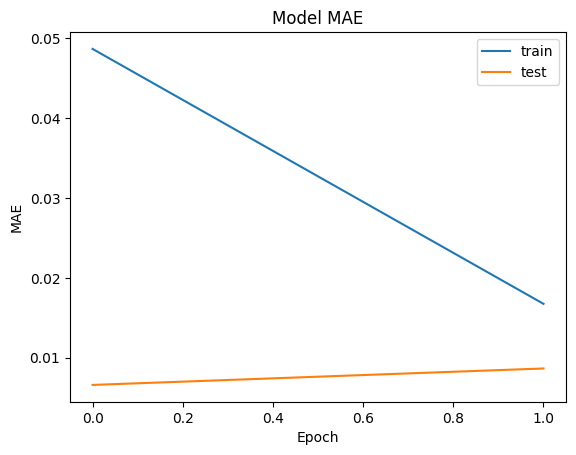

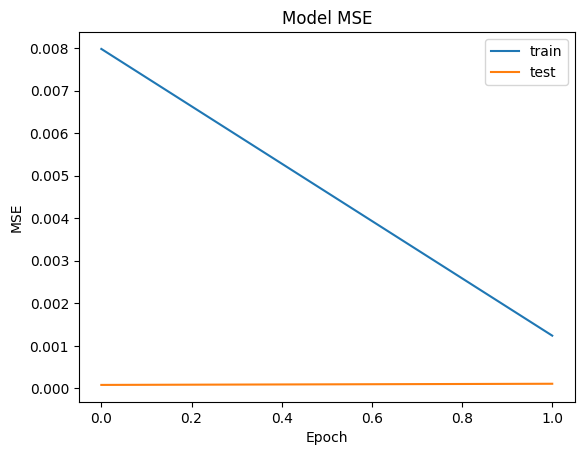

In [ ]:
from tensorflow.keras.layers import GRU, LSTM, Dropout, Dense, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Define the loss function
loss_fn = 'mse'

# Define the model
inputs = Input(shape=(30,1))

# LSTM Network
lstm = LSTM(50, activation='relu')(inputs)
outputs = Dense(1)(lstm)

model = Model(inputs=inputs, outputs=outputs)
# Compile the model with Adam optimizer and defined loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss=loss_fn, metrics=['mae','mse'])

# Fit the model with train data and validate with test data for 100 epochs
callback=EarlyStopping(min_delta=1e-5,patience=20)
history = model.fit(x_train, y_train, epochs=2, callbacks=[callback], validation_data=(x_test, y_test))

# Plot the MAE and MSE graphs
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmaeM.pdf')
plt.show()

plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmseM.pdf')
plt.show()


1/1 [==============================] - 0s 393ms/step
Unscaled Metrics
MSE :  39.56417361641152
RMSE :  6.2900058518582895
MAE :  5.736765970865885
MAPE :  6.93863949915811
R2 :  -4.352195168809714
Scaled Metrics
MSE :  0.0001754268356479028
RMSE :  0.013244879601110114
MAE :  0.01207992416396883
MAPE :  6.946970095999541
R2 :  -4.352196386604963
y_test_unscaled:
[[80.313]
 [79.027]
 [85.329]]
y_pred_unscaled:
[[75.40433]
 [75.95291]
 [76.10146]]


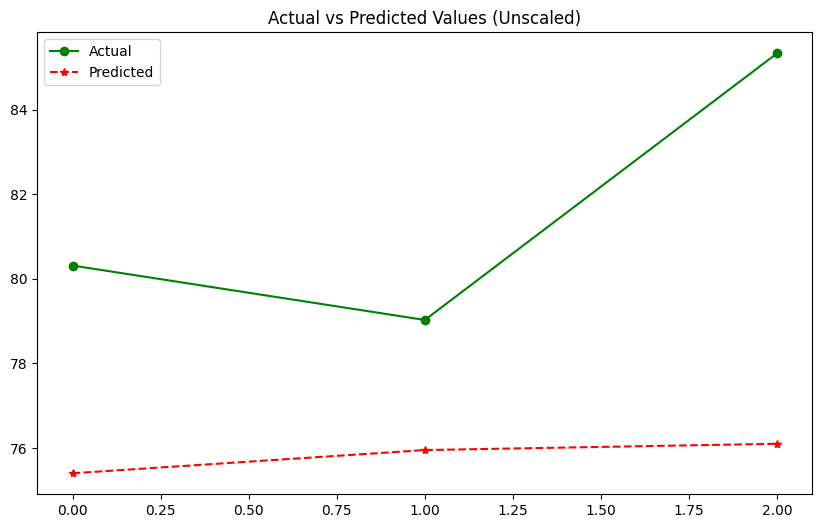

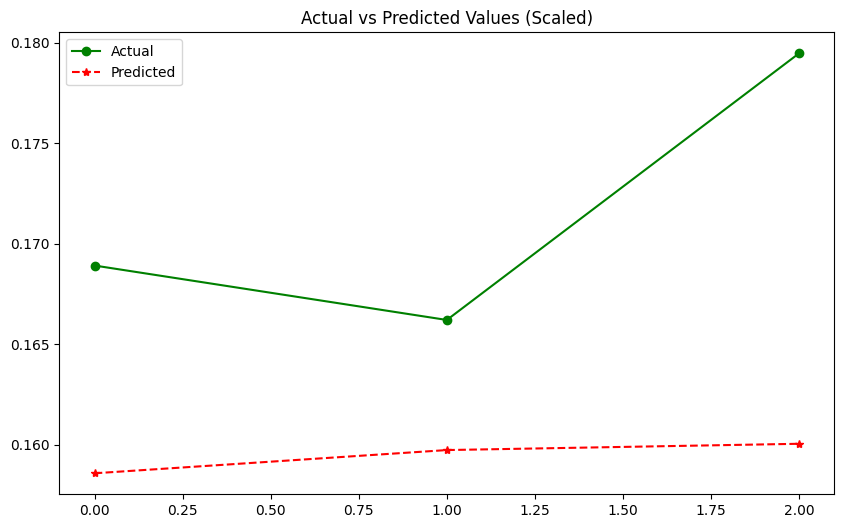

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define and fit the scaler object on the training data
# scaler = MinMaxScaler()
# scaler.fit(x_train)

# Predict on the test data and unscale the predicted and test data
y_pred_scaled = model.predict(x_test)
y_pred_unscaled = scaler.inverse_transform(y_pred_scaled[::-1])
y_test_unscaled = scaler.inverse_transform(y_test)

# Print the evaluation metrics for the unscaled predictions
MAE_unscaled = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
RMSE_unscaled = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
R2_unscaled = r2_score(y_test_unscaled, y_pred_unscaled)
MAPE_unscaled = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100
MSE_unscaled = mean_squared_error(y_test_unscaled, y_pred_unscaled)

print('Unscaled Metrics')
print('MSE : ', MSE_unscaled)
print('RMSE : ', RMSE_unscaled)
print('MAE : ', MAE_unscaled)
print('MAPE : ', MAPE_unscaled)
print('R2 : ', R2_unscaled)

# Print the evaluation metrics for the scaled predictions
y_pred_scaled = y_pred_scaled.flatten()[::-1]
y_test_scaled = y_test.flatten()
MAE_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
RMSE_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
R2_scaled = r2_score(y_test_scaled, y_pred_scaled)
MAPE_scaled = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)) * 100
MSE_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)

print('Scaled Metrics')
print('MSE : ', MSE_scaled)
print('RMSE : ', RMSE_scaled)
print('MAE : ', MAE_scaled)
print('MAPE : ', MAPE_scaled)
print('R2 : ', R2_scaled)

print('y_test_unscaled:')
print(y_test_unscaled)

print('y_pred_unscaled:')
print(y_pred_unscaled)


# Plot the actual vs predicted values for the unscaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, 'go-', label='Actual')
plt.plot(y_pred_unscaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Unscaled)')
plt.legend()
plt.savefig('ActualPredictedValuesUnscaledM.pdf')
plt.show()

# Plot the actual vs predicted values for the scaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, 'go-', label='Actual')
plt.plot(y_pred_scaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Scaled)')
plt.legend()
plt.savefig('ActualPredictedValuesScaledM.pdf')
plt.show()


### 7-day prediction window (Hybrid)

In [ ]:
# Scale the data using MinMaxScaler with range (0,1)
scaler = MinMaxScaler(feature_range=(0,1))
df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

def fun(data, lag):
    """
    A function that takes in data and a lag value and returns two arrays: x and y.
    x is an array of shape (k, lag, n), where k is the number of samples and n is the number of features.
    y is an array of shape (k, 1), where k is the number of samples.
    Each sample in x is a sequence of lag consecutive observations from data, and the corresponding value in y is the next observation.
    """
    k = len(data) - lag
    x = []
    y = []
    for i in range(k):
        x.append(data[i:i+lag])
        y.append(data[i+lag,:1])
    x = np.array(x)
    y = np.array(y)
    return x, y

# Reverse the order of the data array
data = np.array(df.iloc[::-1])

# Set the number of data points to predict
prediction_window = 7

# Set the number of previous data points to use for prediction
lag = 30

# Split the data into train and test sets
test_start_index = len(data) - prediction_window - lag
test = data[test_start_index:]
train = data[:test_start_index]

# Use the function fun to create x_train, y_train, x_test, and y_test arrays
x_train, y_train = fun(train, lag)
x_test, y_test = fun(test, lag)


Epoch 1/100
56/56 [==============================] - 31s 316ms/step - loss: 0.0142 - mae: 0.0736 - mse: 0.0142 - val_loss: 7.7119e-05 - val_mae: 0.0071 - val_mse: 7.7119e-05
Epoch 2/100
56/56 [==============================] - 18s 321ms/step - loss: 0.0018 - mae: 0.0234 - mse: 0.0018 - val_loss: 2.1620e-04 - val_mae: 0.0123 - val_mse: 2.1620e-04
Epoch 3/100
56/56 [==============================] - 17s 307ms/step - loss: 0.0015 - mae: 0.0204 - mse: 0.0015 - val_loss: 7.6226e-05 - val_mae: 0.0076 - val_mse: 7.6226e-05
Epoch 4/100
56/56 [==============================] - 17s 299ms/step - loss: 0.0014 - mae: 0.0198 - mse: 0.0014 - val_loss: 1.2211e-04 - val_mae: 0.0094 - val_mse: 1.2211e-04
Epoch 5/100
56/56 [==============================] - 18s 317ms/step - loss: 0.0012 - mae: 0.0193 - mse: 0.0012 - val_loss: 4.0396e-04 - val_mae: 0.0183 - val_mse: 4.0396e-04
Epoch 6/100
56/56 [==============================] - 11s 201ms/step - loss: 0.0011 - mae: 0.0181 - mse: 0.0011 - val_loss: 9.4507e

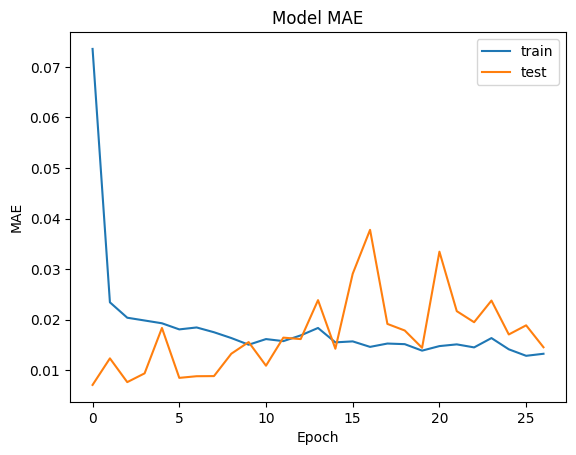

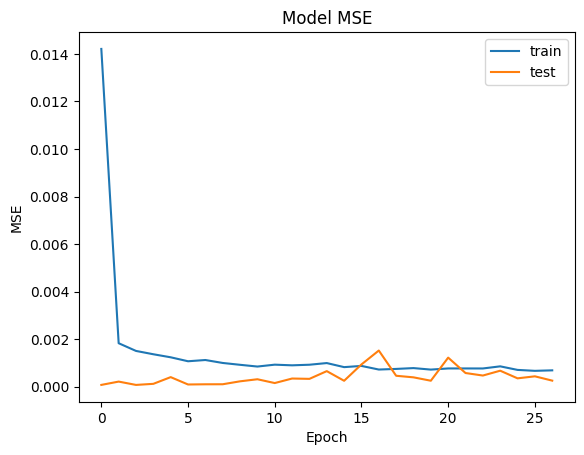

In [ ]:
from tensorflow.keras.layers import GRU, LSTM, Dropout, Dense, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Define the loss function
loss_fn = 'mse'

# Define the model
inputs = Input(shape=(30,1))
gru = GRU(30, activation='relu', return_sequences=False)(inputs)
gru = Dropout(0.1)(gru)
gru = Dense(1, activation='relu')(gru)
lstm = LSTM(30, activation='relu', return_sequences=True)(inputs)
lstm = Dropout(0.1)(lstm)
lstm = LSTM(50, activation='relu')(lstm)
lstm = Dense(1, activation='relu')(lstm)
combined = concatenate([gru, lstm])
outputs = Dense(1)(combined)
model = Model(inputs=inputs, outputs=outputs)

# # LSTM Network
# lstm = LSTM(50, activation='relu')(inputs)
# outputs = Dense(1)(lstm)

# Compile the model with Adam optimizer and defined loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss=loss_fn, metrics=['mae','mse'])

# Fit the model with train data and validate with test data for 100 epochs
callback=EarlyStopping(min_delta=1e-5,patience=26)
history = model.fit(x_train, y_train, epochs=100, callbacks=[callback], validation_data=(x_test, y_test))

# Plot the MAE and MSE graphs
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmaeM.pdf')
plt.show()

plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmseM.pdf')
plt.show()


1/1 [==============================] - 0s 269ms/step
Unscaled Metrics
MSE :  57.08885817946891
RMSE :  7.555716920284197
MAE :  6.5983069981166285
MAPE :  8.33985978031392
R2 :  -3.7903793430277792
Scaled Metrics
MSE :  0.00025313086665592856
RMSE :  0.015910086946837487
MAE :  0.013894064646471162
MAPE :  8.350317215139684
R2 :  -3.7903784311426447
y_test_unscaled:
[[82.489]
 [86.157]
 [77.843]
 [76.355]
 [80.313]
 [79.027]
 [85.329]]
y_pred_unscaled:
[[86.34471]
 [86.75828]
 [87.0748 ]
 [87.81373]
 [88.52541]
 [88.45276]
 [88.73146]]


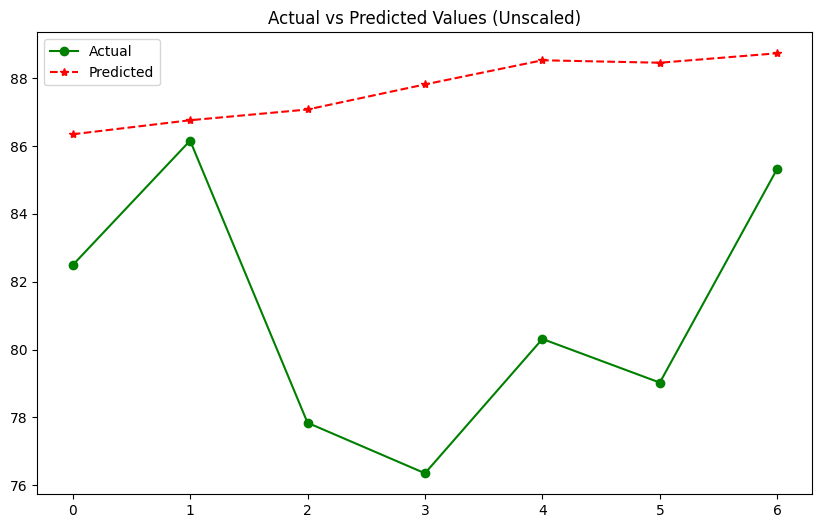

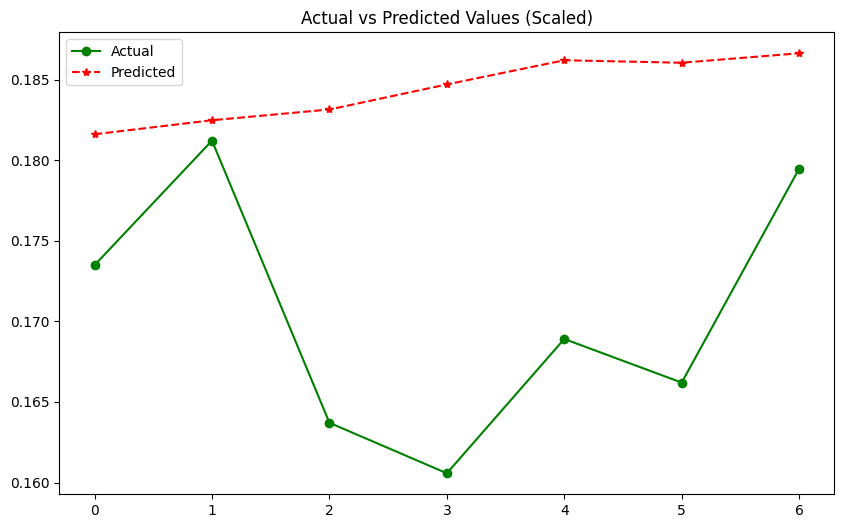

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define and fit the scaler object on the training data
# scaler = MinMaxScaler()
# scaler.fit(x_train)

# Predict on the test data and unscale the predicted and test data
y_pred_scaled = model.predict(x_test)
y_pred_unscaled = scaler.inverse_transform(y_pred_scaled[::-1])
y_test_unscaled = scaler.inverse_transform(y_test)

# Print the evaluation metrics for the unscaled predictions
MAE_unscaled = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
RMSE_unscaled = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
R2_unscaled = r2_score(y_test_unscaled, y_pred_unscaled)
MAPE_unscaled = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100
MSE_unscaled = mean_squared_error(y_test_unscaled, y_pred_unscaled)

print('Unscaled Metrics')
print('MSE : ', MSE_unscaled)
print('RMSE : ', RMSE_unscaled)
print('MAE : ', MAE_unscaled)
print('MAPE : ', MAPE_unscaled)
print('R2 : ', R2_unscaled)

# Print the evaluation metrics for the scaled predictions
y_pred_scaled = y_pred_scaled.flatten()[::-1]
y_test_scaled = y_test.flatten()
MAE_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
RMSE_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
R2_scaled = r2_score(y_test_scaled, y_pred_scaled)
MAPE_scaled = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)) * 100
MSE_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)

print('Scaled Metrics')
print('MSE : ', MSE_scaled)
print('RMSE : ', RMSE_scaled)
print('MAE : ', MAE_scaled)
print('MAPE : ', MAPE_scaled)
print('R2 : ', R2_scaled)

print('y_test_unscaled:')
print(y_test_unscaled)

print('y_pred_unscaled:')
print(y_pred_unscaled)


# Plot the actual vs predicted values for the unscaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, 'go-', label='Actual')
plt.plot(y_pred_unscaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Unscaled)')
plt.legend()
plt.savefig('ActualPredictedValuesUnscaledM.pdf')
plt.show()

# Plot the actual vs predicted values for the scaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, 'go-', label='Actual')
plt.plot(y_pred_scaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Scaled)')
plt.legend()
plt.savefig('ActualPredictedValuesScaledM.pdf')
plt.show()


### 7-day prediction window (LSTM)

In [ ]:
# Scale the data using MinMaxScaler with range (0,1)
scaler = MinMaxScaler(feature_range=(0,1))
df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

def fun(data, lag):
    """
    A function that takes in data and a lag value and returns two arrays: x and y.
    x is an array of shape (k, lag, n), where k is the number of samples and n is the number of features.
    y is an array of shape (k, 1), where k is the number of samples.
    Each sample in x is a sequence of lag consecutive observations from data, and the corresponding value in y is the next observation.
    """
    k = len(data) - lag
    x = []
    y = []
    for i in range(k):
        x.append(data[i:i+lag])
        y.append(data[i+lag,:1])
    x = np.array(x)
    y = np.array(y)
    return x, y

# Reverse the order of the data array
data = np.array(df.iloc[::-1])

# Set the number of data points to predict
prediction_window = 7

# Set the number of previous data points to use for prediction
lag = 30

# Split the data into train and test sets
test_start_index = len(data) - prediction_window - lag
test = data[test_start_index:]
train = data[:test_start_index]

# Use the function fun to create x_train, y_train, x_test, and y_test arrays
x_train, y_train = fun(train, lag)
x_test, y_test = fun(test, lag)


56/56 [==============================] - 14s 100ms/step - loss: 0.0277 - mae: 0.1004 - mse: 0.0277 - val_loss: 2.5095e-04 - val_mae: 0.0139 - val_mse: 2.5095e-04


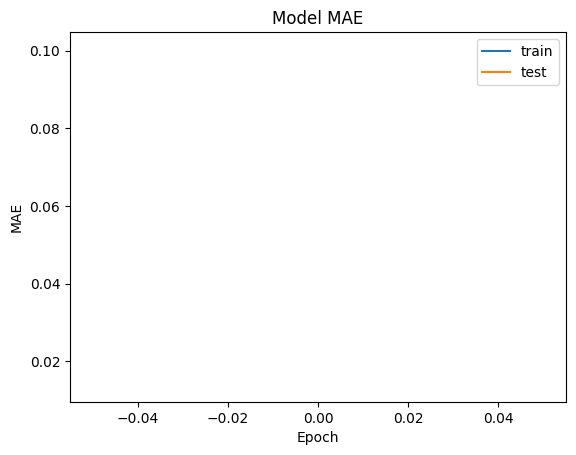

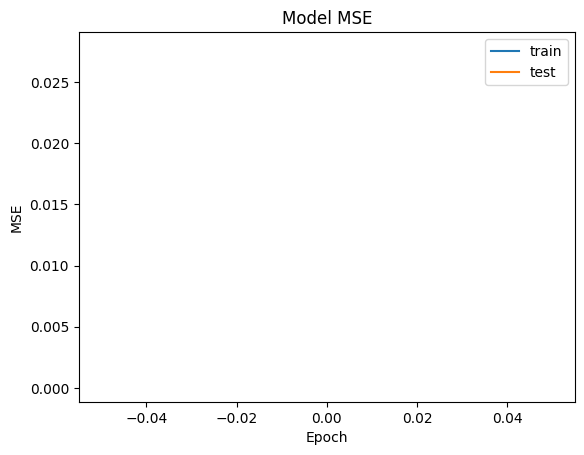

In [ ]:
from tensorflow.keras.layers import GRU, LSTM, Dropout, Dense, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Define the loss function
loss_fn = 'mse'

# Define the model
inputs = Input(shape=(30,1))

# LSTM Network
lstm = LSTM(50, activation='relu')(inputs)
outputs = Dense(1)(lstm)

model = Model(inputs=inputs, outputs=outputs)
# Compile the model with Adam optimizer and defined loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss=loss_fn, metrics=['mae','mse'])

# Fit the model with train data and validate with test data for 100 epochs
callback=EarlyStopping(min_delta=1e-5,patience=20)
history = model.fit(x_train, y_train, epochs=1, callbacks=[callback], validation_data=(x_test, y_test))

# Plot the MAE and MSE graphs
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmaeM.pdf')
plt.show()

plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmseM.pdf')
plt.show()


1/1 [==============================] - 0s 392ms/step
Unscaled Metrics
MSE :  62.0430516327682
RMSE :  7.876741181019483
MAE :  7.1245227137974325
MAPE :  8.926499658949929
R2 :  -4.206090337026664
Scaled Metrics
MSE :  0.00027509760165492084
RMSE :  0.016586066491333044
MAE :  0.015002119291299179
MAPE :  8.937601041414682
R2 :  -4.2060881979204465
y_test_unscaled:
[[82.489]
 [86.157]
 [77.843]
 [76.355]
 [80.313]
 [79.027]
 [85.329]]
y_pred_unscaled:
[[80.71267 ]
 [82.525604]
 [84.65206 ]
 [87.26429 ]
 [89.40072 ]
 [90.51077 ]
 [91.50309 ]]


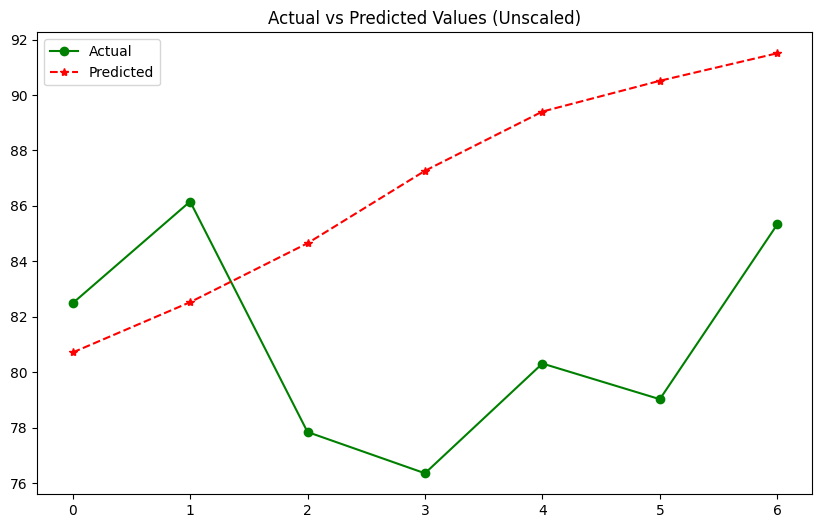

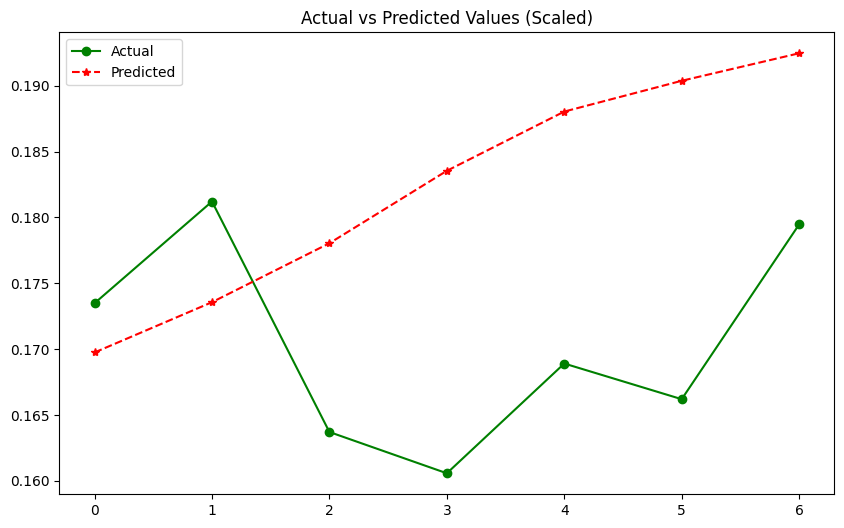

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define and fit the scaler object on the training data
# scaler = MinMaxScaler()
# scaler.fit(x_train)

# Predict on the test data and unscale the predicted and test data
y_pred_scaled = model.predict(x_test)
y_pred_unscaled = scaler.inverse_transform(y_pred_scaled[::-1])
y_test_unscaled = scaler.inverse_transform(y_test)

# Print the evaluation metrics for the unscaled predictions
MAE_unscaled = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
RMSE_unscaled = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
R2_unscaled = r2_score(y_test_unscaled, y_pred_unscaled)
MAPE_unscaled = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100
MSE_unscaled = mean_squared_error(y_test_unscaled, y_pred_unscaled)

print('Unscaled Metrics')
print('MSE : ', MSE_unscaled)
print('RMSE : ', RMSE_unscaled)
print('MAE : ', MAE_unscaled)
print('MAPE : ', MAPE_unscaled)
print('R2 : ', R2_unscaled)

# Print the evaluation metrics for the scaled predictions
y_pred_scaled = y_pred_scaled.flatten()[::-1]
y_test_scaled = y_test.flatten()
MAE_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
RMSE_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
R2_scaled = r2_score(y_test_scaled, y_pred_scaled)
MAPE_scaled = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)) * 100
MSE_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)

print('Scaled Metrics')
print('MSE : ', MSE_scaled)
print('RMSE : ', RMSE_scaled)
print('MAE : ', MAE_scaled)
print('MAPE : ', MAPE_scaled)
print('R2 : ', R2_scaled)

print('y_test_unscaled:')
print(y_test_unscaled)

print('y_pred_unscaled:')
print(y_pred_unscaled)


# Plot the actual vs predicted values for the unscaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, 'go-', label='Actual')
plt.plot(y_pred_unscaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Unscaled)')
plt.legend()
plt.savefig('ActualPredictedValuesUnscaledM.pdf')
plt.show()

# Plot the actual vs predicted values for the scaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, 'go-', label='Actual')
plt.plot(y_pred_scaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Scaled)')
plt.legend()
plt.savefig('ActualPredictedValuesScaledM.pdf')
plt.show()


# Other (Draft and Wrong!)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D , Dropout , Flatten , BatchNormalization,LSTM
from tensorflow.keras.optimizers import SGD,Adam
from sklearn.metrics import confusion_matrix
import pandas as pd 
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard,EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Load the data from the csv file
df = pd.read_csv('/content/Monero.csv')

# Print the first two rows
print('A:')
print(df.head(5))

# def convert_vol(vol):
#     if vol.endswith('M'):
#         return int(float(vol[:-1]) * 1000000)
#     elif vol.endswith('K'):
#         return int(float(vol[:-1]) * 1000)
#     else:
#         return int(vol)

# df['Vol.'] = df['Vol.'].apply(convert_vol)
# df['Change %'] = df['Change %'].str.replace('%', '').astype(float)
# print('B:')
# print(df.head(5))

A:
           Date   Price    Open    High     Low     Vol. Change %
0  Feb 23, 2020  85.329  79.024  85.541  78.818  271.00K    7.97%
1  Feb 22, 2020  79.027  80.308  82.896  78.169  277.07K   -1.60%
2  Feb 21, 2020  80.313  76.355  82.285  75.886  290.15K    5.18%
3  Feb 20, 2020  76.355  77.843  78.903  75.102  384.42K   -1.91%
4  Feb 19, 2020  77.843  86.158  86.914  76.718  304.86K   -9.65%


In [ ]:
df=df[['Price']]
df.shape
df.head()

Price
0  85.329
1  79.027
2  80.313
3  76.355
4  77.843

In [ ]:
# Scale the data using MinMaxScaler with range (0,1)
scaler = MinMaxScaler(feature_range=(0,1))
df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

def fun(data, lag):
    """
    A function that takes in data and a lag value and returns two arrays: x and y.
    x is an array of shape (k, lag, n), where k is the number of samples and n is the number of features.
    y is an array of shape (k, 1), where k is the number of samples.
    Each sample in x is a sequence of lag consecutive observations from data, and the corresponding value in y is the next observation.
    """
    k = len(data) - lag
    x = []
    y = []
    for i in range(k):
        x.append(data[i:i+lag])
        y.append(data[i+lag,:1])
    x = np.array(x)
    y = np.array(y)
    return x, y

# Reverse the order of the data array
data = np.array(df.iloc[::-1])

# Split the data into train and test sets
test = data[-37:]
train = data[:-36]

# Set the lag value
lag = 30

# Use the function fun to create x_train, y_train, x_test, and y_test arrays
x_train, y_train = fun(train, lag)
x_test, y_test = fun(test, lag)


In [ ]:
# print x_test and y_test data
print("x_test data:\n", x_test)
print("y_test data:\n", y_test)

# print x_test and y_test shape
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_test data:
 [[[59.29 ]
  [57.681]
  [57.2  ]
  [57.597]
  [58.309]
  [54.484]
  [54.39 ]
  [53.272]
  [56.255]
  [58.574]
  [60.549]
  [59.817]
  [67.969]
  [68.044]
  [70.751]
  [69.953]
  [69.705]
  [68.063]
  [72.563]
  [73.594]
  [74.338]
  [76.613]
  [77.023]
  [74.1  ]
  [76.524]
  [81.19 ]
  [80.601]
  [82.965]
  [76.741]
  [74.866]]

 [[57.681]
  [57.2  ]
  [57.597]
  [58.309]
  [54.484]
  [54.39 ]
  [53.272]
  [56.255]
  [58.574]
  [60.549]
  [59.817]
  [67.969]
  [68.044]
  [70.751]
  [69.953]
  [69.705]
  [68.063]
  [72.563]
  [73.594]
  [74.338]
  [76.613]
  [77.023]
  [74.1  ]
  [76.524]
  [81.19 ]
  [80.601]
  [82.965]
  [76.741]
  [74.866]
  [73.341]]

 [[57.2  ]
  [57.597]
  [58.309]
  [54.484]
  [54.39 ]
  [53.272]
  [56.255]
  [58.574]
  [60.549]
  [59.817]
  [67.969]
  [68.044]
  [70.751]
  [69.953]
  [69.705]
  [68.063]
  [72.563]
  [73.594]
  [74.338]
  [76.613]
  [77.023]
  [74.1  ]
  [76.524]
  [81.19 ]
  [80.601]
  [82.965]
  [76.741]
  [74.866]
  [73.341]
  [

In [ ]:
from tensorflow.keras.layers import GRU, LSTM, Dropout, Dense, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Define the loss function
loss_fn = 'mse'

# Define the model
inputs = Input(shape=(30,1))
gru = GRU(30, activation='relu', return_sequences=False)(inputs)
gru = Dropout(0.1)(gru)
gru = Dense(1, activation='relu')(gru)
lstm = LSTM(30, activation='relu', return_sequences=True)(inputs)
lstm = Dropout(0.1)(lstm)
lstm = LSTM(50, activation='relu')(lstm)
lstm = Dense(1, activation='relu')(lstm)
combined = concatenate([gru, lstm])
outputs = Dense(1)(combined)
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with Adam optimizer and defined loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss=loss_fn, metrics=['mae','mse'])

# Fit the model with train data and validate with test data for 100 epochs
callback=EarlyStopping(min_delta=1e-5,patience=5)
history = model.fit(x_train, y_train, epochs=100, callbacks=[callback], validation_data=(x_test, y_test))

Epoch 1/100
56/56 [==============================] - 17s 191ms/step - loss: 0.0420 - mae: 0.1264 - mse: 0.0420 - val_loss: 0.0142 - val_mae: 0.1188 - val_mse: 0.0142
Epoch 2/100
56/56 [==============================] - 11s 189ms/step - loss: 0.0340 - mae: 0.1197 - mse: 0.0340 - val_loss: 0.0065 - val_mae: 0.0803 - val_mse: 0.0065
Epoch 3/100
56/56 [==============================] - 11s 188ms/step - loss: 0.0310 - mae: 0.1186 - mse: 0.0310 - val_loss: 0.0032 - val_mae: 0.0562 - val_mse: 0.0032
Epoch 4/100
56/56 [==============================] - 9s 166ms/step - loss: 0.0301 - mae: 0.1216 - mse: 0.0301 - val_loss: 0.0020 - val_mae: 0.0441 - val_mse: 0.0020
Epoch 5/100
56/56 [==============================] - 11s 203ms/step - loss: 0.0300 - mae: 0.1236 - mse: 0.0300 - val_loss: 0.0015 - val_mae: 0.0379 - val_mse: 0.0015
Epoch 6/100
56/56 [==============================] - 11s 189ms/step - loss: 0.0299 - mae: 0.1247 - mse: 0.0299 - val_loss: 0.0013 - val_mae: 0.0354 - val_mse: 0.0013
Epoch

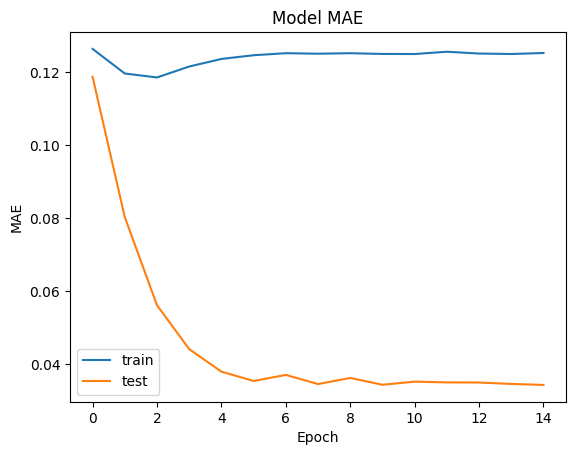

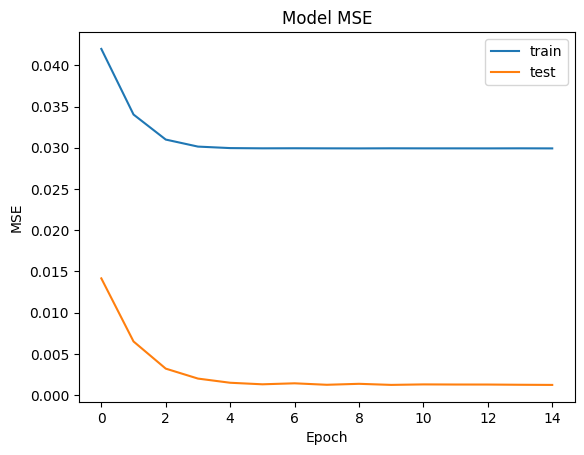

In [ ]:
# Plot the MAE and MSE graphs
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmae.pdf')
plt.show()

plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmse.pdf')
plt.show()


1/1 [==============================] - 0s 31ms/step


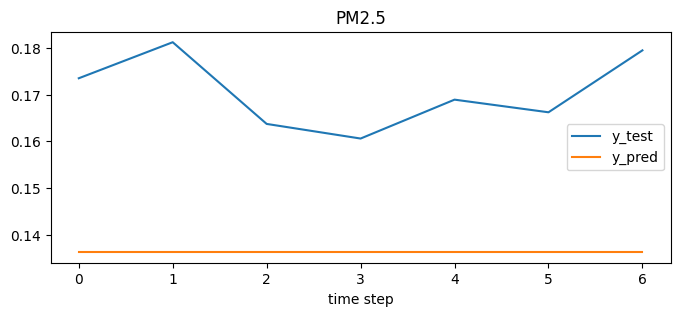

In [ ]:
y_pred=model.predict(x_test)
fig = plt.figure(figsize=(8,3))
plt.plot(y_test[:7,0], label='y_test')
plt.plot(y_pred[:7,0], label='y_pred')
plt.xlabel("time step")
plt.title('PM2.5')
plt.legend()

1/1 [==============================] - 0s 395ms/step
Unscaled Metrics
MAE :  16.287458077566964
RMSE :  16.649284934572503
R2 :  -22.260000554285806
MAPE :  19.945847803130512
MSE :  277.19868883258295
Scaled Metrics
MAE :  0.034296531201748574
RMSE :  0.03505843080019253
R2 :  -22.259997511131758
MAPE :  19.970101205941063
MSE :  0.0012290935701718883


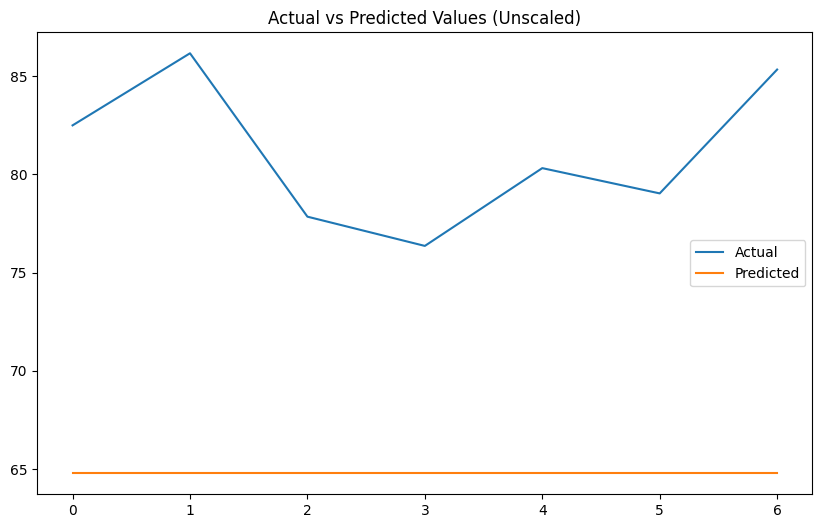

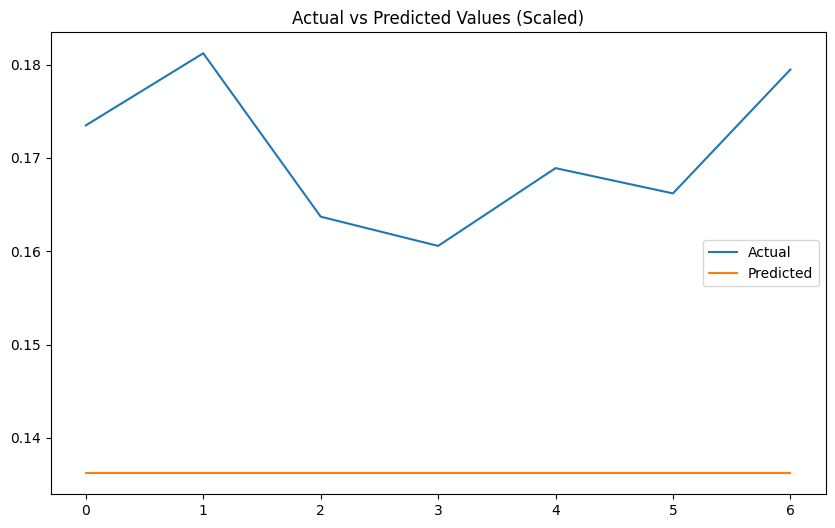

y_test_unscaled: [[82.489]
 [86.157]
 [77.843]
 [76.355]
 [80.313]
 [79.027]
 [85.329]]
y_pred_unscaled: [[64.78583]
 [64.78583]
 [64.78583]
 [64.78583]
 [64.78583]
 [64.78583]
 [64.78583]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define and fit the scaler object on the training data
# scaler = MinMaxScaler()
# scaler.fit(x_train)

# Predict on the test data and unscale the predicted and test data
y_pred_scaled = model.predict(x_test)
y_pred_unscaled = scaler.inverse_transform(y_pred_scaled[::-1])
y_test_unscaled = scaler.inverse_transform(y_test)

# Print the evaluation metrics for the unscaled predictions
MAE_unscaled = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
RMSE_unscaled = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
R2_unscaled = r2_score(y_test_unscaled, y_pred_unscaled)
MAPE_unscaled = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100
MSE_unscaled = mean_squared_error(y_test_unscaled, y_pred_unscaled)

print('Unscaled Metrics')
print('MAE : ', MAE_unscaled)
print('RMSE : ', RMSE_unscaled)
print('R2 : ', R2_unscaled)
print('MAPE : ', MAPE_unscaled)
print('MSE : ', MSE_unscaled)

# Print the evaluation metrics for the scaled predictions
y_pred_scaled = y_pred_scaled.flatten()[::-1]
y_test_scaled = y_test.flatten()
MAE_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
RMSE_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
R2_scaled = r2_score(y_test_scaled, y_pred_scaled)
MAPE_scaled = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)) * 100
MSE_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)

print('Scaled Metrics')
print('MAE : ', MAE_scaled)
print('RMSE : ', RMSE_scaled)
print('R2 : ', R2_scaled)
print('MAPE : ', MAPE_scaled)
print('MSE : ', MSE_scaled)

# Plot the actual vs predicted values for the unscaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, label='Actual')
plt.plot(y_pred_unscaled, label='Predicted')
plt.title('Actual vs Predicted Values (Unscaled)')
plt.legend()
plt.show()

# Plot the actual vs predicted values for the scaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, label='Actual')
plt.plot(y_pred_scaled, label='Predicted')
plt.title('Actual vs Predicted Values (Scaled)')
plt.legend()
plt.show()

print('y_test_unscaled:', y_test_unscaled)
print('y_pred_unscaled:', y_pred_unscaled)



In [ ]:
y_test_unscaled

array([[73.291],
       [74.818],
       [79.706]])

In [ ]:
y_pred_unscaled

array([[77.04522],
       [76.24871],
       [76.06851]], dtype=float32)

In [ ]:
y_pred=model.predict(x_test)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
R2 = r2_score(y_test,y_pred)
print('MAE : ',MAE)
print('RMSE : ',RMSE)
print('R2 : ',R2)

SyntaxError: ignored

In [ ]:
y_pred_unscaled

array([[0.21465631],
       [0.21204396],
       [0.21018924]], dtype=float32)

In [ ]:
y_test_unscaled

array([0.19609722, 0.20038775, 0.21412194])

1/1 [==============================] - 0s 39ms/step


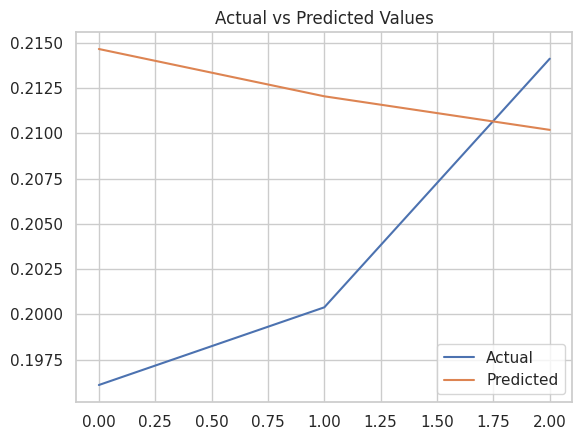

MAE :  0.011382667567886936
RMSE :  0.012855260268980304
R2 :  -1.7960942025872306
MAPE :  5.705907194226421
MSE :  0.00016525771658322357


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define and fit the scaler object on the training data
scaler = MinMaxScaler()
scaler.fit(x_train.reshape(-1, x_train.shape[-1]))

# Predict on the test data and unscale the predicted and test data
y_pred = model.predict(x_test)
y_pred_unscaled = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plot actual vs predicted values
plt.plot(y_test_unscaled, label='Actual')
plt.plot(y_pred_unscaled, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# Calculate and print evaluation metrics
MAE = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
RMSE = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
R2 = r2_score(y_test_unscaled, y_pred_unscaled)
MAPE = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100
MSE = mean_squared_error(y_test_unscaled, y_pred_unscaled)

print('MAE : ', MAE)
print('RMSE : ', RMSE)
print('R2 : ', R2)
print('MAPE : ', MAPE)
print('MSE : ', MSE)


1/1 [==============================] - 0s 372ms/step


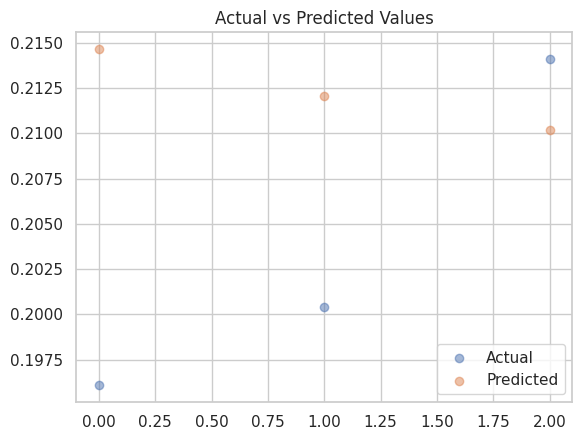

MSE :  0.00016525771658322357
MAE :  0.011382667567886936
RMSE :  0.012855260268980304
R2 :  -1.7960942025872306
MAPE :  5.705907194226421


In [ ]:
# predict on test data
y_pred = model.predict(x_test)

# inverse transform the predictions and actual values
y_pred_unscaled = scaler.inverse_transform(y_pred)
y_test_unscaled = scaler.inverse_transform(y_test)

# plot actual vs predicted values
plt.scatter(range(len(y_test_unscaled)), y_test_unscaled, label='Actual', alpha=0.5)
plt.scatter(range(len(y_pred_unscaled)), y_pred_unscaled, label='Predicted', alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# calculate and print evaluation metrics
MAE = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
RMSE = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
R2 = r2_score(y_test_unscaled, y_pred_unscaled)
MAPE = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100
MSE = mean_squared_error(y_test_unscaled, y_pred_unscaled)

print('MSE : ', MSE)
print('MAE : ', MAE)
print('RMSE : ', RMSE)
print('R2 : ', R2)
print('MAPE : ', MAPE)



In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D , Dropout , Flatten , BatchNormalization,LSTM
from tensorflow.keras.optimizers import SGD,Adam
from sklearn.metrics import confusion_matrix
import pandas as pd 
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard,EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Load the data from the csv file
df = pd.read_csv('/content/Litecoin.csv')

# Print the first two rows
print('A:')
print(df.head(5))

def convert_vol(vol):
    if vol.endswith('M'):
        return int(float(vol[:-1]) * 1000000)
    elif vol.endswith('K'):
        return int(float(vol[:-1]) * 1000)
    else:
        return int(vol)

df['Vol.'] = df['Vol.'].apply(convert_vol)
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)
print('B:')
print(df.head(5))

A:
           Date   Price    Open    High     Low    Vol. Change %
0  Feb 23, 2020  79.706  74.817  79.920  74.722  11.93M    6.53%
1  Feb 22, 2020  74.818  73.288  76.642  72.422  11.56M    2.08%
2  Feb 21, 2020  73.291  69.455  75.161  68.633  12.13M    5.52%
3  Feb 20, 2020  69.455  70.782  72.339  66.495  12.45M   -1.87%
4  Feb 19, 2020  70.782  77.173  79.041  68.264  12.10M   -8.28%
B:
           Date   Price    Open    High     Low      Vol.  Change %
0  Feb 23, 2020  79.706  74.817  79.920  74.722  11930000      6.53
1  Feb 22, 2020  74.818  73.288  76.642  72.422  11560000      2.08
2  Feb 21, 2020  73.291  69.455  75.161  68.633  12130000      5.52
3  Feb 20, 2020  69.455  70.782  72.339  66.495  12450000     -1.87
4  Feb 19, 2020  70.782  77.173  79.041  68.264  12100000     -8.28


In [ ]:
df=df[['Price']]
df.shape
df.head()

Price
0  79.706
1  74.818
2  73.291
3  69.455
4  70.782

In [ ]:
# Scale the data using MinMaxScaler with range (0,1)
scaler = MinMaxScaler(feature_range=(0,1))
df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

def fun(data, lag):
    """
    A function that takes in data and a lag value and returns two arrays: x and y.
    x is an array of shape (k, lag, n), where k is the number of samples and n is the number of features.
    y is an array of shape (k, 1), where k is the number of samples.
    Each sample in x is a sequence of lag consecutive observations from data, and the corresponding value in y is the next observation.
    """
    k = len(data) - lag
    x = []
    y = []
    for i in range(k):
        x.append(data[i:i+lag])
        y.append(data[i+lag,:1])
    x = np.array(x)
    y = np.array(y)
    return x, y

# Reverse the order of the data array
data = np.array(df.iloc[::-1])

# Split the data into train and test sets
test = data[-37:]
train = data[:-36]

# Set the lag value
lag = 30

# Use the function fun to create x_train, y_train, x_test, and y_test arrays
x_train, y_train = fun(train, lag)
x_test, y_test = fun(test, lag)


In [ ]:
# print x_test and y_test data
print("x_test data:\n", x_test)
print("y_test data:\n", y_test)

# print x_test and y_test shape
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_test data:
 [[[59.29 ]
  [57.681]
  [57.2  ]
  [57.597]
  [58.309]
  [54.484]
  [54.39 ]
  [53.272]
  [56.255]
  [58.574]
  [60.549]
  [59.817]
  [67.969]
  [68.044]
  [70.751]
  [69.953]
  [69.705]
  [68.063]
  [72.563]
  [73.594]
  [74.338]
  [76.613]
  [77.023]
  [74.1  ]
  [76.524]
  [81.19 ]
  [80.601]
  [82.965]
  [76.741]
  [74.866]]

 [[57.681]
  [57.2  ]
  [57.597]
  [58.309]
  [54.484]
  [54.39 ]
  [53.272]
  [56.255]
  [58.574]
  [60.549]
  [59.817]
  [67.969]
  [68.044]
  [70.751]
  [69.953]
  [69.705]
  [68.063]
  [72.563]
  [73.594]
  [74.338]
  [76.613]
  [77.023]
  [74.1  ]
  [76.524]
  [81.19 ]
  [80.601]
  [82.965]
  [76.741]
  [74.866]
  [73.341]]

 [[57.2  ]
  [57.597]
  [58.309]
  [54.484]
  [54.39 ]
  [53.272]
  [56.255]
  [58.574]
  [60.549]
  [59.817]
  [67.969]
  [68.044]
  [70.751]
  [69.953]
  [69.705]
  [68.063]
  [72.563]
  [73.594]
  [74.338]
  [76.613]
  [77.023]
  [74.1  ]
  [76.524]
  [81.19 ]
  [80.601]
  [82.965]
  [76.741]
  [74.866]
  [73.341]
  [

In [ ]:
from tensorflow.keras.layers import GRU, LSTM, Dropout, Dense, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Define the loss function
loss_fn = 'mse'

# Define the model
inputs = Input(shape=(30,1))
gru = GRU(30, activation='relu', return_sequences=False)(inputs)
gru = Dropout(0.1)(gru)
gru = Dense(1, activation='relu')(gru)
lstm = LSTM(30, activation='relu', return_sequences=True)(inputs)
lstm = Dropout(0.1)(lstm)
lstm = LSTM(50, activation='relu')(lstm)
lstm = Dense(1, activation='relu')(lstm)
combined = concatenate([gru, lstm])
outputs = Dense(1)(combined)
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with Adam optimizer and defined loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss=loss_fn, metrics=['mae','mse'])

# Fit the model with train data and validate with test data for 100 epochs
callback=EarlyStopping(min_delta=1e-5,patience=5)
history = model.fit(x_train, y_train, epochs=100, callbacks=[callback], validation_data=(x_test, y_test))

Epoch 1/100
38/38 [==============================] - 15s 271ms/step - loss: 0.0233 - mae: 0.0977 - mse: 0.0233 - val_loss: 4.9927e-04 - val_mae: 0.0203 - val_mse: 4.9927e-04
Epoch 2/100
38/38 [==============================] - 8s 205ms/step - loss: 0.0041 - mae: 0.0364 - mse: 0.0041 - val_loss: 3.5467e-04 - val_mae: 0.0162 - val_mse: 3.5467e-04
Epoch 3/100
38/38 [==============================] - 6s 167ms/step - loss: 0.0028 - mae: 0.0292 - mse: 0.0028 - val_loss: 3.5939e-04 - val_mae: 0.0164 - val_mse: 3.5939e-04
Epoch 4/100
38/38 [==============================] - 8s 204ms/step - loss: 0.0025 - mae: 0.0271 - mse: 0.0025 - val_loss: 1.1864e-04 - val_mae: 0.0091 - val_mse: 1.1864e-04
Epoch 5/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0019 - mae: 0.0243 - mse: 0.0019 - val_loss: 1.8121e-04 - val_mae: 0.0112 - val_mse: 1.8121e-04
Epoch 6/100
38/38 [==============================] - 8s 210ms/step - loss: 0.0018 - mae: 0.0233 - mse: 0.0018 - val_loss: 1.6284e-04 -

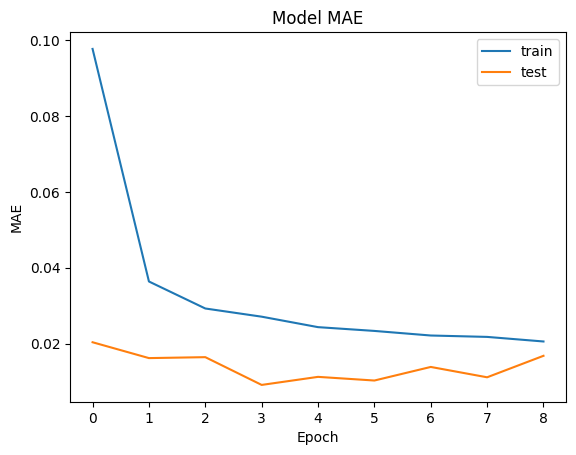

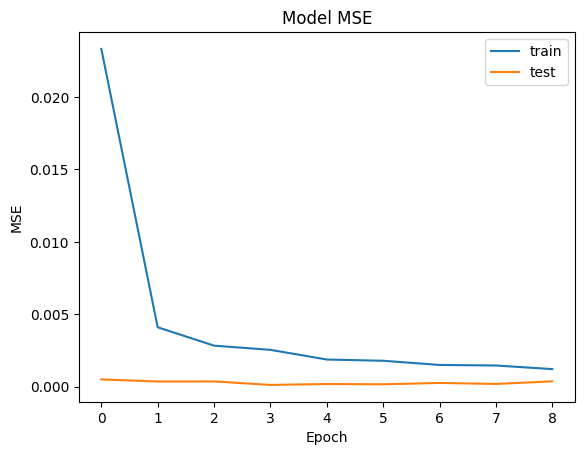

In [ ]:
# Plot the MAE and MSE graphs
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmae.pdf')
plt.show()

plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmse.pdf')
plt.show()


1/1 [==============================] - 0s 393ms/step
Unscaled Metrics
MAE :  5.467275617327011
RMSE :  6.26605529759142
R2 :  -2.6548795139929253
MAPE :  7.553981708313207
MSE :  39.2634489924735
Scaled Metrics
MAE :  0.015361824806918516
RMSE :  0.01760621899800893
R2 :  -2.654877231959331
MAPE :  7.938391857720561
MSE :  0.0003099789474058505


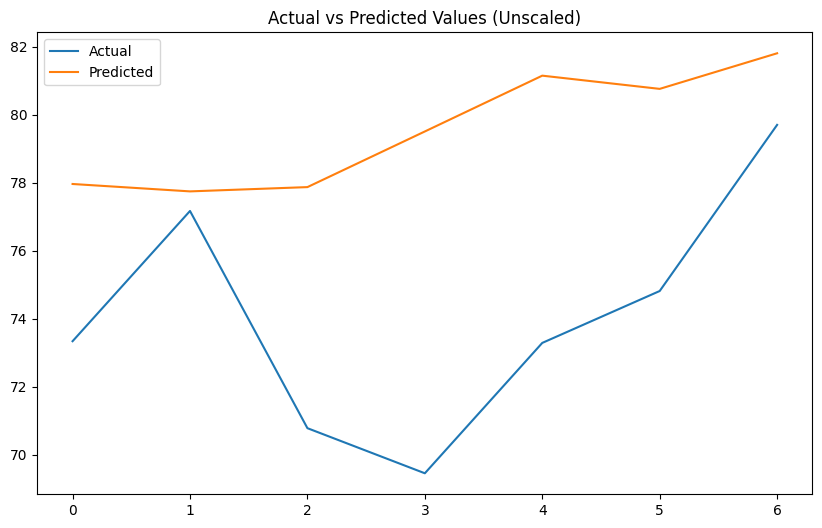

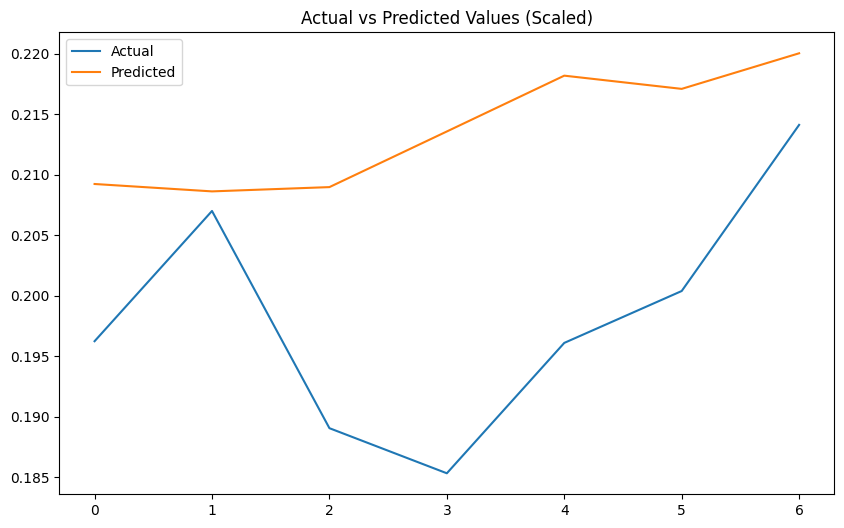

y_test_unscaled: [[73.341]
 [77.173]
 [70.782]
 [69.455]
 [73.291]
 [74.818]
 [79.706]]
y_pred_unscaled: [[77.96685 ]
 [77.749344]
 [77.87519 ]
 [79.51243 ]
 [81.15452 ]
 [80.765594]
 [81.813   ]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define and fit the scaler object on the training data
# scaler = MinMaxScaler()
# scaler.fit(x_train)

# Predict on the test data and unscale the predicted and test data
y_pred_scaled = model.predict(x_test)
y_pred_unscaled = scaler.inverse_transform(y_pred_scaled[::-1])
y_test_unscaled = scaler.inverse_transform(y_test)

# Print the evaluation metrics for the unscaled predictions
MAE_unscaled = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
RMSE_unscaled = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
R2_unscaled = r2_score(y_test_unscaled, y_pred_unscaled)
MAPE_unscaled = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100
MSE_unscaled = mean_squared_error(y_test_unscaled, y_pred_unscaled)

print('Unscaled Metrics')
print('MAE : ', MAE_unscaled)
print('RMSE : ', RMSE_unscaled)
print('R2 : ', R2_unscaled)
print('MAPE : ', MAPE_unscaled)
print('MSE : ', MSE_unscaled)

# Print the evaluation metrics for the scaled predictions
y_pred_scaled = y_pred_scaled.flatten()[::-1]
y_test_scaled = y_test.flatten()
MAE_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
RMSE_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
R2_scaled = r2_score(y_test_scaled, y_pred_scaled)
MAPE_scaled = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)) * 100
MSE_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)

print('Scaled Metrics')
print('MAE : ', MAE_scaled)
print('RMSE : ', RMSE_scaled)
print('R2 : ', R2_scaled)
print('MAPE : ', MAPE_scaled)
print('MSE : ', MSE_scaled)

# Plot the actual vs predicted values for the unscaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, label='Actual')
plt.plot(y_pred_unscaled, label='Predicted')
plt.title('Actual vs Predicted Values (Unscaled)')
plt.legend()
plt.show()

# Plot the actual vs predicted values for the scaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, label='Actual')
plt.plot(y_pred_scaled, label='Predicted')
plt.title('Actual vs Predicted Values (Scaled)')
plt.legend()
plt.show()

print('y_test_unscaled:', y_test_unscaled)
print('y_pred_unscaled:', y_pred_unscaled)



In [ ]:
y_test_unscaled

array([[73.291],
       [74.818],
       [79.706]])

In [ ]:
y_pred_unscaled

array([[77.04522],
       [76.24871],
       [76.06851]], dtype=float32)

In [ ]:
y_pred=model.predict(x_test)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
R2 = r2_score(y_test,y_pred)
print('MAE : ',MAE)
print('RMSE : ',RMSE)
print('R2 : ',R2)

SyntaxError: ignored

In [ ]:
y_pred_unscaled

array([[0.21465631],
       [0.21204396],
       [0.21018924]], dtype=float32)

In [ ]:
y_test_unscaled

array([0.19609722, 0.20038775, 0.21412194])

1/1 [==============================] - 0s 39ms/step


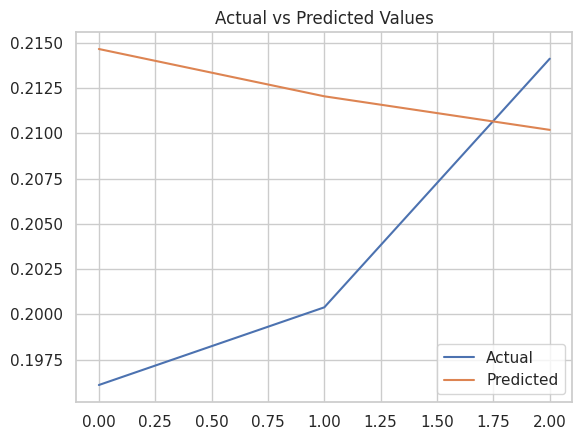

MAE :  0.011382667567886936
RMSE :  0.012855260268980304
R2 :  -1.7960942025872306
MAPE :  5.705907194226421
MSE :  0.00016525771658322357


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define and fit the scaler object on the training data
scaler = MinMaxScaler()
scaler.fit(x_train.reshape(-1, x_train.shape[-1]))

# Predict on the test data and unscale the predicted and test data
y_pred = model.predict(x_test)
y_pred_unscaled = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plot actual vs predicted values
plt.plot(y_test_unscaled, label='Actual')
plt.plot(y_pred_unscaled, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# Calculate and print evaluation metrics
MAE = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
RMSE = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
R2 = r2_score(y_test_unscaled, y_pred_unscaled)
MAPE = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100
MSE = mean_squared_error(y_test_unscaled, y_pred_unscaled)

print('MAE : ', MAE)
print('RMSE : ', RMSE)
print('R2 : ', R2)
print('MAPE : ', MAPE)
print('MSE : ', MSE)


1/1 [==============================] - 0s 372ms/step


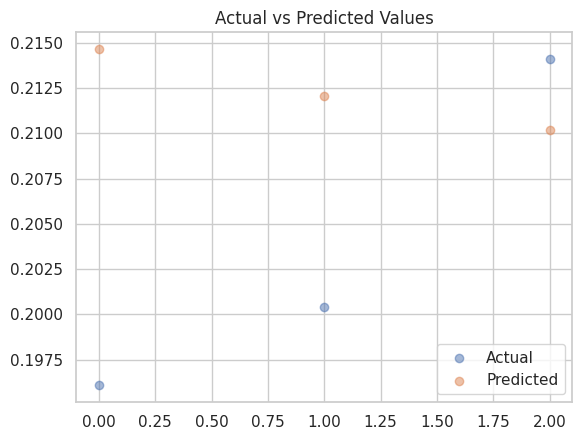

MSE :  0.00016525771658322357
MAE :  0.011382667567886936
RMSE :  0.012855260268980304
R2 :  -1.7960942025872306
MAPE :  5.705907194226421


In [ ]:
# predict on test data
y_pred = model.predict(x_test)

# inverse transform the predictions and actual values
y_pred_unscaled = scaler.inverse_transform(y_pred)
y_test_unscaled = scaler.inverse_transform(y_test)

# plot actual vs predicted values
plt.scatter(range(len(y_test_unscaled)), y_test_unscaled, label='Actual', alpha=0.5)
plt.scatter(range(len(y_pred_unscaled)), y_pred_unscaled, label='Predicted', alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# calculate and print evaluation metrics
MAE = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
RMSE = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
R2 = r2_score(y_test_unscaled, y_pred_unscaled)
MAPE = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100
MSE = mean_squared_error(y_test_unscaled, y_pred_unscaled)

print('MSE : ', MSE)
print('MAE : ', MAE)
print('RMSE : ', RMSE)
print('R2 : ', R2)
print('MAPE : ', MAPE)



In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D , Dropout , Flatten , BatchNormalization,LSTM
from tensorflow.keras.optimizers import SGD,Adam
from sklearn.metrics import confusion_matrix
import pandas as pd 
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard,EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Load the data from the csv file
df = pd.read_csv('/content/Litecoin.csv')

# Print the first two rows
print('A:')
print(df.head(5))

def convert_vol(vol):
    if vol.endswith('M'):
        return int(float(vol[:-1]) * 1000000)
    elif vol.endswith('K'):
        return int(float(vol[:-1]) * 1000)
    else:
        return int(vol)

df['Vol.'] = df['Vol.'].apply(convert_vol)
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)
print('B:')
print(df.head(5))

A:
           Date   Price    Open    High     Low    Vol. Change %
0  Feb 23, 2020  79.706  74.817  79.920  74.722  11.93M    6.53%
1  Feb 22, 2020  74.818  73.288  76.642  72.422  11.56M    2.08%
2  Feb 21, 2020  73.291  69.455  75.161  68.633  12.13M    5.52%
3  Feb 20, 2020  69.455  70.782  72.339  66.495  12.45M   -1.87%
4  Feb 19, 2020  70.782  77.173  79.041  68.264  12.10M   -8.28%
B:
           Date   Price    Open    High     Low      Vol.  Change %
0  Feb 23, 2020  79.706  74.817  79.920  74.722  11930000      6.53
1  Feb 22, 2020  74.818  73.288  76.642  72.422  11560000      2.08
2  Feb 21, 2020  73.291  69.455  75.161  68.633  12130000      5.52
3  Feb 20, 2020  69.455  70.782  72.339  66.495  12450000     -1.87
4  Feb 19, 2020  70.782  77.173  79.041  68.264  12100000     -8.28


In [ ]:
df=df[['Price']]
df.shape
df.head()

Price
0  79.706
1  74.818
2  73.291
3  69.455
4  70.782

In [ ]:
# Scale the data using MinMaxScaler with range (0,1)
scaler = MinMaxScaler(feature_range=(0,1))
df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

def fun(data, lag):
    """
    A function that takes in data and a lag value and returns two arrays: x and y.
    x is an array of shape (k, lag, n), where k is the number of samples and n is the number of features.
    y is an array of shape (k, 1), where k is the number of samples.
    Each sample in x is a sequence of lag consecutive observations from data, and the corresponding value in y is the next observation.
    """
    k = len(data) - lag
    x = []
    y = []
    for i in range(k):
        x.append(data[i:i+lag])
        y.append(data[i+lag,:1])
    x = np.array(x)
    y = np.array(y)
    return x, y

# Reverse the order of the data array
data = np.array(df.iloc[::-1])

# Split the data into train and test sets
test = data[-33:]
train = data[:-32]

# Set the lag value
lag = 30

# Use the function fun to create x_train, y_train, x_test, and y_test arrays
x_train, y_train = fun(train, lag)
x_test, y_test = fun(test, lag)


In [ ]:
# print x_test and y_test data
print("x_test data:\n", x_test)
print("y_test data:\n", y_test)

# print x_test and y_test shape
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_test data:
 [[[58.309]
  [54.484]
  [54.39 ]
  [53.272]
  [56.255]
  [58.574]
  [60.549]
  [59.817]
  [67.969]
  [68.044]
  [70.751]
  [69.953]
  [69.705]
  [68.063]
  [72.563]
  [73.594]
  [74.338]
  [76.613]
  [77.023]
  [74.1  ]
  [76.524]
  [81.19 ]
  [80.601]
  [82.965]
  [76.741]
  [74.866]
  [73.341]
  [77.173]
  [70.782]
  [69.455]]

 [[54.484]
  [54.39 ]
  [53.272]
  [56.255]
  [58.574]
  [60.549]
  [59.817]
  [67.969]
  [68.044]
  [70.751]
  [69.953]
  [69.705]
  [68.063]
  [72.563]
  [73.594]
  [74.338]
  [76.613]
  [77.023]
  [74.1  ]
  [76.524]
  [81.19 ]
  [80.601]
  [82.965]
  [76.741]
  [74.866]
  [73.341]
  [77.173]
  [70.782]
  [69.455]
  [73.291]]

 [[54.39 ]
  [53.272]
  [56.255]
  [58.574]
  [60.549]
  [59.817]
  [67.969]
  [68.044]
  [70.751]
  [69.953]
  [69.705]
  [68.063]
  [72.563]
  [73.594]
  [74.338]
  [76.613]
  [77.023]
  [74.1  ]
  [76.524]
  [81.19 ]
  [80.601]
  [82.965]
  [76.741]
  [74.866]
  [73.341]
  [77.173]
  [70.782]
  [69.455]
  [73.291]
  [

In [ ]:
from tensorflow.keras.layers import GRU, LSTM, Dropout, Dense, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Define the loss function
loss_fn = 'mse'

# Define the model
inputs = Input(shape=(30,1))
gru = GRU(30, activation='relu', return_sequences=False)(inputs)
gru = Dropout(0.1)(gru)
gru = Dense(1, activation='relu')(gru)
lstm = LSTM(30, activation='relu', return_sequences=True)(inputs)
lstm = Dropout(0.1)(lstm)
lstm = LSTM(50, activation='relu')(lstm)
lstm = Dense(1, activation='relu')(lstm)
combined = concatenate([gru, lstm])
outputs = Dense(1)(combined)
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with Adam optimizer and defined loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss=loss_fn, metrics=['mae','mse'])

# Fit the model with train data and validate with test data for 100 epochs
callback=EarlyStopping(min_delta=1e-5,patience=5)
history = model.fit(x_train, y_train, epochs=100, callbacks=[callback], validation_data=(x_test, y_test))

Epoch 1/100
39/39 [==============================] - 31s 261ms/step - loss: 0.0522 - mae: 0.1646 - mse: 0.0522 - val_loss: 0.0184 - val_mae: 0.1354 - val_mse: 0.0184
Epoch 2/100
39/39 [==============================] - 6s 164ms/step - loss: 0.0296 - mae: 0.1148 - mse: 0.0296 - val_loss: 0.0021 - val_mae: 0.0447 - val_mse: 0.0021
Epoch 3/100
39/39 [==============================] - 8s 204ms/step - loss: 0.0145 - mae: 0.0821 - mse: 0.0145 - val_loss: 6.4414e-05 - val_mae: 0.0077 - val_mse: 6.4414e-05
Epoch 4/100
39/39 [==============================] - 6s 167ms/step - loss: 0.0042 - mae: 0.0432 - mse: 0.0042 - val_loss: 1.5005e-04 - val_mae: 0.0090 - val_mse: 1.5005e-04
Epoch 5/100
39/39 [==============================] - 8s 207ms/step - loss: 0.0032 - mae: 0.0370 - mse: 0.0032 - val_loss: 1.6006e-04 - val_mae: 0.0094 - val_mse: 1.6006e-04
Epoch 6/100
39/39 [==============================] - 7s 192ms/step - loss: 0.0032 - mae: 0.0361 - mse: 0.0032 - val_loss: 8.4585e-05 - val_mae: 0.0088

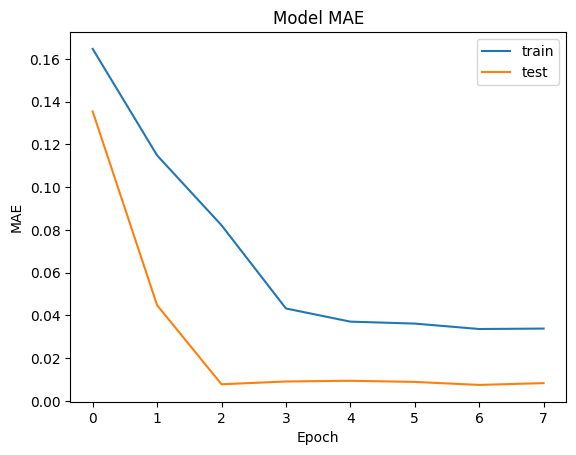

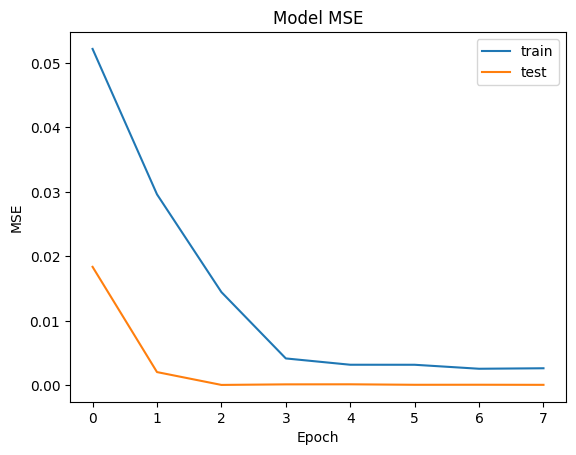

In [ ]:
# Plot the MAE and MSE graphs
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmae.pdf')
plt.show()

plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmse.pdf')
plt.show()


1/1 [==============================] - 0s 55ms/step
Unscaled Metrics
MAE :  2.289667724609378
RMSE :  2.3693359762439608
R2 :  0.25012759323117084
MAPE :  3.0134007852665583
MSE :  5.613752968323922
Scaled Metrics
MAE :  0.006433460460660882
RMSE :  0.006657312049106638
R2 :  0.2501267184301361
MAPE :  3.1591410687540864
MSE :  4.431980371918042e-05


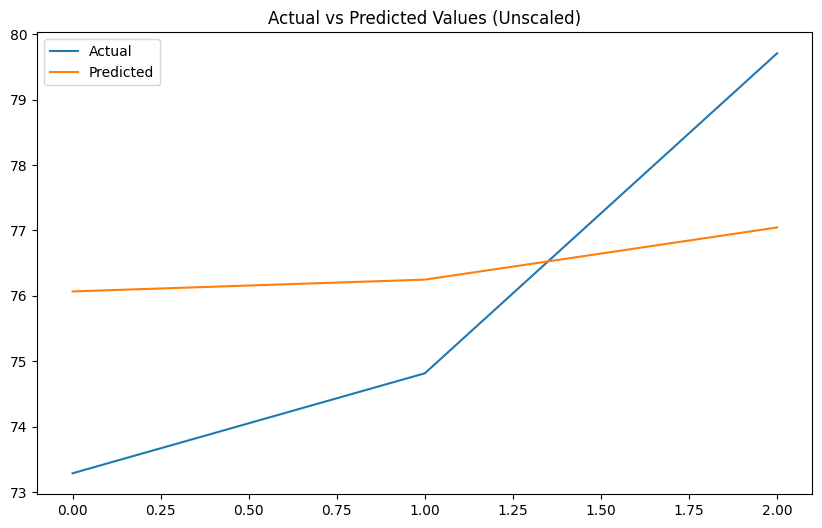

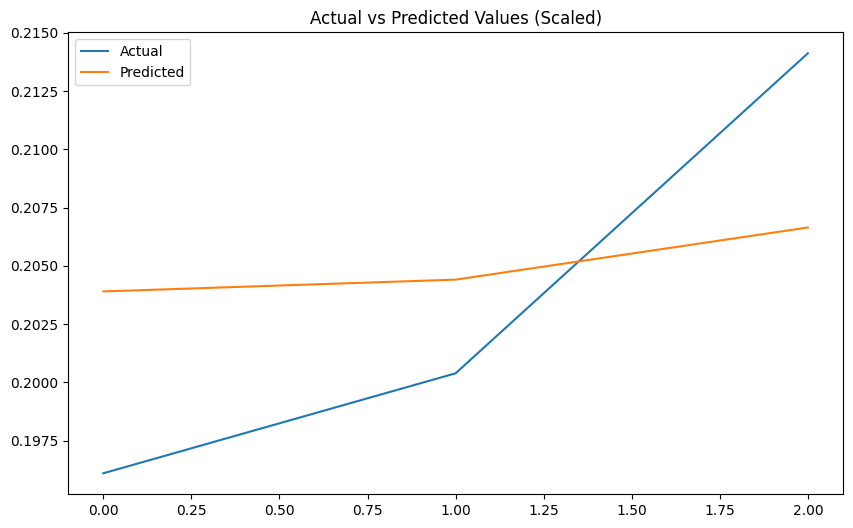

y_test_unscaled: [[73.291]
 [74.818]
 [79.706]]
y_pred_unscaled: [[76.06851]
 [76.24871]
 [77.04522]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define and fit the scaler object on the training data
# scaler = MinMaxScaler()
# scaler.fit(x_train)

# Predict on the test data and unscale the predicted and test data
y_pred_scaled = model.predict(x_test)
y_pred_unscaled = scaler.inverse_transform(y_pred_scaled[::-1])
y_test_unscaled = scaler.inverse_transform(y_test)

# Print the evaluation metrics for the unscaled predictions
MAE_unscaled = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
RMSE_unscaled = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
R2_unscaled = r2_score(y_test_unscaled, y_pred_unscaled)
MAPE_unscaled = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100
MSE_unscaled = mean_squared_error(y_test_unscaled, y_pred_unscaled)

print('Unscaled Metrics')
print('MAE : ', MAE_unscaled)
print('RMSE : ', RMSE_unscaled)
print('R2 : ', R2_unscaled)
print('MAPE : ', MAPE_unscaled)
print('MSE : ', MSE_unscaled)

# Print the evaluation metrics for the scaled predictions
y_pred_scaled = y_pred_scaled.flatten()[::-1]
y_test_scaled = y_test.flatten()
MAE_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
RMSE_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
R2_scaled = r2_score(y_test_scaled, y_pred_scaled)
MAPE_scaled = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)) * 100
MSE_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)

print('Scaled Metrics')
print('MAE : ', MAE_scaled)
print('RMSE : ', RMSE_scaled)
print('R2 : ', R2_scaled)
print('MAPE : ', MAPE_scaled)
print('MSE : ', MSE_scaled)

# Plot the actual vs predicted values for the unscaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, label='Actual')
plt.plot(y_pred_unscaled, label='Predicted')
plt.title('Actual vs Predicted Values (Unscaled)')
plt.legend()
plt.show()

# Plot the actual vs predicted values for the scaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, label='Actual')
plt.plot(y_pred_scaled, label='Predicted')
plt.title('Actual vs Predicted Values (Scaled)')
plt.legend()
plt.show()

print('y_test_unscaled:', y_test_unscaled)
print('y_pred_unscaled:', y_pred_unscaled)



In [ ]:
y_test_unscaled

array([[73.291],
       [74.818],
       [79.706]])

In [ ]:
y_pred_unscaled

array([[77.04522],
       [76.24871],
       [76.06851]], dtype=float32)

In [ ]:
y_pred=model.predict(x_test)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
R2 = r2_score(y_test,y_pred)
print('MAE : ',MAE)
print('RMSE : ',RMSE)
print('R2 : ',R2)

SyntaxError: ignored

In [ ]:
y_pred_unscaled

array([[0.21465631],
       [0.21204396],
       [0.21018924]], dtype=float32)

In [ ]:
y_test_unscaled

array([0.19609722, 0.20038775, 0.21412194])

1/1 [==============================] - 0s 39ms/step


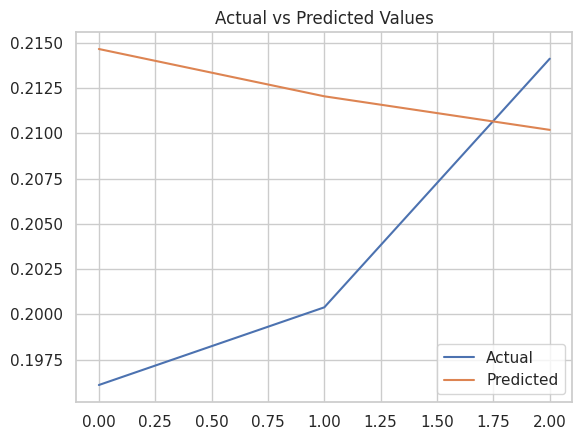

MAE :  0.011382667567886936
RMSE :  0.012855260268980304
R2 :  -1.7960942025872306
MAPE :  5.705907194226421
MSE :  0.00016525771658322357


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define and fit the scaler object on the training data
scaler = MinMaxScaler()
scaler.fit(x_train.reshape(-1, x_train.shape[-1]))

# Predict on the test data and unscale the predicted and test data
y_pred = model.predict(x_test)
y_pred_unscaled = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plot actual vs predicted values
plt.plot(y_test_unscaled, label='Actual')
plt.plot(y_pred_unscaled, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# Calculate and print evaluation metrics
MAE = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
RMSE = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
R2 = r2_score(y_test_unscaled, y_pred_unscaled)
MAPE = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100
MSE = mean_squared_error(y_test_unscaled, y_pred_unscaled)

print('MAE : ', MAE)
print('RMSE : ', RMSE)
print('R2 : ', R2)
print('MAPE : ', MAPE)
print('MSE : ', MSE)


1/1 [==============================] - 0s 372ms/step


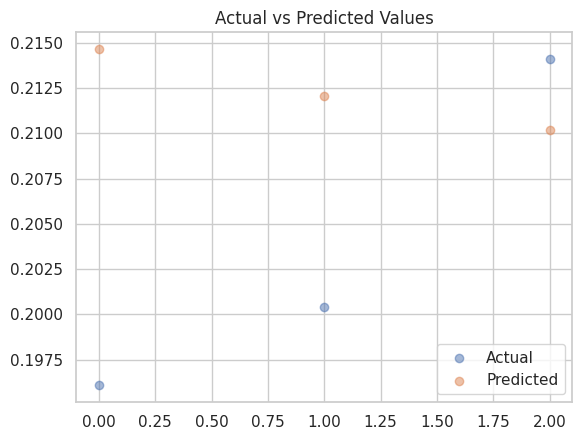

MSE :  0.00016525771658322357
MAE :  0.011382667567886936
RMSE :  0.012855260268980304
R2 :  -1.7960942025872306
MAPE :  5.705907194226421


In [ ]:
# predict on test data
y_pred = model.predict(x_test)

# inverse transform the predictions and actual values
y_pred_unscaled = scaler.inverse_transform(y_pred)
y_test_unscaled = scaler.inverse_transform(y_test)

# plot actual vs predicted values
plt.scatter(range(len(y_test_unscaled)), y_test_unscaled, label='Actual', alpha=0.5)
plt.scatter(range(len(y_pred_unscaled)), y_pred_unscaled, label='Predicted', alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# calculate and print evaluation metrics
MAE = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
RMSE = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
R2 = r2_score(y_test_unscaled, y_pred_unscaled)
MAPE = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100
MSE = mean_squared_error(y_test_unscaled, y_pred_unscaled)

print('MSE : ', MSE)
print('MAE : ', MAE)
print('RMSE : ', RMSE)
print('R2 : ', R2)
print('MAPE : ', MAPE)



In [ ]:
from tensorflow.keras.layers import GRU, LSTM, Dropout, Dense, Input, concatenate
from tensorflow.keras.models import Model

inputs = Input(shape=(30,1))

# GRU Network
gru = GRU(30, activation='relu', return_sequences=False)(inputs)
gru = Dropout(0.2)(gru)
gru = Dense(1, activation='relu')(gru)

# LSTM Network
lstm = LSTM(30, activation='relu', return_sequences=True)(inputs)
lstm = Dropout(0.2)(lstm)
lstm = LSTM(50, activation='relu')(lstm)
lstm = Dense(1, activation='relu')(lstm)

# Combine GRU and LSTM networks
combined = concatenate([gru, lstm])
outputs = Dense(1)(combined)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

# compile the model with Adam optimizer and defined loss function
model.compile(optimizer=Adam(learning_rate=0.001),loss=loss_fn)

# fit the model with train data and validate with test data for 100 epochs
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
7/7 [==============================] - 11s 124ms/step - loss: 0.0699 - mae: 0.1572 - mse: 0.0699
Epoch 2/100
7/7 [==============================] - 1s 126ms/step - loss: 0.0400 - mae: 0.1275 - mse: 0.0400
Epoch 3/100
7/7 [==============================] - 1s 129ms/step - loss: 0.0273 - mae: 0.1443 - mse: 0.0273
Epoch 4/100
7/7 [==============================] - 1s 129ms/step - loss: 0.0190 - mae: 0.1172 - mse: 0.0190
Epoch 5/100
7/7 [==============================] - 1s 125ms/step - loss: 0.0155 - mae: 0.0891 - mse: 0.0155
Epoch 6/100
7/7 [==============================] - 1s 125ms/step - loss: 0.0138 - mae: 0.0759 - mse: 0.0138
Epoch 7/100
7/7 [==============================] - 1s 126ms/step - loss: 0.0100 - mae: 0.0637 - mse: 0.0100
Epoch 8/100
7/7 [==============================] - 1s 127ms/step - loss: 0.0096 - mae: 0.0596 - mse: 0.0096
Epoch 9/100
7/7 [==============================] - 1s 126ms/step - loss: 0.0095 - mae: 0.0560 - mse: 0.0095
Epoch 10/100
7/7 [=========

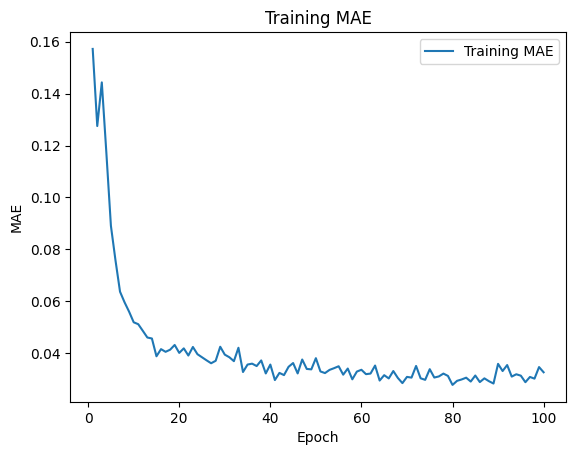

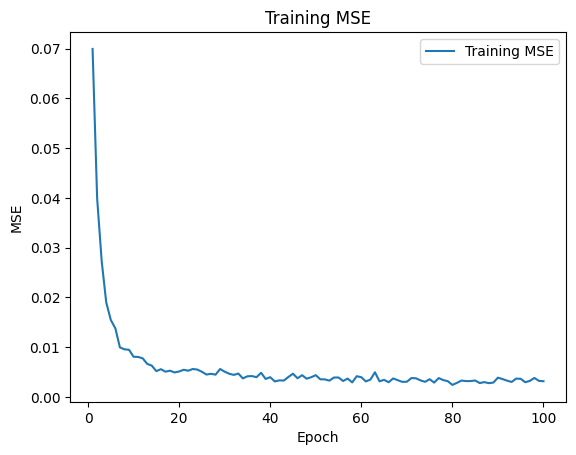

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, GRU, LSTM, Dense, Dropout, concatenate
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, GRU, Dropout, Dense, concatenate
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('/content/Litecoin.csv')

# Filter the data to include only the dates within the specified range
data = data.loc[(data['Date'] >= 'Aug 24, 2016') & (data['Date'] <= 'Feb 22, 2020')]

# Select the primary feature for training
training_data = data['Price'].values.reshape(-1, 1)

# Normalize the training data to scale values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
training_data_normalized = scaler.fit_transform(training_data)

# Define the input window length (number of past days to use for prediction)
input_window_length = 30

# Use the PROCESS_DATA algorithm to create input/output samples
def process_data(data, input_window_length):
    Dx = []
    Dy = []
    n = len(data)
    for i in range(n):
        end_index = i + input_window_length
        if end_index > n-1:
            break
        temp_X = data[i:end_index, :]
        temp_Y = data[end_index, 0]
        Dx.append(temp_X)
        Dy.append(temp_Y)
    Dx = np.array(Dx)
    Dy = np.array(Dy)
    return (Dx, Dy)

# Create input/output samples using the training data
train_X, train_Y = process_data(training_data_normalized, input_window_length)

# Define the model
inputs = Input(shape=(input_window_length, 1))

# GRU Network
gru = GRU(30, activation='relu', return_sequences=False)(inputs)
gru = Dropout(0.25)(gru)
gru = Dense(30, activation='relu')(gru)

# LSTM Network
lstm = LSTM(30, activation='relu', return_sequences=True)(inputs)
lstm = Dropout(0.25)(lstm)
lstm = LSTM(50, activation='relu')(lstm)
lstm = Dense(30, activation='relu')(lstm)

# Combine GRU and LSTM networks
combined = concatenate([gru, lstm])
outputs = Dense(1)(combined)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae','mse'])

# Train the model
history = model.fit(train_X, train_Y, epochs=100)

# Plot MAE over epochs
mae_history = history.history['mae']
plt.plot(range(1, len(mae_history)+1), mae_history, label='Training MAE')
plt.title('Training MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.savefig('maeplot22.pdf')
plt.show()

# Plot MSE over epochs
mse_history = history.history['loss']
plt.plot(range(1, len(mse_history)+1), mse_history, label='Training MSE')
plt.title('Training MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.savefig('mmseplot22.pdf')
plt.show()


In [ ]:
# Get the last 30 days' data
last_30_days = data['Price'].head(input_window_length).values.reshape(-1, 1)

# Normalize the data
last_30_days_normalized = scaler.transform(last_30_days)

# Reshape the data to match the input shape of the model
last_30_days_normalized_reshaped = last_30_days_normalized.reshape(1, input_window_length, 1)

# Use the trained model to predict the price for the next day
predicted_price_normalized = model.predict(last_30_days_normalized_reshaped)

# Invert the normalization to get the predicted price in the original scale
predicted_price = scaler.inverse_transform(predicted_price_normalized)

# Print last inputs, actual output and predicted output
print("Last 30 days' data:\n", last_30_days)
print("Actual price for the next day:", data['Price'].head(1).values[0])
print("Predicted price for the next day:", predicted_price[0][0])

# Calculate evaluation metrics
actual_price = data['Price'].head(1).values[0]
mse = mean_squared_error([actual_price], [predicted_price[0][0]])
rmse = np.sqrt(mse)
mae = mean_absolute_error([actual_price], [predicted_price[0][0]])
mape = mean_absolute_percentage_error([actual_price], [predicted_price[0][0]])

# Print evaluation metrics
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


1/1 [==============================] - 0s 376ms/step
Last 30 days' data:
 [[74.818]
 [73.291]
 [69.455]
 [70.782]
 [77.173]
 [73.341]
 [74.866]
 [76.741]
 [82.965]
 [80.601]
 [81.19 ]
 [76.524]
 [74.1  ]
 [77.023]
 [76.613]
 [74.338]
 [73.594]
 [72.563]
 [68.063]
 [69.705]
 [69.953]
 [70.751]
 [41.287]
 [42.425]
 [43.152]
 [42.751]
 [41.044]
 [40.088]
 [40.102]
 [40.381]]
Actual price for the next day: 74.818
Predicted price for the next day: 39.573227
MSE: 1242.1940288466626
RMSE: 35.24477307128906
MAE: 35.24477307128906
MAPE: 0.4710734458457732


In [ ]:
import pandas as pd

# Load the data from the csv file
df = pd.read_csv('/content/Litecoin.csv')

# Print the first two rows
print('A:')
print(df.head(5))

def convert_vol(vol):
    if vol.endswith('M'):
        return int(float(vol[:-1]) * 1000000)
    elif vol.endswith('K'):
        return int(float(vol[:-1]) * 1000)
    else:
        return int(vol)

df['Vol.'] = df['Vol.'].apply(convert_vol)
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)
print('B:')
print(df.head(5))

A:
           Date   Price    Open    High     Low    Vol. Change %
0  Feb 23, 2020  79.706  74.817  79.920  74.722  11.93M    6.53%
1  Feb 22, 2020  74.818  73.288  76.642  72.422  11.56M    2.08%
2  Feb 21, 2020  73.291  69.455  75.161  68.633  12.13M    5.52%
3  Feb 20, 2020  69.455  70.782  72.339  66.495  12.45M   -1.87%
4  Feb 19, 2020  70.782  77.173  79.041  68.264  12.10M   -8.28%
B:
           Date   Price    Open    High     Low      Vol.  Change %
0  Feb 23, 2020  79.706  74.817  79.920  74.722  11930000      6.53
1  Feb 22, 2020  74.818  73.288  76.642  72.422  11560000      2.08
2  Feb 21, 2020  73.291  69.455  75.161  68.633  12130000      5.52
3  Feb 20, 2020  69.455  70.782  72.339  66.495  12450000     -1.87
4  Feb 19, 2020  70.782  77.173  79.041  68.264  12100000     -8.28


In [ ]:
# Load data from CSV file
data = pd.read_csv('/content/Litecoin.csv')

# Filter the data to include only the dates within the specified range
data = data.loc[(data['Date'] >= 'Aug 24, 2016') & (data['Date'] <= 'Feb 23, 2020')]

# Select the primary feature for training
training_data = data['Price'].values.reshape(-1, 1)

# Normalize the training data to scale values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
training_data_normalized = scaler.fit_transform(training_data)

# Define the input window length (number of past days to use for prediction)
input_window_length = 30

# Use the PROCESS_DATA algorithm to create input/output samples
def process_data(data, input_window_length):
    Dx = []
    Dy = []
    n = len(data)
    for i in range(n):
        end_index = i + input_window_length
        if end_index > n-1:
            break
        temp_X = data[i:end_index, :]
        temp_Y = data[end_index, 0]
        Dx.append(temp_X)
        Dy.append(temp_Y)
    Dx = np.array(Dx)
    Dy = np.array(Dy)
    return (Dx, Dy)

# Create input/output samples using the training data
train_X, train_Y = process_data(training_data_normalized, input_window_length)

# Predict the price for the next day using the last 30 inputs
last_30_inputs = train_X[-1].reshape(1, input_window_length, 1)
predicted_price = scaler.inverse_transform(model.predict(last_30_inputs))[0][0]

# Print the predicted price
print('Predicted price for the next day:', predicted_price)


1/1 [==============================] - 0s 40ms/step
Predicted price for the next day: 26.934385


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, GRU, LSTM, Dense, Dropout, concatenate
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, GRU, Dropout, Dense, concatenate
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('/content/Litecoin.csv')

# Filter the data to include only the dates within the specified range
# data = data.loc[(data['Date'] >= 'Aug 24, 2016') & (data['Date'] <= 'Feb 22, 2020')]

# Select the primary feature for training
training_data = data['Price'].values.reshape(-1, 1)

# Normalize the training data to scale values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
training_data_normalized = scaler.fit_transform(training_data)

# Define the input window length (number of past days to use for prediction)
input_window_length = 30

# Use the PROCESS_DATA algorithm to create input/output samples
def process_data(data, input_window_length):
    Dx = []
    Dy = []
    n = len(data)
    for i in range(n):
        end_index = i + input_window_length
        if end_index > n-1:
            break
        temp_X = data[i:end_index, :]
        temp_Y = data[end_index, 0]
        Dx.append(temp_X)
        Dy.append(temp_Y)
    Dx = np.array(Dx)
    Dy = np.array(Dy)
    return (Dx, Dy)

# Create input/output samples using the training data
train_X, train_Y = process_data(training_data_normalized, input_window_length)

In [ ]:
import keras

# Load the trained model
model = keras.models.load_model('modelSc1LitecoinHM.h5')

# Get the last 30 input values from the test set
last_inputs = train_X[1].reshape(1, input_window_length, 1)

# Make a prediction for the next day
next_day_price_normalized = model.predict(last_inputs)

# Rescale the predicted price to the original range
next_day_price = scaler.inverse_transform(next_day_price_normalized)

print('Predicted price for February 23, 2020:', next_day_price[0, 0])


1/1 [==============================] - 1s 926ms/step
Predicted price for February 23, 2020: 53.26405


In [ ]:
# Get the last 30 inputs without scaling
# last_inputs = scaler.inverse_transform(train_X[-1])

# Print the last 30 inputs without scaling
print("Last 30 inputs without scaling:")
for i, val in enumerate(train_X):
    print("Day {}: {}".format(i+1, val))


Streaming output truncated to the last 5000 lines.
 [0.00109581]
 [0.00112391]
 [0.0012644 ]
 [0.00112391]
 [0.00109581]
 [0.00098342]
 [0.00087103]
 [0.00087103]
 [0.00095532]
 [0.00115201]
 [0.00101152]
 [0.00109581]
 [0.00089913]
 [0.00078674]
 [0.00084293]
 [0.00095532]
 [0.00092723]
 [0.00073054]
 [0.0012925 ]
 [0.00134869]]
Day 1084: [[0.00137679]
 [0.00168587]
 [0.00146108]
 [0.00151728]
 [0.00160157]
 [0.00151728]
 [0.00101152]
 [0.00098342]
 [0.00103962]
 [0.00109581]
 [0.00112391]
 [0.0012644 ]
 [0.00112391]
 [0.00109581]
 [0.00098342]
 [0.00087103]
 [0.00087103]
 [0.00095532]
 [0.00115201]
 [0.00101152]
 [0.00109581]
 [0.00089913]
 [0.00078674]
 [0.00084293]
 [0.00095532]
 [0.00092723]
 [0.00073054]
 [0.0012925 ]
 [0.00134869]
 [0.0013206 ]]
Day 1085: [[0.00168587]
 [0.00146108]
 [0.00151728]
 [0.00160157]
 [0.00151728]
 [0.00101152]
 [0.00098342]
 [0.00103962]
 [0.00109581]
 [0.00112391]
 [0.0012644 ]
 [0.00112391]
 [0.00109581]
 [0.00098342]
 [0.00087103]
 [0.00087103]
 [0

In [ ]:
# Load the saved model
model = Model(inputs=inputs, outputs=outputs)
model.load_weights('modelSc1LitecoinHM.h5')

# Get the last 30 days of data from the input data
last_30_days = training_data_normalized[-30:]

# Reshape the data to match the input shape of the model
last_30_days = last_30_days.reshape(1, 30, 1)

# Use the trained model to predict the price for the next day
predicted_price = model.predict(last_30_days)

# Denormalize the predicted price
predicted_price = scaler.inverse_transform(predicted_price)

# Print the predicted price for the next day
print('Predicted price for the next day:', predicted_price[0][0])

# Use the trained model to predict the prices for the test set
predicted_prices = model.predict(test_X)

# Denormalize the predicted prices and actual prices
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(test_Y.reshape(-1, 1))

# Calculate MSE, RMSE, MAE, and MAPE for the test set
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_prices, predicted_prices)
mape = mean_absolute_percentage_error(actual_prices, predicted_prices)

# Print the evaluation metrics
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('MAPE:', mape)


1/1 [==============================] - 1s 621ms/step
Predicted price for the next day: 26.9355
8/8 [==============================] - 0s 16ms/step
MSE: 502.5320760702359
RMSE: 22.417227216367234
MAE: 22.324047897033694
MAPE: 5.33955489422329


In [ ]:
actual_prices

array([[16.2 ],
       [16.34],
       [14.75],
       [14.98],
       [15.09],
       [15.53],
       [15.07],
       [15.38],
       [14.35],
       [12.12],
       [10.99],
       [10.21],
       [10.95],
       [11.15],
       [11.7 ],
       [11.69],
       [11.61],
       [11.05],
       [11.69],
       [ 9.71],
       [ 9.87],
       [ 9.26],
       [10.79],
       [ 9.89],
       [10.87],
       [13.  ],
       [ 9.15],
       [ 8.61],
       [ 8.34],
       [ 7.61],
       [ 7.25],
       [ 7.89],
       [ 4.3 ],
       [ 4.2 ],
       [ 4.08],
       [ 4.1 ],
       [ 4.09],
       [ 4.11],
       [ 3.96],
       [ 3.94],
       [ 4.04],
       [ 4.18],
       [ 3.93],
       [ 4.02],
       [ 4.12],
       [ 4.31],
       [ 4.33],
       [ 4.19],
       [ 4.4 ],
       [ 3.94],
       [ 3.82],
       [ 3.8 ],
       [ 3.92],
       [ 3.86],
       [ 3.99],
       [ 4.1 ],
       [ 4.02],
       [ 4.04],
       [ 4.07],
       [ 4.04],
       [ 3.86],
       [ 3.85],
       [

In [ ]:
predicted_price

array([[[0.1927023 ],
        [0.200012  ],
        [0.20130889],
        [0.2012605 ],
        [0.20112342],
        [0.20102939],
        [0.20102654],
        [0.20106126],
        [0.20111743],
        [0.20117216],
        [0.20123625],
        [0.20129144],
        [0.20134321],
        [0.20138209],
        [0.20141841],
        [0.20143935],
        [0.20145857],
        [0.20147598],
        [0.20149472],
        [0.20149234],
        [0.2014958 ],
        [0.20148686],
        [0.20149893],
        [0.20151171],
        [0.20151284],
        [0.20151047],
        [0.2015171 ],
        [0.20152172],
        [0.20152262],
        [0.20152533]]], dtype=float32)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras.layers import Input, Dense, LSTM, GRU, Dropout, concatenate

# load data
df = pd.read_csv('/content/Litecoin.csv')

# extract relevant data
df = df.loc[df['Date'] >= 'Aug 24, 2016']
df = df.loc[df['Date'] <= 'Feb 22, 2020']
df = df[['Price']]

# scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

# create training data
lookback = 30
X_train = []
y_train = []
for i in range(lookback, len(scaled_data)):
    X_train.append(scaled_data[i-lookback:i, 0])
    y_train.append(scaled_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# create model
inputs = Input(shape=(lookback, 1))
gru = GRU(30, activation='relu', return_sequences=False)(inputs)
gru = Dropout(0.2)(gru)
gru = Dense(30, activation='relu')(gru)
lstm = LSTM(30, activation='relu', return_sequences=True)(inputs)
lstm = Dropout(0.2)(lstm)
lstm = LSTM(50, activation='relu')(lstm)
lstm = Dense(30, activation='relu')(lstm)
combined = concatenate([gru, lstm])
outputs = Dense(1)(combined)
model = Model(inputs=inputs, outputs=outputs)

# compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# train model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# predict February 23, 2020 price
last_60_days = df.tail(lookback).values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_price_scaled = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price_scaled)
print(predicted_price)


Epoch 1/50
7/7 [==============================] - 6s 43ms/step - loss: 0.0722
Epoch 2/50
7/7 [==============================] - 0s 44ms/step - loss: 0.0406
Epoch 3/50
7/7 [==============================] - 0s 44ms/step - loss: 0.0271
Epoch 4/50
7/7 [==============================] - 0s 46ms/step - loss: 0.0181
Epoch 5/50
7/7 [==============================] - 0s 48ms/step - loss: 0.0131
Epoch 6/50
7/7 [==============================] - 0s 43ms/step - loss: 0.0126
Epoch 7/50
7/7 [==============================] - 0s 46ms/step - loss: 0.0108
Epoch 8/50
7/7 [==============================] - 0s 46ms/step - loss: 0.0079
Epoch 9/50
7/7 [==============================] - 0s 50ms/step - loss: 0.0077
Epoch 10/50
7/7 [==============================] - 0s 43ms/step - loss: 0.0060
Epoch 11/50
7/7 [==============================] - 0s 47ms/step - loss: 0.0071
Epoch 12/50
7/7 [==============================] - 0s 45ms/step - loss: 0.0065
Epoch 13/50
7/7 [==============================] - 0s 43ms/st

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras.layers import Input, Dense, LSTM, GRU, Dropout, concatenate

# load data
df = pd.read_csv('/content/Litecoin.csv')

# extract relevant data
df = df.loc[df['Date'] >= 'Aug 24, 2016']
df = df.loc[df['Date'] <= 'Feb 22, 2020']
df = df[['Price']]

# scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

# create training data
lookback = 30
X_train = []
y_train = []
for i in range(lookback, len(scaled_data)):
    X_train.append(scaled_data[i-lookback:i, 0])
    y_train.append(scaled_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# create model
inputs = Input(shape=(lookback, 1))
gru = GRU(30, activation='relu', return_sequences=False)(inputs)
gru = Dropout(0.2)(gru)
gru = Dense(30, activation='relu')(gru)
lstm = LSTM(30, activation='relu', return_sequences=True)(inputs)
lstm = Dropout(0.2)(lstm)
lstm = LSTM(50, activation='relu')(lstm)
lstm = Dense(30, activation='relu')(lstm)
combined = concatenate([gru, lstm])
outputs = Dense(1)(combined)
model = Model(inputs=inputs, outputs=outputs)

# compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# train model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# predict February 23, 2020 price
last_61_days = df.tail(lookback+1).values
last_60_days_scaled = scaler.transform(last_61_days[:-1])
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_price_scaled = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price_scaled)
print(predicted_price)


Epoch 1/50
7/7 [==============================] - 5s 44ms/step - loss: 0.0835
Epoch 2/50
7/7 [==============================] - 0s 45ms/step - loss: 0.0539
Epoch 3/50
7/7 [==============================] - 0s 48ms/step - loss: 0.0377
Epoch 4/50
7/7 [==============================] - 1s 83ms/step - loss: 0.0317
Epoch 5/50
7/7 [==============================] - 1s 81ms/step - loss: 0.0235
Epoch 6/50
7/7 [==============================] - 1s 76ms/step - loss: 0.0178
Epoch 7/50
7/7 [==============================] - 1s 79ms/step - loss: 0.0145
Epoch 8/50
7/7 [==============================] - 1s 80ms/step - loss: 0.0122
Epoch 9/50
7/7 [==============================] - 1s 75ms/step - loss: 0.0120
Epoch 10/50
7/7 [==============================] - 0s 48ms/step - loss: 0.0089
Epoch 11/50
7/7 [==============================] - 0s 49ms/step - loss: 0.0082
Epoch 12/50
7/7 [==============================] - 0s 50ms/step - loss: 0.0069
Epoch 13/50
7/7 [==============================] - 0s 43ms/st

In [ ]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout

# Step 2: Load the data
df = pd.read_csv('/content/Litecoin.csv')
price_data = df.loc[df['Date'] <= 'Feb 22, 2020', 'Price'].values.reshape(-1, 1)

# Step 3: Min-Max normalization
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_price_data = scaler.fit_transform(price_data)

# Step 4: Create input-output pairs
def process_data(data, n_steps):
    Dx, Dy = [], []
    n = len(data)
    for i in range(n):
        end_ix = i + n_steps
        if end_ix > n-1:
            break
        Dx.append(data[i:end_ix, :])
        Dy.append(data[end_ix, 0])
    return np.array(Dx), np.array(Dy)

n_steps = 30
Dx, Dy = process_data(normalized_price_data, n_steps)
# X_train, X_test, y_train, y_test = train_test_split(Dx, Dy, test_size=0.1, random_state=42)

# Step 5: Define the model
model = Sequential()
model.add(GRU(30, return_sequences=True, input_shape=(n_steps, 1)))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

# Step 6: Train the model
from tensorflow.keras.optimizers import Adam

learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='mean_squared_error')
history = model.fit(Dx, Dy, epochs=100, batch_size=30)

# Step 7: Predict the price for February 23, 2020
last_30_days = normalized_price_data[-30:]
X_pred = np.array(last_30_days).reshape(1, n_steps, 1)
y_pred = model.predict(X_pred)
y_pred_actual = scaler.inverse_transform(y_pred)
print("Predicted Price on February 23, 2020: ", y_pred_actual[0][0])


Epoch 1/100
13/13 [==============================] - 6s 35ms/step - loss: 0.0527
Epoch 2/100
13/13 [==============================] - 0s 36ms/step - loss: 0.0094
Epoch 3/100
13/13 [==============================] - 0s 36ms/step - loss: 0.0061
Epoch 4/100
13/13 [==============================] - 1s 38ms/step - loss: 0.0039
Epoch 5/100
13/13 [==============================] - 0s 35ms/step - loss: 0.0025
Epoch 6/100
13/13 [==============================] - 0s 36ms/step - loss: 0.0021
Epoch 7/100
13/13 [==============================] - 0s 36ms/step - loss: 0.0024
Epoch 8/100
13/13 [==============================] - 0s 38ms/step - loss: 0.0025
Epoch 9/100
13/13 [==============================] - 1s 54ms/step - loss: 0.0024
Epoch 10/100
13/13 [==============================] - 1s 58ms/step - loss: 0.0023
Epoch 11/100
13/13 [==============================] - 1s 60ms/step - loss: 0.0027
Epoch 12/100
13/13 [==============================] - 1s 59ms/step - loss: 0.0025
Epoch 13/100
13/13 [=====

In [ ]:
# Step 7: Predict the price for February 23, 2020
last_30_days = normalized_price_data[:30]
X_pred = np.array(last_30_days).reshape(1, n_steps, 1)
y_pred = model.predict(X_pred)
y_pred_actual = scaler.inverse_transform(y_pred)
print("Predicted Price on February 23, 2020: ", y_pred_actual[0][0])

1/1 [==============================] - 0s 30ms/step
Predicted Price on February 23, 2020:  42.330345


In [ ]:
# Step 9: Predict the price for the next day
last_30_days = normalized_price_data[:30]
X_pred = np.array(last_30_days).reshape(1, n_steps, 1)
y_pred = model.predict(X_pred)
y_pred_actual = scaler.inverse_transform(y_pred)
print("Actual Price on February 23, 2020: ", df.iloc[0]['Price'])
print("Predicted Price on February 23, 2020: ", y_pred_actual[0][0])

1/1 [==============================] - 0s 31ms/step
Actual Price on February 23, 2020:  79.706
Predicted Price on February 23, 2020:  39.271935


Epoch 1/100
32/32 [==============================] - 8s 78ms/step - loss: 0.0161 - val_loss: 0.0048
Epoch 2/100
32/32 [==============================] - 1s 39ms/step - loss: 0.0020 - val_loss: 0.0024
Epoch 3/100
32/32 [==============================] - 1s 40ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 4/100
32/32 [==============================] - 1s 38ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 5/100
32/32 [==============================] - 1s 39ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 6/100
32/32 [==============================] - 1s 39ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 7/100
32/32 [==============================] - 1s 39ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 8/100
32/32 [==============================] - 2s 49ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 9/100
32/32 [==============================] - 2s 62ms/step - loss: 0.0012 - val_loss: 9.9752e-04
Epoch 10/100
32/32 [==============================] - 1s 44ms/step - loss: 0.0011 - val_loss: 0.

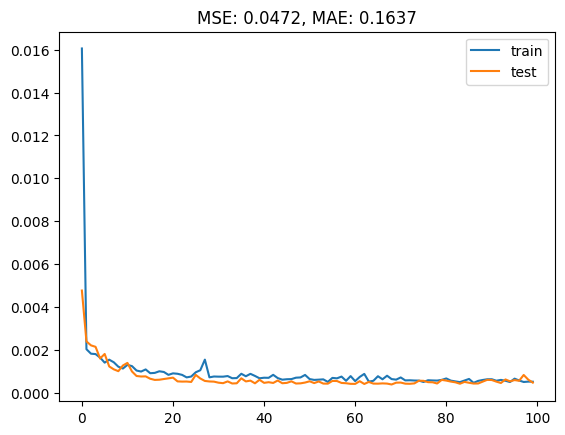

In [ ]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout
import matplotlib.pyplot as plt

# Step 2: Load the data
df = pd.read_csv('/content/Litecoin.csv')
price_data = df['Price'].values.reshape(-1, 1)

# Step 3: Min-Max normalization
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_price_data = scaler.fit_transform(price_data)

# Step 4: Create input-output pairs
# def process_data(data, n_steps):
#     Dx, Dy = [], []
#     n = len(data)
#     for i in range(n):
#         end_ix = i + n_steps
#         if end_ix > n-1:
#             break
#         Dx.append(data[i:end_ix, :])
#         Dy.append(data[end_ix, 0])
#     return np.array(Dx), np.array(Dy)

# Step 4: Create input-output pairs
def process_data(data, n_steps):
    Dx, Dy = [], []
    n = len(data)
    for i in range(n - n_steps):
        Dx.append(data[i:i + n_steps])
        Dy.append(data[i + n_steps])
    return np.array(Dx), np.array(Dy)


n_steps = 30
Dx, Dy = process_data(normalized_price_data, n_steps)
X_train, X_test, y_train, y_test = train_test_split(Dx, Dy, test_size=0.2, random_state=42)

# Step 5: Define the model
model = Sequential()
model.add(GRU(30, return_sequences=True, input_shape=(n_steps, 1)))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

# Step 6: Train the model
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Calculate and plot MSE and MAE
mse = np.mean(np.square(y_test - y_pred))
mae = np.mean(np.abs(y_test - y_pred))

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('MSE: {:.4f}, MAE: {:.4f}'.format(mse, mae))
plt.legend()
plt.show()


Epoch 1/100
32/32 [==============================] - 6s 68ms/step - loss: 0.0159 - val_loss: 0.0047
Epoch 2/100
32/32 [==============================] - 2s 49ms/step - loss: 0.0027 - val_loss: 0.0034
Epoch 3/100
32/32 [==============================] - 2s 64ms/step - loss: 0.0024 - val_loss: 0.0033
Epoch 4/100
32/32 [==============================] - 1s 40ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 5/100
32/32 [==============================] - 1s 38ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 6/100
32/32 [==============================] - 1s 38ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 7/100
32/32 [==============================] - 1s 39ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 8/100
32/32 [==============================] - 1s 38ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 9/100
32/32 [==============================] - 1s 39ms/step - loss: 0.0012 - val_loss: 9.4018e-04
Epoch 10/100
32/32 [==============================] - 1s 39ms/step - loss: 0.0011 - val_loss: 0.

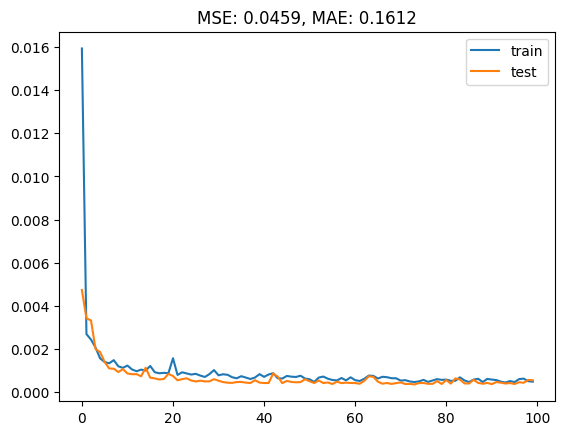

In [ ]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout
import matplotlib.pyplot as plt

# Step 2: Load the data
df = pd.read_csv('/content/Litecoin.csv')
price_data = df['Price'].values.reshape(-1, 1)

# Step 3: Min-Max normalization
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_price_data = scaler.fit_transform(price_data)

# Step 4: Create input-output pairs
def process_data(data, n_steps):
    Dx, Dy = [], []
    n = len(data)
    for i in range(n):
        end_ix = i + n_steps
        if end_ix > n-1:
            break
        Dx.append(data[i:end_ix, :])
        Dy.append(data[end_ix, 0])
    return np.array(Dx), np.array(Dy)


n_steps = 30
Dx, Dy = process_data(normalized_price_data, n_steps)
X_train, X_test, y_train, y_test = train_test_split(Dx, Dy, test_size=0.2, random_state=42)

# Step 5: Define the model
model = Sequential()
model.add(GRU(30, return_sequences=True, input_shape=(n_steps, 1)))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

# Step 6: Train the model
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Calculate and plot MSE and MAE
mse = np.mean(np.square(y_test - y_pred))
mae = np.mean(np.abs(y_test - y_pred))

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('MSE: {:.4f}, MAE: {:.4f}'.format(mse, mae))
plt.legend()
plt.show()


In [ ]:
# Step 9: Predict the price for the next day
last_30_days = normalized_price_data[:30]
X_pred = np.array(last_30_days).reshape(1, n_steps, 1)
y_pred = model.predict(X_pred)
y_pred_actual = scaler.inverse_transform(y_pred)
print("Actual Price on February 23, 2020: ", df.iloc[0]['Price'])
print("Predicted Price on February 23, 2020: ", y_pred_actual[0][0])

1/1 [==============================] - 0s 36ms/step
Actual Price on February 23, 2020:  79.706
Predicted Price on February 23, 2020:  57.558266


In [ ]:
# Step 9: Predict the price for the next day
last_30_days = normalized_price_data[:30]
X_pred = np.array(last_30_days).reshape(1, n_steps, 1)
y_pred = model.predict(X_pred)
y_pred_actual = scaler.inverse_transform(y_pred)
print("Actual Price on February 23, 2020: ", df.iloc[0]['Price'])
print("Predicted Price on February 23, 2020: ", y_pred_actual[0][0])

1/1 [==============================] - 0s 27ms/step
Actual Price on February 23, 2020:  79.706
Predicted Price on February 23, 2020:  55.888966


Epoch 1/100
32/32 [==============================] - 4s 36ms/step - loss: 0.0350 - val_loss: 0.0268
Epoch 2/100
32/32 [==============================] - 1s 22ms/step - loss: 0.0292 - val_loss: 0.0259
Epoch 3/100
32/32 [==============================] - 1s 21ms/step - loss: 0.0289 - val_loss: 0.0258
Epoch 4/100
32/32 [==============================] - 1s 22ms/step - loss: 0.0287 - val_loss: 0.0257
Epoch 5/100
32/32 [==============================] - 1s 21ms/step - loss: 0.0288 - val_loss: 0.0255
Epoch 6/100
32/32 [==============================] - 1s 21ms/step - loss: 0.0285 - val_loss: 0.0254
Epoch 7/100
32/32 [==============================] - 1s 21ms/step - loss: 0.0285 - val_loss: 0.0260
Epoch 8/100
32/32 [==============================] - 1s 21ms/step - loss: 0.0286 - val_loss: 0.0253
Epoch 9/100
32/32 [==============================] - 1s 21ms/step - loss: 0.0284 - val_loss: 0.0253
Epoch 10/100
32/32 [==============================] - 1s 21ms/step - loss: 0.0285 - val_loss: 0.0253

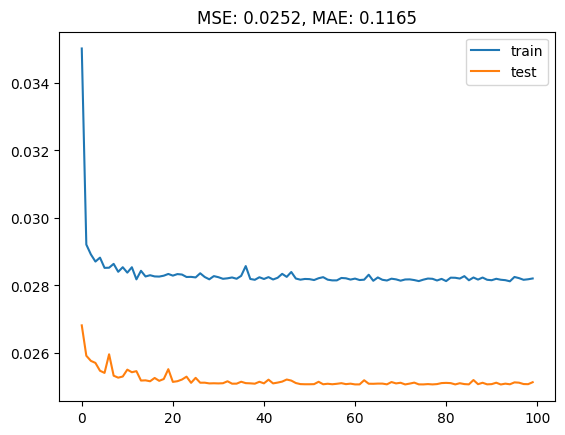

In [ ]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout
import matplotlib.pyplot as plt

# Step 2: Load the data
df = pd.read_csv('/content/Litecoin.csv')
price_data = df['Price'].values.reshape(-1, 1)

# Step 3: Min-Max normalization
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_price_data = scaler.fit_transform(price_data)

# Step 4: Create input-output pairs
def process_data(data, n_steps):
    Dx, Dy = [], []
    n = len(data)
    for i in range(n):
        end_ix = i + n_steps
        if end_ix > n-1:
            break
        Dx.append(data[i:end_ix, :])
        Dy.append(data[end_ix, 0])
    return np.array(Dx), np.array(Dy)


n_steps = 30
Dx, Dy = process_data(normalized_price_data, n_steps)
X_train, X_test, y_train, y_test = train_test_split(Dx, Dy, test_size=0.2, random_state=42)

# Step 5: Define the model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(n_steps, 1)))
model.add(Dense(1))

# Step 6: Train the model
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Calculate and plot MSE and MAE
mse = np.mean(np.square(y_test - y_pred))
mae = np.mean(np.abs(y_test - y_pred))

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('MSE: {:.4f}, MAE: {:.4f}'.format(mse, mae))
plt.legend()
plt.show()


In [ ]:
# Step 9: Predict the price for the next day
last_30_days = normalized_price_data[:30]
X_pred = np.array(last_30_days).reshape(1, n_steps, 1)
y_pred = model.predict(X_pred)
y_pred_actual = scaler.inverse_transform(y_pred)
print("Actual Price on February 23, 2020: ", df.iloc[0]['Price'])
print("Predicted Price on February 23, 2020: ", y_pred_actual[0][0])

1/1 [==============================] - 0s 24ms/step


ValueError: ignored

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Read the Litecoin data from CSV file
df = pd.read_csv('/content/Litecoin.csv')

# Select only the 'Price' column
data = df['Price'].values.reshape(-1, 1)

# Scale the data using Min-Max Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the data for input to the model
def process_data(data, n_steps):
    Dx, Dy = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix >= len(data):
            break
        Dx.append(data[i:end_ix, 0])
        Dy.append(data[end_ix, 0])
    return np.array(Dx), np.array(Dy)

# Prepare the data with a window size of 30
n_steps = 30
Dx, Dy = process_data(scaled_data, n_steps)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, GRU, Concatenate

# Define the input shape
input_shape = (n_steps, 1)

# Define the GRU network
gru_input = Input(shape=input_shape)
gru_layer = GRU(30)(gru_input)
gru_dropout = Dropout(0.2)(gru_layer)
gru_output = Dense(64, activation='relu')(gru_dropout)

# Define the LSTM network
lstm_input = Input(shape=input_shape)
lstm_layer1 = LSTM(30, return_sequences=True)(lstm_input)
lstm_dropout1 = Dropout(0.2)(lstm_layer1)
lstm_layer2 = LSTM(50)(lstm_dropout1)
lstm_dropout2 = Dropout(0.2)(lstm_layer2)
lstm_output = Dense(64, activation='relu')(lstm_dropout2)

# Concatenate the output of both networks
concat_output = Concatenate()([gru_output, lstm_output])
final_output = Dense(1, activation='linear')(concat_output)

# Define the model
model = Model(inputs=[gru_input, lstm_input], outputs=final_output)

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


Epoch 1/100
32/32 [==============================] - 11s 87ms/step - loss: 0.0126 - mae: 0.0754 - val_loss: 0.0023 - val_mae: 0.0484
Epoch 2/100
32/32 [==============================] - 3s 79ms/step - loss: 0.0031 - mae: 0.0326 - val_loss: 6.7084e-04 - val_mae: 0.0258
Epoch 3/100
32/32 [==============================] - 2s 57ms/step - loss: 0.0020 - mae: 0.0266 - val_loss: 4.7580e-04 - val_mae: 0.0217
Epoch 4/100
32/32 [==============================] - 1s 46ms/step - loss: 0.0016 - mae: 0.0224 - val_loss: 9.7159e-04 - val_mae: 0.0311
Epoch 5/100
32/32 [==============================] - 1s 46ms/step - loss: 0.0017 - mae: 0.0242 - val_loss: 0.0011 - val_mae: 0.0334
Epoch 6/100
32/32 [==============================] - 2s 47ms/step - loss: 0.0015 - mae: 0.0229 - val_loss: 5.5165e-04 - val_mae: 0.0234
Epoch 7/100
32/32 [==============================] - 1s 47ms/step - loss: 0.0013 - mae: 0.0211 - val_loss: 2.1267e-04 - val_mae: 0.0144
Epoch 8/100
32/32 [==============================] - 2s

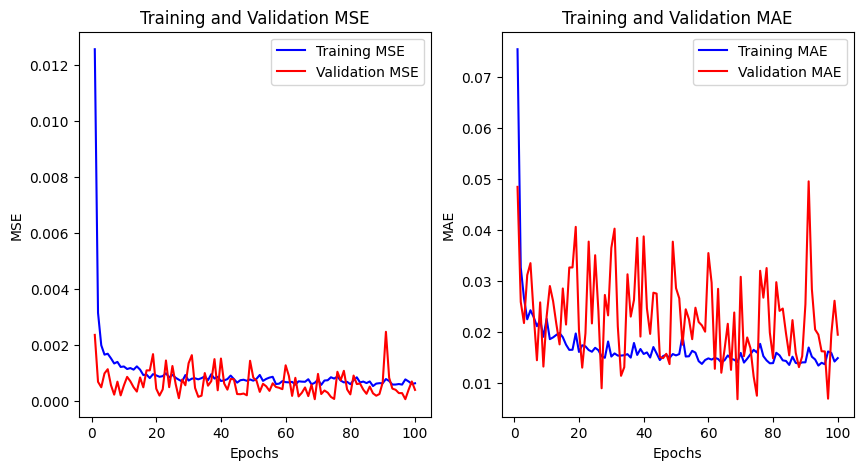

In [ ]:
# Train the model for 100 epochs
history = model.fit([Dx, Dx], Dy, epochs=100, batch_size=32, validation_split=0.2)

# Plot the mean squared error and mean absolute error
import matplotlib.pyplot as plt

mse = history.history['loss']
val_mse = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(mse) + 1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, mse, 'b', label='Training MSE')
plt.plot(epochs, val_mse, 'r', label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs
, mae, 'b', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()


### Monero

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D , Dropout , Flatten , BatchNormalization,LSTM
from tensorflow.keras.optimizers import SGD,Adam
from sklearn.metrics import confusion_matrix
import pandas as pd 
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard,EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Load the data from the csv file
df = pd.read_csv('/content/Monero.csv')

# Print the first two rows
print('A:')
print(df.head(5))

A:
           Date   Price    Open    High     Low     Vol. Change %
0  Feb 23, 2020  85.329  79.024  85.541  78.818  271.00K    7.97%
1  Feb 22, 2020  79.027  80.308  82.896  78.169  277.07K   -1.60%
2  Feb 21, 2020  80.313  76.355  82.285  75.886  290.15K    5.18%
3  Feb 20, 2020  76.355  77.843  78.903  75.102  384.42K   -1.91%
4  Feb 19, 2020  77.843  86.158  86.914  76.718  304.86K   -9.65%


In [ ]:
df=df[['Price']]
df.shape
df.head()

Price
0  85.329
1  79.027
2  80.313
3  76.355
4  77.843

In [ ]:
# Scale the data using MinMaxScaler with range (0,1)
scaler = MinMaxScaler(feature_range=(0,1))
df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

def fun(data, lag):
    """
    A function that takes in data and a lag value and returns two arrays: x and y.
    x is an array of shape (k, lag, n), where k is the number of samples and n is the number of features.
    y is an array of shape (k, 1), where k is the number of samples.
    Each sample in x is a sequence of lag consecutive observations from data, and the corresponding value in y is the next observation.
    """
    k = len(data) - lag
    x = []
    y = []
    for i in range(k):
        x.append(data[i:i+lag])
        y.append(data[i+lag,:1])
    x = np.array(x)
    y = np.array(y)
    return x, y

# Reverse the order of the data array
data = np.array(df.iloc[::-1])

# Set the number of data points to predict
prediction_window = 1

# Set the number of previous data points to use for prediction
lag = 30

# Split the data into train and test sets
test_start_index = len(data) - prediction_window - lag
test = data[test_start_index:]
train = data[:test_start_index]

# Use the function fun to create x_train, y_train, x_test, and y_test arrays
x_train, y_train = fun(train, lag)
x_test, y_test = fun(test, lag)


In [ ]:
from tensorflow.keras.layers import GRU, LSTM, Dropout, Dense, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Define the loss function
loss_fn = 'mse'

# Define the model
inputs = Input(shape=(30,1))
gru = GRU(30, activation='relu', return_sequences=False)(inputs)
gru = Dropout(0.25)(gru)
gru = Dense(1, activation='relu')(gru)
lstm = LSTM(30, activation='relu', return_sequences=True)(inputs)
lstm = Dropout(0.25)(lstm)
lstm = LSTM(50, activation='relu')(lstm)
lstm = Dense(1, activation='relu')(lstm)
combined = concatenate([gru, lstm])
outputs = Dense(1)(combined)
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with Adam optimizer and defined loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss=loss_fn, metrics=['mae','mse'])

# Fit the model with train data and validate with test data for 100 epochs
callback=EarlyStopping(min_delta=1e-5,patience=10)
history = model.fit(x_train, y_train, epochs=100, callbacks=[callback], validation_data=(x_test, y_test))

Epoch 1/100
56/56 [==============================] - 13s 135ms/step - loss: 0.0101 - mae: 0.0592 - mse: 0.0101 - val_loss: 9.8956e-05 - val_mae: 0.0099 - val_mse: 9.8956e-05
Epoch 2/100
56/56 [==============================] - 8s 136ms/step - loss: 0.0023 - mae: 0.0275 - mse: 0.0023 - val_loss: 3.1529e-04 - val_mae: 0.0178 - val_mse: 3.1529e-04
Epoch 3/100
56/56 [==============================] - 7s 131ms/step - loss: 0.0019 - mae: 0.0257 - mse: 0.0019 - val_loss: 1.4599e-04 - val_mae: 0.0121 - val_mse: 1.4599e-04
Epoch 4/100
56/56 [==============================] - 9s 160ms/step - loss: 0.0014 - mae: 0.0197 - mse: 0.0014 - val_loss: 1.1366e-05 - val_mae: 0.0034 - val_mse: 1.1366e-05
Epoch 5/100
56/56 [==============================] - 9s 159ms/step - loss: 0.0014 - mae: 0.0207 - mse: 0.0014 - val_loss: 5.8761e-06 - val_mae: 0.0024 - val_mse: 5.8761e-06
Epoch 6/100
56/56 [==============================] - 9s 157ms/step - loss: 0.0015 - mae: 0.0204 - mse: 0.0015 - val_loss: 1.5043e-06 -

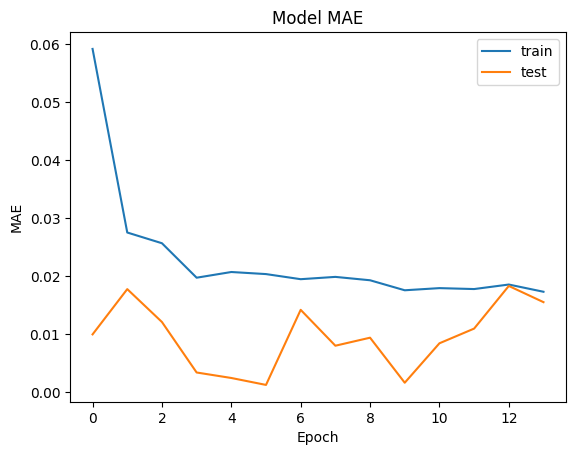

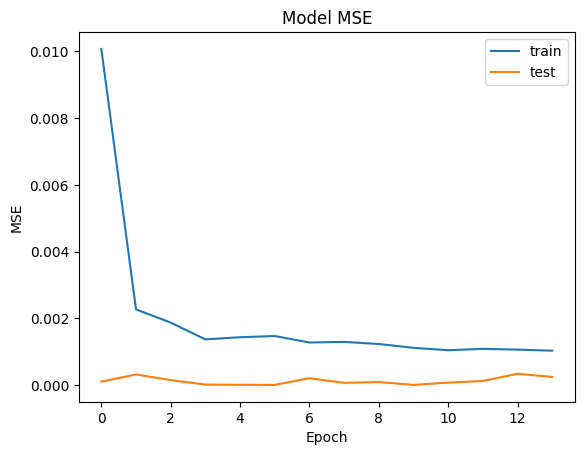

In [ ]:
# Plot the MAE and MSE graphs
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmaeM.pdf')
plt.show()

plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmseM.pdf')
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define and fit the scaler object on the training data
# scaler = MinMaxScaler()
# scaler.fit(x_train)

# Predict on the test data and unscale the predicted and test data
y_pred_scaled = model.predict(x_test)
y_pred_unscaled = scaler.inverse_transform(y_pred_scaled[::-1])
y_test_unscaled = scaler.inverse_transform(y_test)

# Print the evaluation metrics for the unscaled predictions
MAE_unscaled = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
RMSE_unscaled = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
R2_unscaled = r2_score(y_test_unscaled, y_pred_unscaled)
MAPE_unscaled = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100
MSE_unscaled = mean_squared_error(y_test_unscaled, y_pred_unscaled)

print('Unscaled Metrics')
print('MSE : ', MSE_unscaled)
print('RMSE : ', RMSE_unscaled)
print('MAE : ', MAE_unscaled)
print('MAPE : ', MAPE_unscaled)
print('R2 : ', R2_unscaled)

# Print the evaluation metrics for the scaled predictions
y_pred_scaled = y_pred_scaled.flatten()[::-1]
y_test_scaled = y_test.flatten()
MAE_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
RMSE_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
R2_scaled = r2_score(y_test_scaled, y_pred_scaled)
MAPE_scaled = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)) * 100
MSE_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)

print('Scaled Metrics')
print('MSE : ', MSE_scaled)
print('RMSE : ', RMSE_scaled)
print('MAE : ', MAE_scaled)
print('MAPE : ', MAPE_scaled)
print('R2 : ', R2_scaled)

print('y_test_unscaled:')
print(y_test_unscaled)

print('y_pred_unscaled:')
print(y_pred_unscaled)


1/1 [==============================] - 0s 412ms/step
Unscaled Metrics
MSE :  54.24933959674647
RMSE :  7.36541510009765
MAE :  7.36541510009765
MAPE :  8.631784153215964
R2 :  nan
Scaled Metrics
MSE :  0.00024054076189978106
RMSE :  0.015509376579984802
MAE :  0.015509376579984802
MAPE :  8.641814439999255
R2 :  nan
y_test_unscaled:
[[85.329]]
y_pred_unscaled:
[[77.963585]]


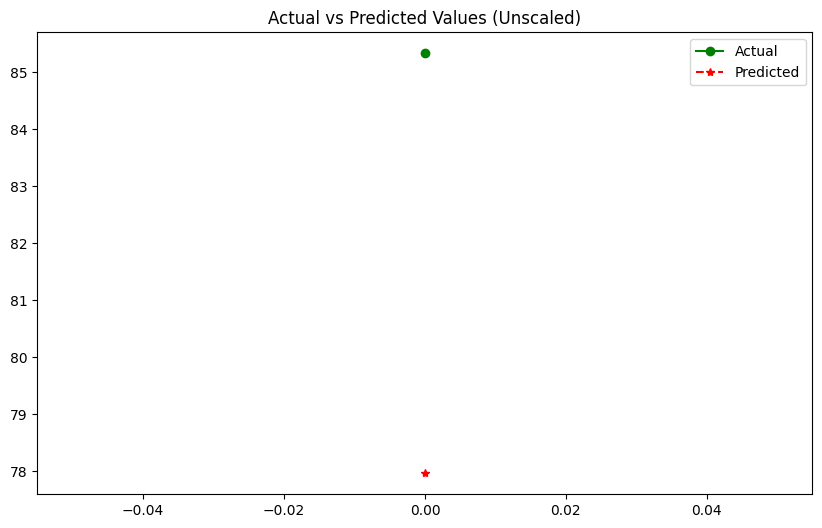

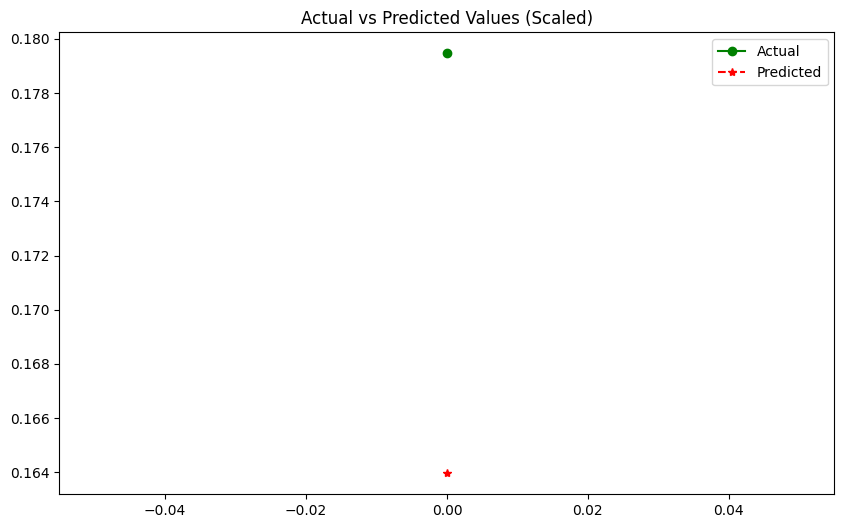

In [ ]:
# Plot the actual vs predicted values for the unscaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, 'go-', label='Actual')
plt.plot(y_pred_unscaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Unscaled)')
plt.legend()
plt.savefig('ActualPredictedValuesUnscaledM.pdf')
plt.show()

# Plot the actual vs predicted values for the scaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, 'go-', label='Actual')
plt.plot(y_pred_scaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Scaled)')
plt.legend()
plt.savefig('ActualPredictedValuesScaledM.pdf')
plt.show()


### Litecoin

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D , Dropout , Flatten , BatchNormalization,LSTM
from tensorflow.keras.optimizers import SGD,Adam
from sklearn.metrics import confusion_matrix
import pandas as pd 
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard,EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Load the data from the csv file
df = pd.read_csv('/content/Litecoin.csv')

# Print the first two rows
print('A:')
print(df.head(5))

def convert_vol(vol):
    if vol.endswith('M'):
        return int(float(vol[:-1]) * 1000000)
    elif vol.endswith('K'):
        return int(float(vol[:-1]) * 1000)
    else:
        return int(vol)

df['Vol.'] = df['Vol.'].apply(convert_vol)
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)
print('B:')
print(df.head(5))

A:
           Date   Price    Open    High     Low    Vol. Change %
0  Feb 23, 2020  79.706  74.817  79.920  74.722  11.93M    6.53%
1  Feb 22, 2020  74.818  73.288  76.642  72.422  11.56M    2.08%
2  Feb 21, 2020  73.291  69.455  75.161  68.633  12.13M    5.52%
3  Feb 20, 2020  69.455  70.782  72.339  66.495  12.45M   -1.87%
4  Feb 19, 2020  70.782  77.173  79.041  68.264  12.10M   -8.28%
B:
           Date   Price    Open    High     Low      Vol.  Change %
0  Feb 23, 2020  79.706  74.817  79.920  74.722  11930000      6.53
1  Feb 22, 2020  74.818  73.288  76.642  72.422  11560000      2.08
2  Feb 21, 2020  73.291  69.455  75.161  68.633  12130000      5.52
3  Feb 20, 2020  69.455  70.782  72.339  66.495  12450000     -1.87
4  Feb 19, 2020  70.782  77.173  79.041  68.264  12100000     -8.28


In [ ]:
df=df[['Price']]
df.shape
df.head()

Price
0  79.706
1  74.818
2  73.291
3  69.455
4  70.782

In [ ]:
# Scale the data using MinMaxScaler with range (0,1)
scaler = MinMaxScaler(feature_range=(0,1))
df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

def fun(data, lag):
    """
    A function that takes in data and a lag value and returns two arrays: x and y.
    x is an array of shape (k, lag, n), where k is the number of samples and n is the number of features.
    y is an array of shape (k, 1), where k is the number of samples.
    Each sample in x is a sequence of lag consecutive observations from data, and the corresponding value in y is the next observation.
    """
    k = len(data) - lag
    x = []
    y = []
    for i in range(k):
        x.append(data[i:i+lag])
        y.append(data[i+lag,:1])
    x = np.array(x)
    y = np.array(y)
    return x, y

# Reverse the order of the data array
data = np.array(df.iloc[::-1])

# Set the number of data points to predict
prediction_window = 1

# Set the number of previous data points to use for prediction
lag = 30

# Split the data into train and test sets
test_start_index = len(data) - prediction_window - lag
test = data[test_start_index:]
train = data[:test_start_index]

# Use the function fun to create x_train, y_train, x_test, and y_test arrays
x_train, y_train = fun(train, lag)
x_test, y_test = fun(test, lag)


In [ ]:
from tensorflow.keras.layers import GRU, LSTM, Dropout, Dense, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Define the loss function
loss_fn = 'mse'

# Define the model
inputs = Input(shape=(30,1))
gru = GRU(30, activation='relu', return_sequences=False)(inputs)
gru = Dropout(0.25)(gru)
gru = Dense(1, activation='relu')(gru)
lstm = LSTM(30, activation='relu', return_sequences=True)(inputs)
lstm = Dropout(0.25)(lstm)
lstm = LSTM(50, activation='relu')(lstm)
lstm = Dense(1, activation='relu')(lstm)
combined = concatenate([gru, lstm])
outputs = Dense(1)(combined)
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with Adam optimizer and defined loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss=loss_fn, metrics=['mae','mse'])

# Fit the model with train data and validate with test data for 100 epochs
callback=EarlyStopping(min_delta=1e-5,patience=10)
history = model.fit(x_train, y_train, epochs=100, callbacks=[callback], validation_data=(x_test, y_test))

Epoch 1/100
39/39 [==============================] - 16s 168ms/step - loss: 0.0596 - mae: 0.1759 - mse: 0.0596 - val_loss: 0.0316 - val_mae: 0.1778 - val_mse: 0.0316
Epoch 2/100
39/39 [==============================] - 5s 131ms/step - loss: 0.0450 - mae: 0.1487 - mse: 0.0450 - val_loss: 0.0212 - val_mae: 0.1455 - val_mse: 0.0212
Epoch 3/100
39/39 [==============================] - 5s 138ms/step - loss: 0.0376 - mae: 0.1309 - mse: 0.0376 - val_loss: 0.0137 - val_mae: 0.1168 - val_mse: 0.0137
Epoch 4/100
39/39 [==============================] - 6s 154ms/step - loss: 0.0331 - mae: 0.1203 - mse: 0.0331 - val_loss: 0.0089 - val_mae: 0.0941 - val_mse: 0.0089
Epoch 5/100
39/39 [==============================] - 8s 214ms/step - loss: 0.0304 - mae: 0.1143 - mse: 0.0304 - val_loss: 0.0056 - val_mae: 0.0751 - val_mse: 0.0056
Epoch 6/100
39/39 [==============================] - 7s 174ms/step - loss: 0.0289 - mae: 0.1126 - mse: 0.0289 - val_loss: 0.0036 - val_mae: 0.0602 - val_mse: 0.0036
Epoch 7/1

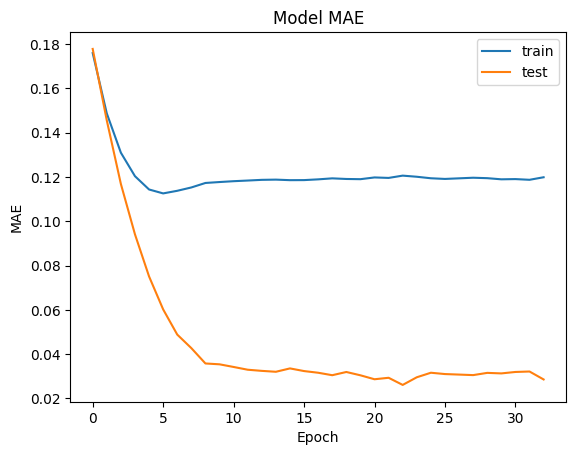

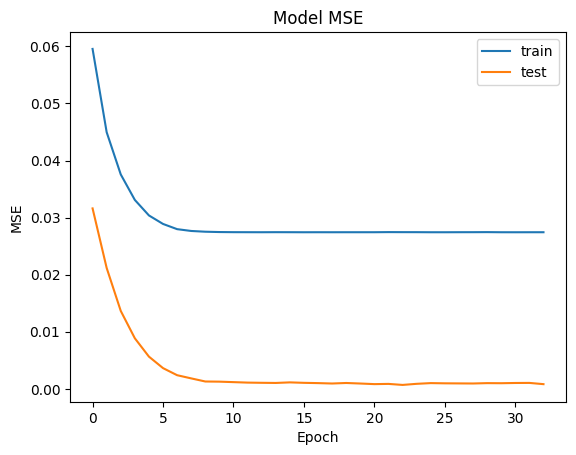

In [ ]:
# Plot the MAE and MSE graphs
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmae.pdf')
plt.show()

plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmse.pdf')
plt.show()


In [ ]:
# Scale the data using MinMaxScaler with range (0,1)
scaler = MinMaxScaler(feature_range=(0,1))
df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

# Define input window length and prediction window length
input_window_length = 30
prediction_window_length = 1

# Reverse the order of the data array
data = np.array(df.iloc[::-1])

# Split the data into train and test sets
test_start_index = len(data) - prediction_window_length - input_window_length
test = data[test_start_index:]
train = data[:test_start_index]

# Process the data using the given algorithm
def predict_price(Dx, Dy, P_Window):
    R = trained_model
    P_Values = []
    l = np.append(Dx[-1], Dy[-1])
    Dx = np.delete(Dx, 0, axis=0)
    for i in range(P_Window):
        P_l = R.predict(np.array([l[:input_window_length]]))[0][0]
        P_Values.append(P_l)
        l = np.append(l[input_window_length:], P_l)
    return P_Values

x_train, y_train = process_data(train, input_window_length)
x_test, y_test = process_data(test, input_window_length)

# Define the loss function
loss_fn = 'mse'

# Define the model
inputs = Input(shape=(input_window_length,1))
gru = GRU(30, activation='relu', return_sequences=False)(inputs)
gru = Dropout(0.25)(gru)
gru = Dense(1, activation='relu')(gru)
lstm = LSTM(30, activation='relu', return_sequences=True)(inputs)
lstm = Dropout(0.25)(lstm)
lstm = LSTM(50, activation='relu')(lstm)
lstm = Dense(1, activation='relu')(lstm)
combined = concatenate([gru, lstm])
outputs = Dense(1)(combined)
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with Adam optimizer and defined loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss=loss_fn, metrics=['mae','mse'])

# Fit the model with train data and validate with test data for 100 epochs
callback=EarlyStopping(min_delta=1e-5,patience=10)
history = model.fit(x_train, y_train, epochs=100, callbacks=[callback], validation_data=(x_test, y_test))

# Use the trained model to predict prices
predicted_prices = []
for i in range(len(x_test)):
    Dx = x_test[i]
    Dy = y_test[i]
    P_Values = predict_price(Dx, Dy, prediction_window_length)
    predicted_prices.append(P_Values)

# Convert the predicted prices and test prices to unscaled values
predicted_prices_unscaled = []
y_test_unscaled = []
for i in range(len(predicted_prices)):
    predicted_prices_unscaled.append(scaler.inverse_transform(np.array(predicted_prices[i]).reshape(-1, 1)))
    y_test_unscaled.append(scaler.inverse_transform(np.array(y_test[i]).reshape(-1, 1)))

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
for i in range(len(predicted_prices_unscaled)):
    plt.scatter(range(len(predicted_prices_unscaled[i])), predicted_prices_unscaled[i], color='red')
    plt.plot(range(len(y_test_unscaled[i])), y_test_unscaled[i], color='green', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.savefig('ActualPredictedValuesScaled.pdf')
plt.show()


Epoch 1/100
56/56 [==============================] - 15s 163ms/step - loss: 0.0422 - mae: 0.1266 - mse: 0.0422 - val_loss: 0.0167 - val_mae: 0.1292 - val_mse: 0.0167
Epoch 2/100
56/56 [==============================] - 7s 132ms/step - loss: 0.0343 - mae: 0.1198 - mse: 0.0343 - val_loss: 0.0083 - val_mae: 0.0912 - val_mse: 0.0083
Epoch 3/100
56/56 [==============================] - 7s 130ms/step - loss: 0.0311 - mae: 0.1182 - mse: 0.0311 - val_loss: 0.0045 - val_mae: 0.0674 - val_mse: 0.0045
Epoch 4/100
56/56 [==============================] - 7s 127ms/step - loss: 0.0301 - mae: 0.1207 - mse: 0.0301 - val_loss: 0.0028 - val_mae: 0.0533 - val_mse: 0.0028
Epoch 5/100
56/56 [==============================] - 7s 130ms/step - loss: 0.0299 - mae: 0.1231 - mse: 0.0299 - val_loss: 0.0024 - val_mae: 0.0485 - val_mse: 0.0024
Epoch 6/100
56/56 [==============================] - 7s 126ms/step - loss: 0.0299 - mae: 0.1245 - mse: 0.0299 - val_loss: 0.0021 - val_mae: 0.0462 - val_mse: 0.0021
Epoch 7/1

NameError: ignored

In [ ]:
# Process the data using the given algorithm
def predict_price(Dx, Dy, P_Window):
    R = model
    P_Values = []
    l = np.append(Dx[-1], Dy[-1])
    Dx = np.delete(Dx, 0, axis=0)
    for i in range(P_Window):
        P_l = R.predict(np.array([l[:input_window_length]]))[0][0]
        P_Values.append(P_l)
        l = np.append(l[input_window_length:], P_l)
    return P_Values

# Use the trained model to predict prices
predicted_prices = []
for i in range(len(x_test)):
    Dx = x_test[i]
    Dy = y_test[i]
    P_Values = predict_price(Dx, Dy, prediction_window_length)
    predicted_prices.append(P_Values)

# Convert the predicted prices and test prices to unscaled values
predicted_prices_unscaled = []
y_test_unscaled = []
for i in range(len(predicted_prices)):
    predicted_prices_unscaled.append(scaler.inverse_transform(np.array(predicted_prices[i]).reshape(-1, 1)))
    y_test_unscaled.append(scaler.inverse_transform(np.array(y_test[i]).reshape(-1, 1)))

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
for i in range(len(predicted_prices_unscaled)):
    plt.scatter(range(len(predicted_prices_unscaled[i])), predicted_prices_unscaled[i], color='red')
    plt.plot(range(len(y_test_unscaled[i])), y_test_unscaled[i], color='green', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.savefig('ActualPredictedValuesScaled.pdf')
plt.show()

IndexError: ignored

In [ ]:
def predict_price(Dx, Dy, P_Window, model):
    """
    A function that takes in Dx (features), Dy (target), P_Window (prediction window length) and trained model
    and returns an array P_Values of predicted prices.
    """
    # Create a DataFrame R with the given features and target
    R = pd.concat([Dx, Dy], axis=1)

    # Initialize an empty array P_Values
    P_Values = []

    # Get the last value of Dx and append it to l
    l = Dx.iloc[-1]

    # Delete the first value of Dx
    Dx = Dx.iloc[1:]

    # Append the last value of Dy to l
    l = l.append(Dy.iloc[-1])

    # Predict the next P_Window values
    for i in range(P_Window):
        # Append the predicted value to P_Values
        P_Values.append(model.predict(l.values.reshape(1,-1))[0,0])

        # Delete the first value of l
        l = l.iloc[1:]

        # Append the predicted value to l
        l = l.append(pd.DataFrame(P_Values[-1], index=[Dy.columns[-1]], columns=[l.columns[-1]]))

    # Return the predicted values
    return np.array(P_Values)

# Pass the features, target, prediction window, and trained model to the function
P_Values = predict_price(Dx, Dy, P_Window, model)


NameError: ignored

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define and fit the scaler object on the training data
# scaler = MinMaxScaler()
# scaler.fit(x_train)

# Predict on the test data and unscale the predicted and test data
y_pred_scaled = model.predict(x_test)
y_pred_unscaled = scaler.inverse_transform(y_pred_scaled[::-1])
y_test_unscaled = scaler.inverse_transform(y_test)

# Print the evaluation metrics for the unscaled predictions
MAE_unscaled = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
RMSE_unscaled = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
R2_unscaled = r2_score(y_test_unscaled, y_pred_unscaled)
MAPE_unscaled = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100
MSE_unscaled = mean_squared_error(y_test_unscaled, y_pred_unscaled)

print('Unscaled Metrics')
print('MSE : ', MSE_unscaled)
print('RMSE : ', RMSE_unscaled)
print('MAE : ', MAE_unscaled)
print('MAPE : ', MAPE_unscaled)
print('R2 : ', R2_unscaled)

# Print the evaluation metrics for the scaled predictions
y_pred_scaled = y_pred_scaled.flatten()[::-1]
y_test_scaled = y_test.flatten()
MAE_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
RMSE_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
R2_scaled = r2_score(y_test_scaled, y_pred_scaled)
MAPE_scaled = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)) * 100
MSE_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)

print('Scaled Metrics')
print('MSE : ', MSE_scaled)
print('RMSE : ', RMSE_scaled)
print('MAE : ', MAE_scaled)
print('MAPE : ', MAPE_scaled)
print('R2 : ', R2_scaled)

print('y_test_unscaled:')
print(y_test_unscaled)

print('y_pred_unscaled:')
print(y_pred_unscaled)


1/1 [==============================] - 0s 415ms/step
Unscaled Metrics
MSE :  103.5250717999319
RMSE :  10.17472711181641
MAE :  10.17472711181641
MAPE :  12.765321446084874
R2 :  nan
Scaled Metrics
MSE :  0.0008173156963540158
RMSE :  0.028588733731209848
MAE :  0.028588733731209848
MAPE :  13.351613173421493
R2 :  nan
y_test_unscaled:
[[79.706]]
y_pred_unscaled:
[[69.53127]]


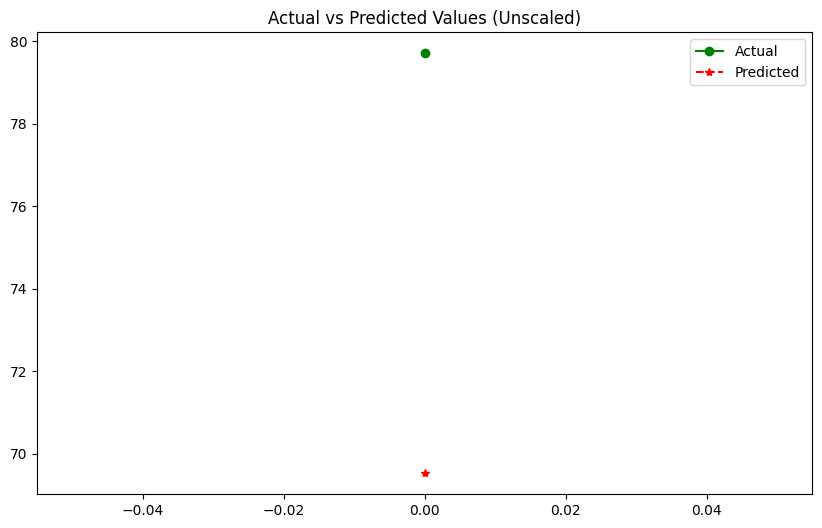

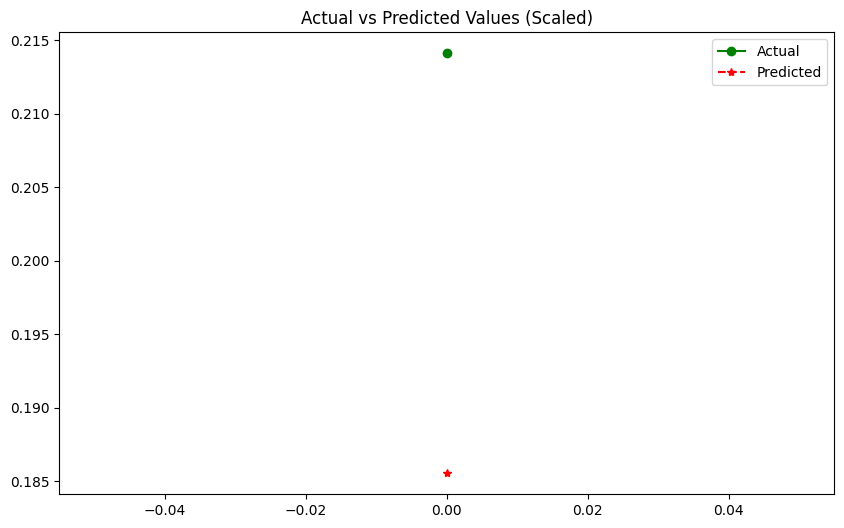

In [ ]:
# Plot the actual vs predicted values for the unscaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, 'go-', label='Actual')
plt.plot(y_pred_unscaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Unscaled)')
plt.legend()
plt.savefig('ActualPredictedValuesUnscaled.pdf')
plt.show()

# Plot the actual vs predicted values for the scaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, 'go-', label='Actual')
plt.plot(y_pred_scaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Scaled)')
plt.legend()
plt.savefig('ActualPredictedValuesScaled.pdf')
plt.show()


### New Section

In [ ]:
from tensorflow.keras.layers import GRU, LSTM, Dropout, Dense, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Define the loss function
loss_fn = 'mse'

# Define the model
inputs = Input(shape=(30,1))
gru = GRU(30, activation='relu', return_sequences=False)(inputs)
gru = Dropout(0.25)(gru)
gru = Dense(1, activation='relu')(gru)
lstm = LSTM(30, activation='relu', return_sequences=True)(inputs)
lstm = Dropout(0.25)(lstm)
lstm = LSTM(50, activation='relu')(lstm)
lstm = Dense(1, activation='relu')(lstm)
combined = concatenate([gru, lstm])
outputs = Dense(1)(combined)
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with Adam optimizer and defined loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss=loss_fn, metrics=['mae','mse'])

# Fit the model with train data and validate with test data for 100 epochs
callback=EarlyStopping(min_delta=1e-5,patience=10)
history = model.fit(x_train, y_train, epochs=100, callbacks=[callback], validation_data=(x_test, y_test))

Epoch 1/100
56/56 [==============================] - 13s 135ms/step - loss: 0.0101 - mae: 0.0592 - mse: 0.0101 - val_loss: 9.8956e-05 - val_mae: 0.0099 - val_mse: 9.8956e-05
Epoch 2/100
56/56 [==============================] - 8s 136ms/step - loss: 0.0023 - mae: 0.0275 - mse: 0.0023 - val_loss: 3.1529e-04 - val_mae: 0.0178 - val_mse: 3.1529e-04
Epoch 3/100
56/56 [==============================] - 7s 131ms/step - loss: 0.0019 - mae: 0.0257 - mse: 0.0019 - val_loss: 1.4599e-04 - val_mae: 0.0121 - val_mse: 1.4599e-04
Epoch 4/100
56/56 [==============================] - 9s 160ms/step - loss: 0.0014 - mae: 0.0197 - mse: 0.0014 - val_loss: 1.1366e-05 - val_mae: 0.0034 - val_mse: 1.1366e-05
Epoch 5/100
56/56 [==============================] - 9s 159ms/step - loss: 0.0014 - mae: 0.0207 - mse: 0.0014 - val_loss: 5.8761e-06 - val_mae: 0.0024 - val_mse: 5.8761e-06
Epoch 6/100
56/56 [==============================] - 9s 157ms/step - loss: 0.0015 - mae: 0.0204 - mse: 0.0015 - val_loss: 1.5043e-06 -

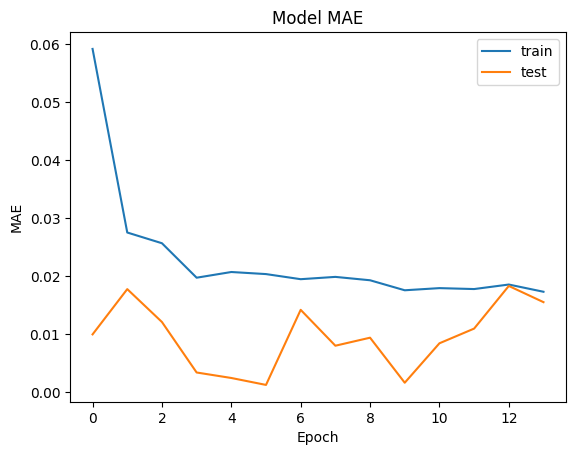

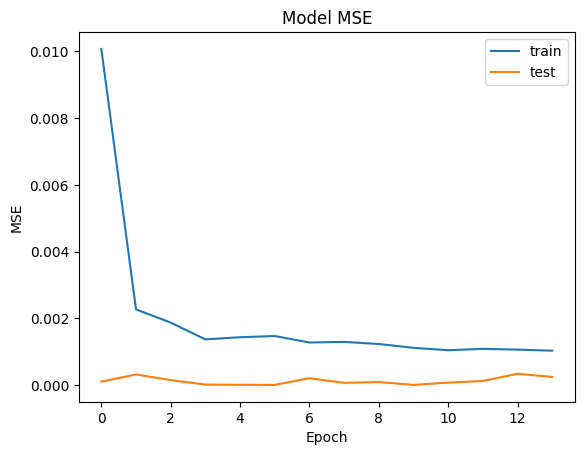

In [ ]:
# Plot the MAE and MSE graphs
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmaeM.pdf')
plt.show()

plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('lossmseM.pdf')
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define and fit the scaler object on the training data
# scaler = MinMaxScaler()
# scaler.fit(x_train)

# Predict on the test data and unscale the predicted and test data
y_pred_scaled = model.predict(x_test)
y_pred_unscaled = scaler.inverse_transform(y_pred_scaled[::-1])
y_test_unscaled = scaler.inverse_transform(y_test)

# Print the evaluation metrics for the unscaled predictions
MAE_unscaled = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
RMSE_unscaled = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
R2_unscaled = r2_score(y_test_unscaled, y_pred_unscaled)
MAPE_unscaled = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100
MSE_unscaled = mean_squared_error(y_test_unscaled, y_pred_unscaled)

print('Unscaled Metrics')
print('MSE : ', MSE_unscaled)
print('RMSE : ', RMSE_unscaled)
print('MAE : ', MAE_unscaled)
print('MAPE : ', MAPE_unscaled)
print('R2 : ', R2_unscaled)

# Print the evaluation metrics for the scaled predictions
y_pred_scaled = y_pred_scaled.flatten()[::-1]
y_test_scaled = y_test.flatten()
MAE_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
RMSE_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
R2_scaled = r2_score(y_test_scaled, y_pred_scaled)
MAPE_scaled = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)) * 100
MSE_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)

print('Scaled Metrics')
print('MSE : ', MSE_scaled)
print('RMSE : ', RMSE_scaled)
print('MAE : ', MAE_scaled)
print('MAPE : ', MAPE_scaled)
print('R2 : ', R2_scaled)

print('y_test_unscaled:')
print(y_test_unscaled)

print('y_pred_unscaled:')
print(y_pred_unscaled)


1/1 [==============================] - 0s 412ms/step
Unscaled Metrics
MSE :  54.24933959674647
RMSE :  7.36541510009765
MAE :  7.36541510009765
MAPE :  8.631784153215964
R2 :  nan
Scaled Metrics
MSE :  0.00024054076189978106
RMSE :  0.015509376579984802
MAE :  0.015509376579984802
MAPE :  8.641814439999255
R2 :  nan
y_test_unscaled:
[[85.329]]
y_pred_unscaled:
[[77.963585]]


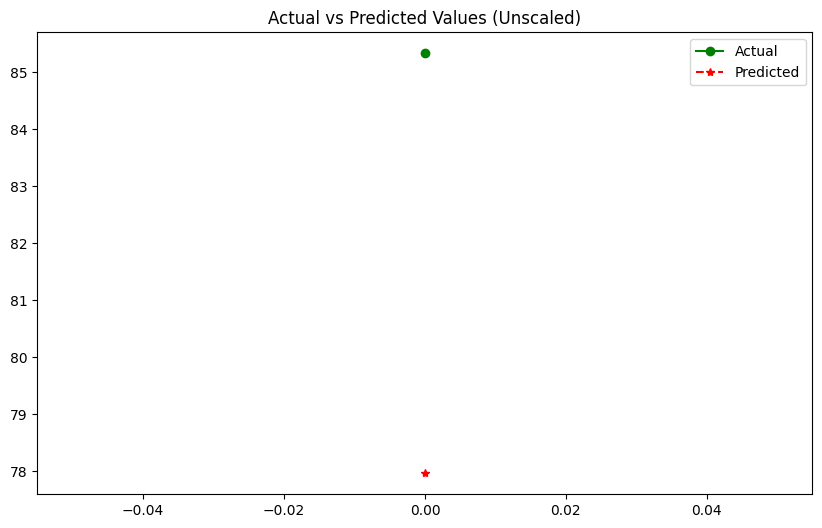

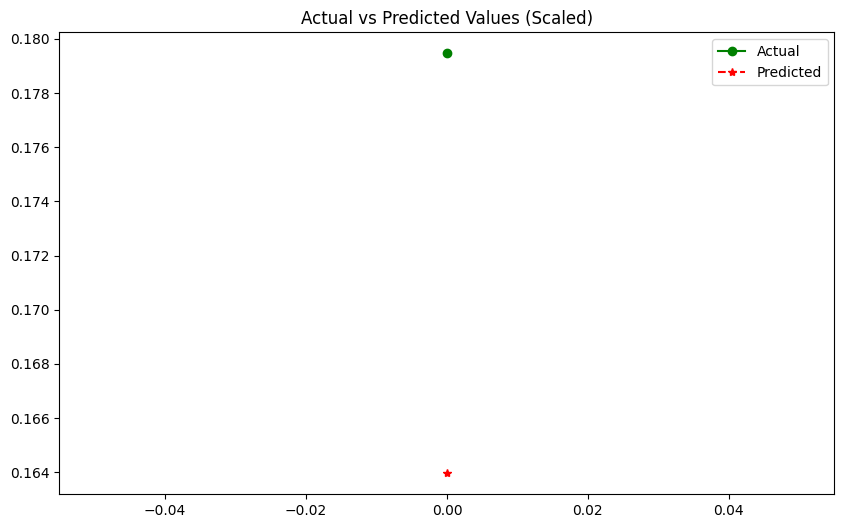

In [ ]:
# Plot the actual vs predicted values for the unscaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, 'go-', label='Actual')
plt.plot(y_pred_unscaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Unscaled)')
plt.legend()
plt.savefig('ActualPredictedValuesUnscaledM.pdf')
plt.show()

# Plot the actual vs predicted values for the scaled data
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, 'go-', label='Actual')
plt.plot(y_pred_scaled, 'r*--', label='Predicted')
plt.title('Actual vs Predicted Values (Scaled)')
plt.legend()
plt.savefig('ActualPredictedValuesScaledM.pdf')
plt.show()
